# Generative AI - Plots

## Libraries

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

## Load Data

In [269]:
# Load the Excel file
path = "Training_GenAI.xlsx"
df = pd.read_excel(path)

In [270]:
# Save cleaned dataset to excel file
df.to_excel('GenAI Experiments/Training_GenAI.xlsx', index=False, sheet_name='Data', engine='openpyxl')

## Análisis General

In [213]:
# Define the list of labels and colors
labels = ['Comentario Positivo', 'Comentario Negativo']
colors = ['darkgreen', 'darkred']

In [214]:
# Filter dataset for "Análisis General"
ageneral_df = df[df["Type"] == "analisis_general"]
len(ageneral_df)

64

In [215]:
# Rename columns to categorical: {'Comentario Positivo': 0, 'Comentario Negativo': 1}
mapping = {'Comentario Positivo': 0, 'Comentario Negativo': 1}

# Create a dictionary for renaming
rename_dict = {}
for key, value in mapping.items():
    rename_dict[f'{value}_precision'] = f'{key}_precision'
    rename_dict[f'{value}_recall'] = f'{key}_recall'
    rename_dict[f'{value}_f1-score'] = f'{key}_f1-score'
    rename_dict[f'{value}_support'] = f'{key}_support'

# Rename the columns
ageneral_df.rename(columns=rename_dict, inplace=True)

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\1310314650.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageneral_df.rename(columns=rename_dict, inplace=True)


In [216]:
ageneral_df

Run_ID  \
0   9486c0a8-a091-40ef-89eb-e33f9397777a   
1   0884c7f6-fca6-4781-9c1f-1664d3c4ec68   
2   ea8ce4df-4882-4774-b0c6-3d583eb54da4   
3   3a9bc083-85ee-4109-b3e4-ce451094fe7d   
4   5b31d5ba-d2b5-4e7c-bb29-b048379b4585   
..                                   ...   
59  14ba5094-494d-4aae-a82f-00686e1cc1d0   
60  c1c0f5ad-38ae-4c8b-be38-c98019e67891   
61  1fbaff7b-3ac8-48e4-83f2-6e79c9677a2f   
62  1f979a08-39b6-40c0-a618-286a04ea5625   
63  2364b91c-bfab-45e3-810d-767e669cb139   

                                                 Data                Context  \
0                Autora                           ...  context/context_0.txt   
1                Autora                           ...  context/context_0.txt   
2                Autora                           ...  context/context_0.txt   
3                Autora                           ...  context/context_0.txt   
4                Autora                           ...  context/context_0.txt   
..                                                ...                    ...   
59               Autora                           ...  context/context_1.txt   
60               Autora                           ...  context/context_1.txt   
61               Autora                           ...  context/context_1.txt   
62               Autora                           ...  context/context_1.txt   
63               Autora                           ...  context/context_1.txt   

                                      Prompt  Temperature  \
0   prompts/analisis_general/prompt_0_EN.txt          0.1   
1   prompts/analisis_general/prompt_0_EN.txt          0.5   
2   prompts/analisis_general/prompt_0_EN.txt          0.1   
3   prompts/analisis_general/prompt_0_EN.txt          0.5   
4   prompts/analisis_general/prompt_0_EN.txt          0.1   
..                                       ...          ...   
59  prompts/analisis_general/prompt_1_ES.txt          0.5   
60  prompts/analisis_general/prompt_1_ES.txt          0.1   
61  prompts/analisis_general/prompt_1_ES.txt          0.5   
62  prompts/analisis_general/prompt_1_ES.txt          0.1   
63  prompts/analisis_general/prompt_1_ES.txt          0.5   

                                                Model              Type  \
0    lmstudio-community/Meta-Llama-3-8B-Instruct-GGUF  analisis_general   
1    lmstudio-community/Meta-Llama-3-8B-Instruct-GGUF  analisis_general   
2                        lmstudio-ai/gemma-2b-it-GGUF  analisis_general   
3                        lmstudio-ai/gemma-2b-it-GGUF  analisis_general   
4              TheBloke/Mistral-7B-Instruct-v0.2-GGUF  analisis_general   
..                                                ...               ...   
59                       lmstudio-ai/gemma-2b-it-GGUF  analisis_general   
60             TheBloke/Mistral-7B-Instruct-v0.2-GGUF  analisis_general   
61             TheBloke/Mistral-7B-Instruct-v0.2-GGUF  analisis_general   
62  lmstudio-community/Meta-Llama-3.1-8B-Instruct-...  analisis_general   
63  lmstudio-community/Meta-Llama-3.1-8B-Instruct-...  analisis_general   

    Accuracy_Global  Std_Global    Time (s)  ... Comentario Negativo_f1-score  \
0          0.823030    0.170852  605.492973  ...                     0.652381   
1          0.820000    0.172177  633.153170  ...                     0.646007   
2          0.821212    0.173094  633.837067  ...                     0.650888   
3          0.821212    0.172577  633.949743  ...                     0.650059   
4          0.820000    0.173201  634.372003  ...                     0.647687   
..              ...         ...         ...  ...                          ...   
59         0.809091    0.210864  697.865669  ...                     0.676923   
60         0.815152    0.211298  708.685261  ...                     0.689725   
61         0.810909    0.213238  678.863415  ...                     0.683570   
62         0.814545    0.211731  693.229393  ...                     0.689024   
63         0.813333

### Windows

In [217]:
# Convert 'Timestamp' column to datetime if it's not already
ageneral_df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort the DataFrame by 'Timestamp' if needed
ageneral_df.sort_values('Timestamp', inplace=True)

# Resetting the index to ensure it's sequential
ageneral_df.reset_index(drop=True, inplace=True)

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\781285989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageneral_df['Timestamp'] = pd.to_datetime(df['Timestamp'])
C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\781285989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageneral_df.sort_values('Timestamp', inplace=True)


In [218]:
# Numeric columns
numeric_cols = ['Accuracy_Global', 'Std_Global', 'Time (s)', 'weighted avg_precision', 'weighted avg_recall', 'weighted avg_f1-score', 'Comentario Positivo_f1-score', 'Comentario Negativo_f1-score']

# Agrupar el DataFrame por context
df_grouped_context = ageneral_df.groupby(['Context'])[numeric_cols].mean().reset_index()

df_grouped_context


Context  Accuracy_Global  Std_Global    Time (s)  \
0  context/context_0.txt         0.820945    0.184881  659.996870   
1  context/context_1.txt         0.807216    0.214602  673.086437   

   weighted avg_precision  weighted avg_recall  weighted avg_f1-score  \
0                0.821454             0.820945               0.811215   
1                0.827980             0.807216               0.793041   

   Comentario Positivo_f1-score  Comentario Negativo_f1-score  
0                      0.877348                      0.667484  
1                      0.862437                      0.677900

In [219]:
# Numeric columns
numeric_cols = ['Accuracy_Global', 'Std_Global', 'Time (s)', 'weighted avg_precision', 'weighted avg_recall', 'weighted avg_f1-score', 'Comentario Positivo_f1-score', 'Comentario Negativo_f1-score']

# Agrupar el DataFrame por prompt
df_grouped_prompt = ageneral_df.groupby(['Prompt'])[numeric_cols].mean().reset_index()

df_grouped_prompt


Prompt  Accuracy_Global  Std_Global  \
0  prompts/analisis_general/prompt_0_EN.txt         0.813182    0.192839   
1  prompts/analisis_general/prompt_0_ES.txt         0.813313    0.204323   
2  prompts/analisis_general/prompt_1_EN.txt         0.814873    0.195516   
3  prompts/analisis_general/prompt_1_ES.txt         0.814955    0.206290   

     Time (s)  weighted avg_precision  weighted avg_recall  \
0  639.028330                0.819267             0.813182   
1  682.997732                0.826922             0.813313   
2  649.623830                0.822667             0.814873   
3  694.516722                0.830012             0.814955   

   weighted avg_f1-score  Comentario Positivo_f1-score  \
0               0.802360                      0.870650   
1               0.800597                      0.868433   
2               0.803540                      0.871198   
3               0.802014                      0.869288   

   Comentario Negativo_f1-score  
0                      0.660931  
1                      0.677776  
2                      0.668889  
3                      0.683172

In [220]:
# Numeric columns
numeric_cols = ['Accuracy_Global', 'Std_Global', 'Time (s)', 'weighted avg_precision', 'weighted avg_recall', 'weighted avg_f1-score', 'Comentario Positivo_f1-score', 'Comentario Negativo_f1-score']

# Agrupar el DataFrame por prompt
df_grouped_prompt = ageneral_df.groupby(['Context', 'Prompt'])[numeric_cols].mean().reset_index()

df_grouped_prompt


Context                                    Prompt  \
0  context/context_0.txt  prompts/analisis_general/prompt_0_EN.txt   
1  context/context_0.txt  prompts/analisis_general/prompt_0_ES.txt   
2  context/context_0.txt  prompts/analisis_general/prompt_1_EN.txt   
3  context/context_0.txt  prompts/analisis_general/prompt_1_ES.txt   
4  context/context_1.txt  prompts/analisis_general/prompt_0_EN.txt   
5  context/context_1.txt  prompts/analisis_general/prompt_0_ES.txt   
6  context/context_1.txt  prompts/analisis_general/prompt_1_EN.txt   
7  context/context_1.txt  prompts/analisis_general/prompt_1_ES.txt   

   Accuracy_Global  Std_Global    Time (s)  weighted avg_precision  \
0         0.821667    0.171490  630.238742                0.815215   
1         0.822308    0.190279  680.052509                0.825339   
2         0.823079    0.176545  641.584032                0.818426   
3         0.816729    0.201211  688.112197                0.826837   
4         0.804697    0.214188  647.817918                0.823318   
5         0.804318    0.218366  685.942955                0.828505   
6         0.806667    0.214486  657.663629                0.826909   
7         0.813182    0.211370  700.921246                0.833186   

   weighted avg_recall  weighted avg_f1-score  Comentario Positivo_f1-score  \
0             0.821667               0.814272                      0.880397   
1             0.822308               0.811564                      0.877193   
2             0.823079               0.814605                      0.880287   
3             0.816729               0.804420                      0.871514   
4             0.804697               0.790449                      0.860903   
5             0.804318               0.789630                      0.859673   
6             0.806667               0.792476                      0.862110   
7             0.813182               0.799607                      0.867062   

   Comentario Negativo_f1-score  
0                      0.649598  
1                      0.678712  
2                      0.661136  
3                      0.680491  
4                      0.672264  
5                      0.676840  
6                      0.676642  
7                      0.685852

#### F1-Score

In [221]:
# List of specific dates for vertical lines
specific_dates = ['2024-08-10 02:55:23', '2024-08-10 04:19:28', '2024-08-10 05:50:11', '2024-08-10 07:15:46', '2024-08-10 08:47:33', '2024-08-10 10:13:58', '2024-08-10 11:45:28', '2024-08-10 13:13:12', '2024-08-10 14:35:16']
specific_dates = pd.to_datetime(specific_dates)  # Convert to datetime if not already

# Find the indices of the specific dates in the DataFrame
specific_indices = ageneral_df[ageneral_df['Timestamp'].isin(specific_dates)].index.tolist()
specific_indices

[0, 8, 16, 24, 32, 40, 48, 56, 63]

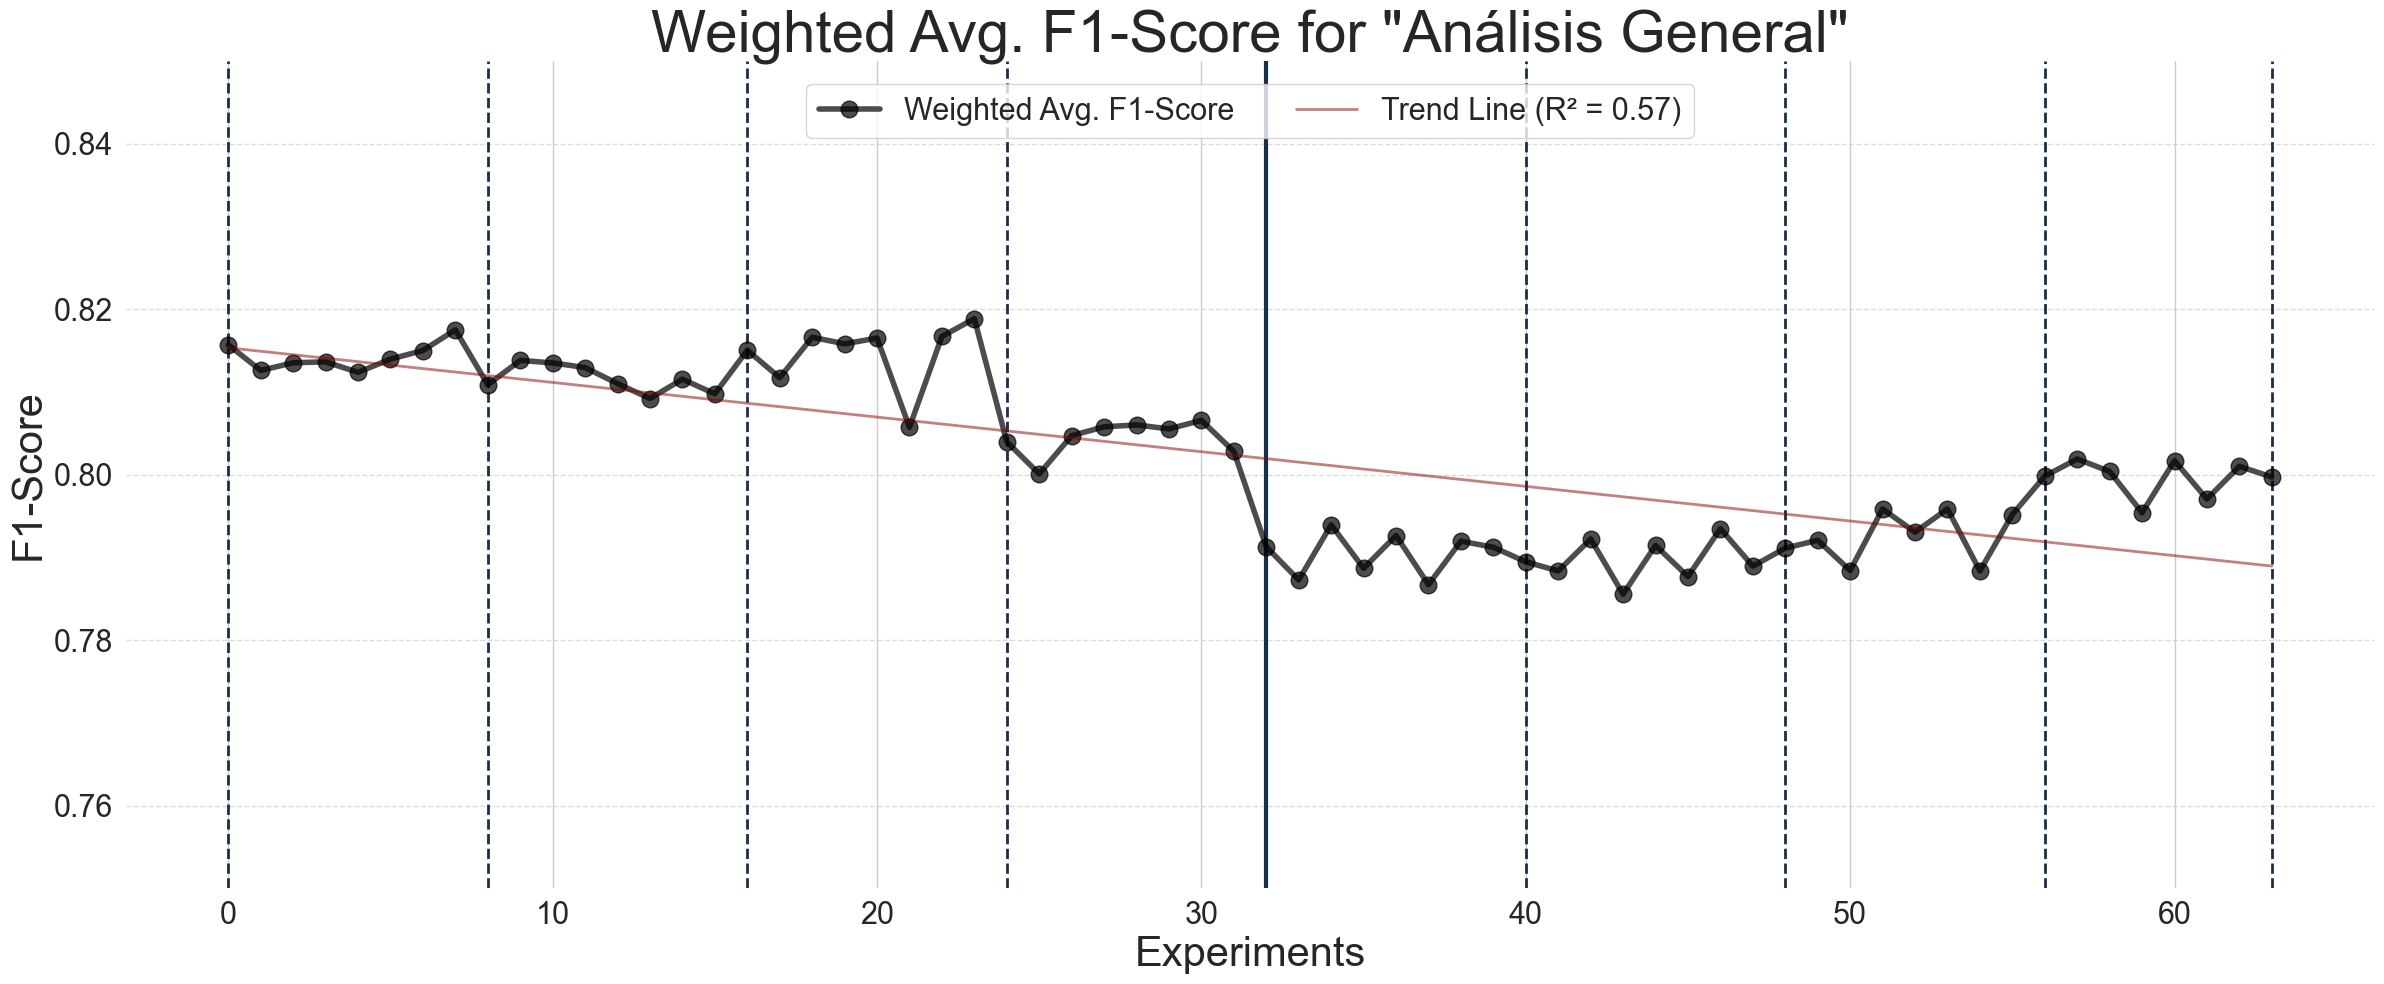

In [222]:
plt.figure(figsize=(24, 10))


# Add a vertical line for best window
for date, index in zip(specific_dates, specific_indices):
    if index in [32]:
        plt.axvline(x=index, color='#1a2e49', linestyle='-', linewidth=3)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(ageneral_df.index, ageneral_df['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=12, color='black', alpha=0.7, label='Weighted Avg. F1-Score')


# Calculate and plot trend line
slope, intercept, r_value, p_value, std_err = linregress(ageneral_df.index, ageneral_df['weighted avg_f1-score'])
trend = intercept + slope * ageneral_df.index
plt.plot(ageneral_df.index, trend, linewidth=2, color='darkred', linestyle='-', alpha=0.5, label=f'Trend Line (R² = {r_value**2:.2f})')


# Move legend to the top
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=2, fontsize=22)


# Setting labels and title
plt.title('Weighted Avg. F1-Score for "Análisis General"', fontsize=42)
plt.xlabel('Experiments', fontsize=30)
plt.ylabel('F1-Score', fontsize=30)
plt.gca().set_ylim(0.75, 0.85)
plt.gca().tick_params(axis='x', labelsize=22)
plt.gca().tick_params(axis='y', labelsize=22)

# Add a grid to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Remove spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Análisis General/GenAI/GenAI_Experiments in _Análisis General_ weighted.pdf", format='pdf')

plt.show()

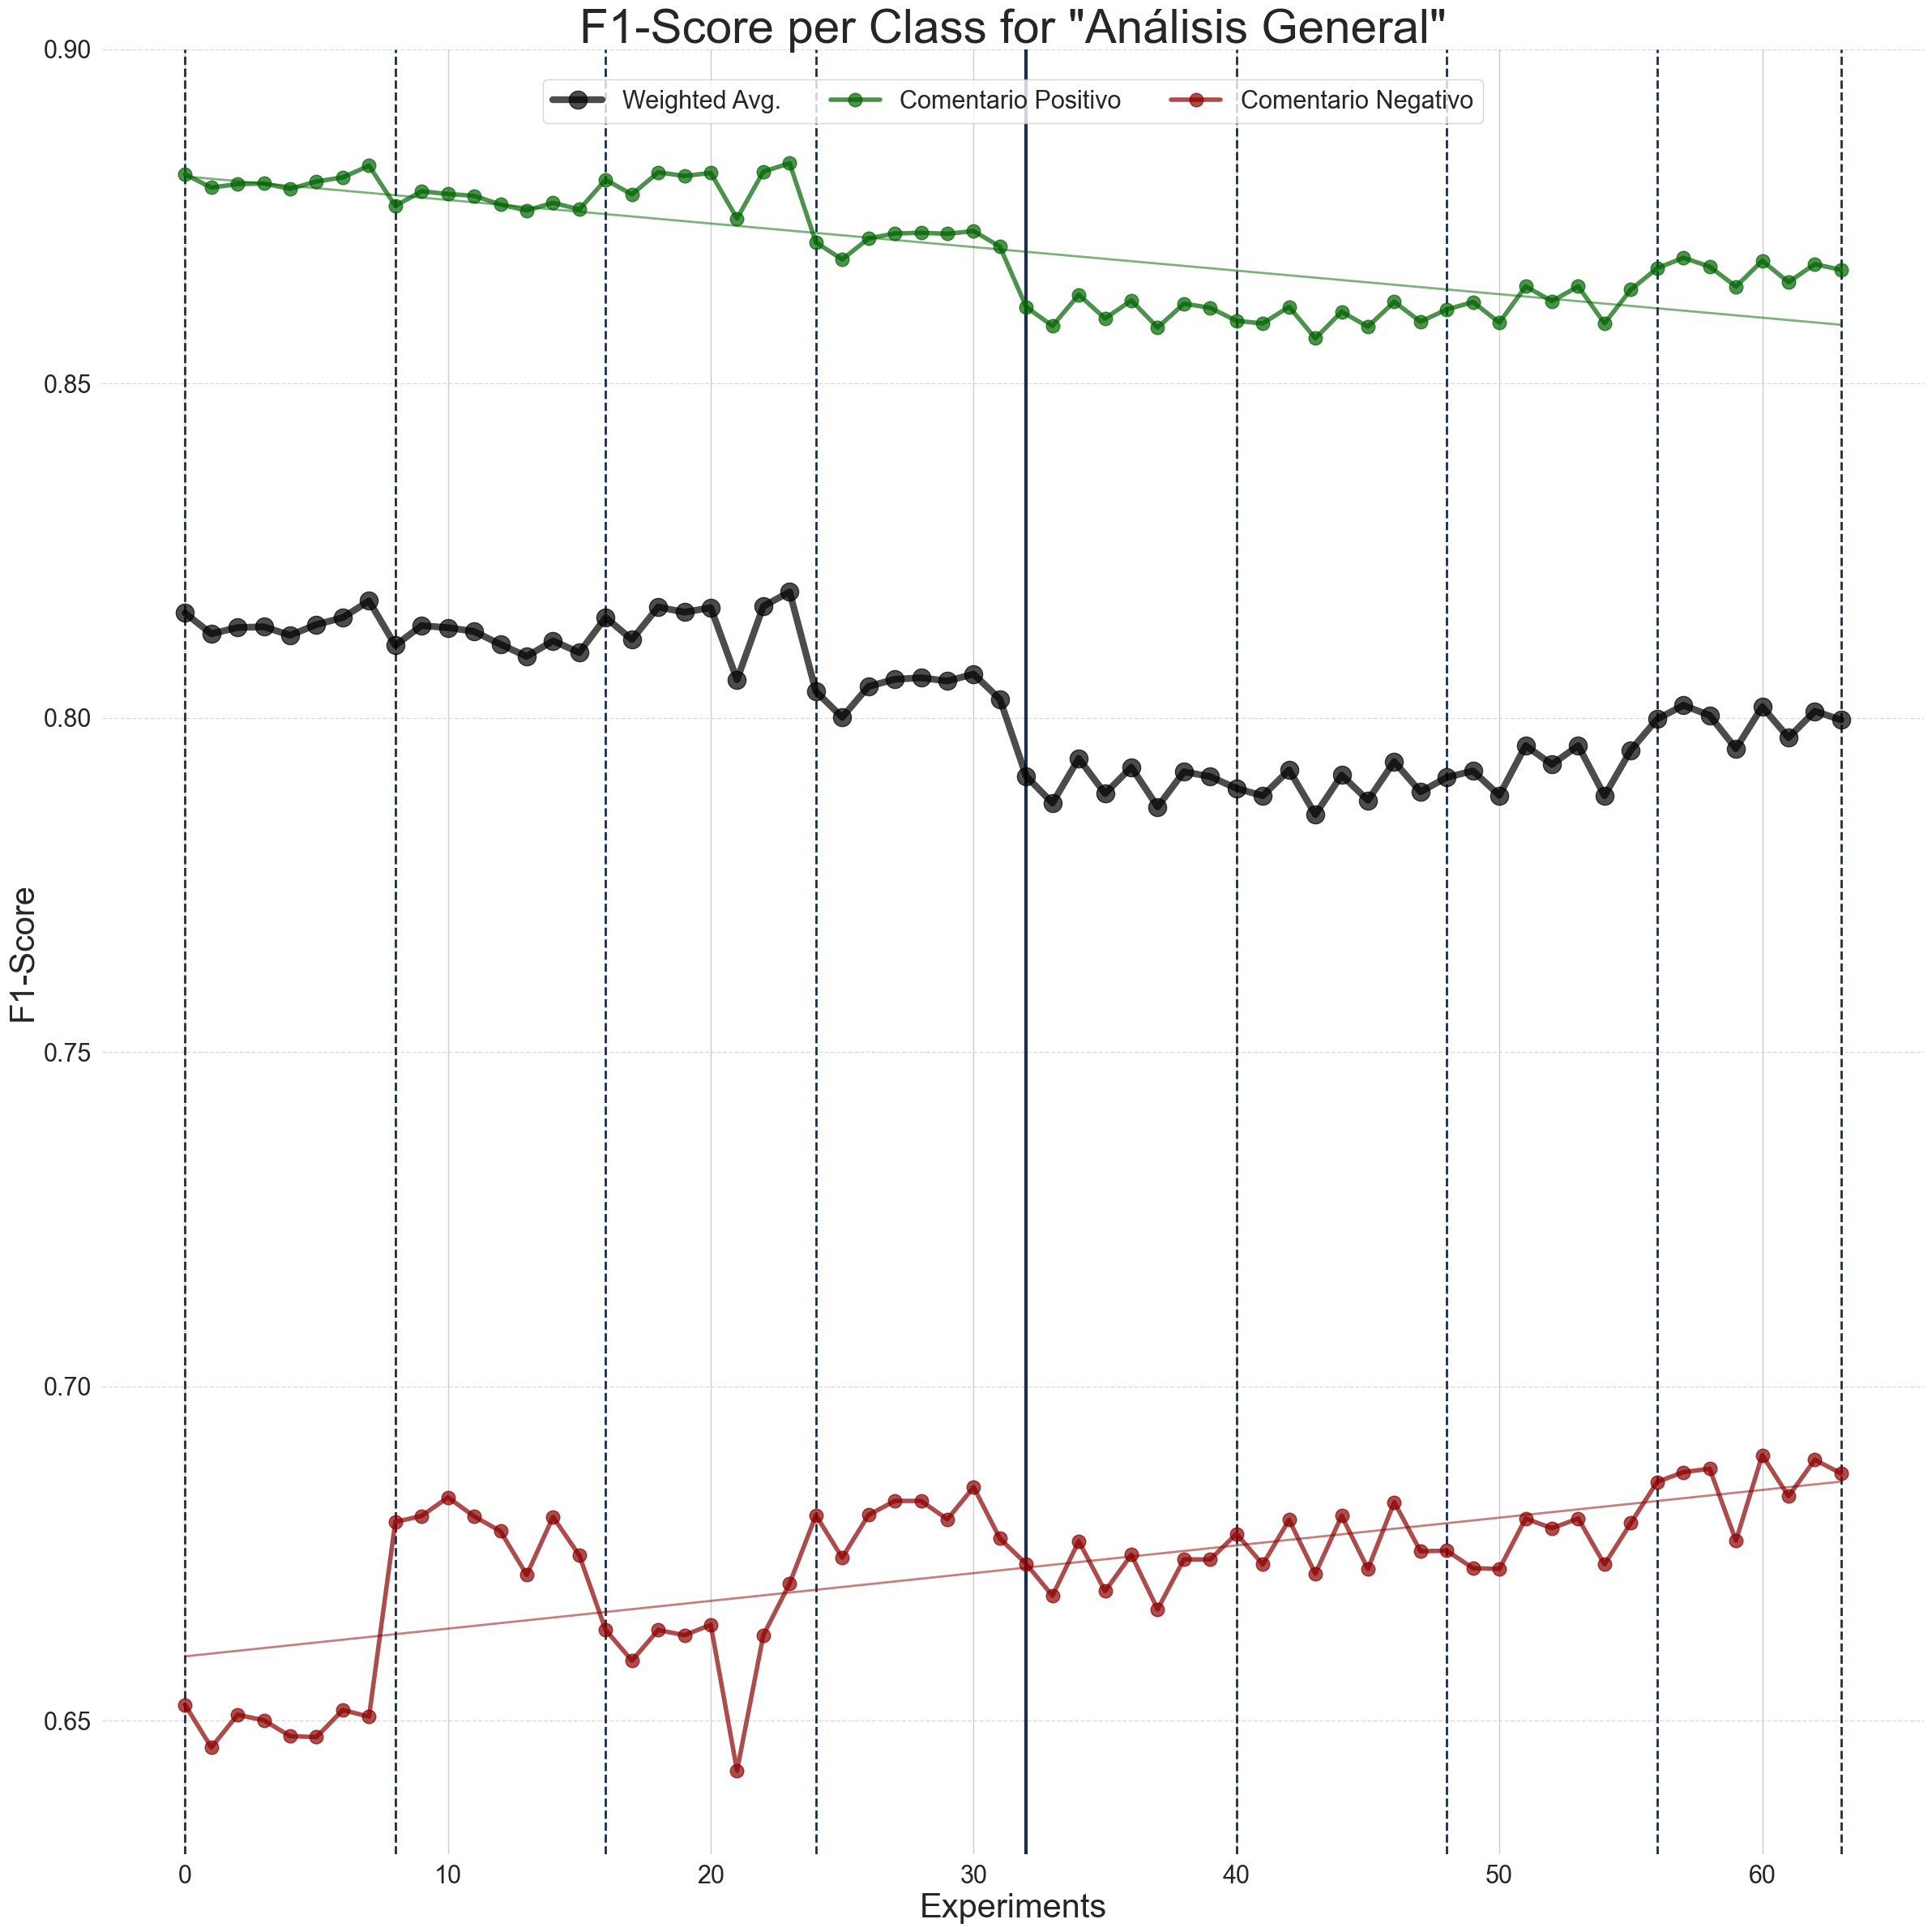

In [223]:
plt.figure(figsize=(24, 24))

# Add a vertical line for best window
for date, index in zip(specific_dates, specific_indices):
    if index in [32]:
        plt.axvline(x=index, color='#1a2e49', linestyle='-', linewidth=3)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(ageneral_df.index, ageneral_df['weighted avg_f1-score'], linewidth=6, linestyle='-', marker='o', markersize=16, color='black', alpha=0.7, label="Weighted Avg.")
for i, label in enumerate(labels):
    plt.plot(ageneral_df.index, ageneral_df[f'{label}_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=12, color=colors[i], alpha=0.7, label=label)


# Calculate and plot trend line
for i in range(len(labels)):
    slope, intercept, r_value, p_value, std_err = linregress(ageneral_df.index, ageneral_df[f'{labels[i]}_f1-score'])
    trend = intercept + slope * ageneral_df.index
    plt.plot(ageneral_df.index, trend, linewidth=2, color=colors[i], linestyle='-', alpha=0.5)

plt.legend(loc='upper center', fontsize=22, bbox_to_anchor=(0.5, 0.99), ncol=3)


# Setting labels and title
plt.title('F1-Score per Class for "Análisis General"', fontsize=42)
plt.xlabel('Experiments', fontsize=30)
plt.ylabel('F1-Score', fontsize=30)
plt.ylim(0.63, 0.90)
plt.gca().tick_params(axis='x', labelsize=22)
plt.gca().tick_params(axis='y', labelsize=22)


# Remove spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)



# Add a grid to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()

# Save the plot as a PDF 
plt.savefig("../../../IMAGES/Análisis General/GenAI/GenAI_Experiments in _Análisis General_ f1score.pdf", format='pdf')

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


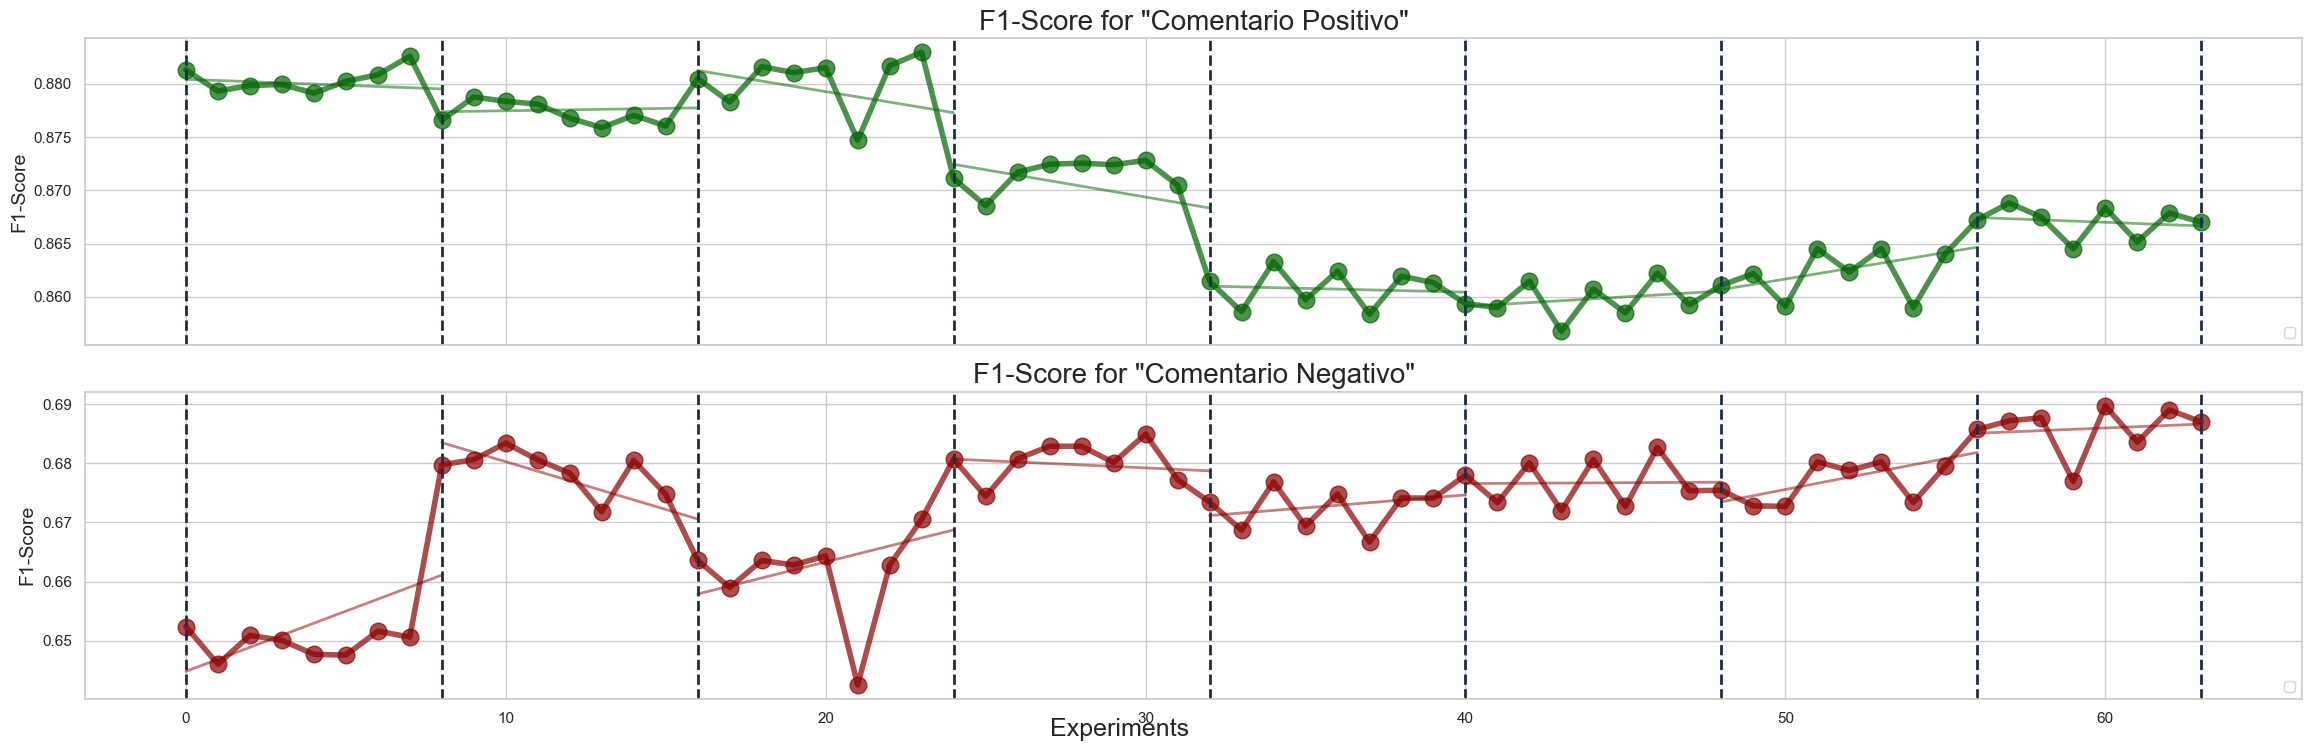

In [224]:
# Create subplots
fig, axes = plt.subplots(len(labels), 1, figsize=(24, len(labels) * 4), sharex=True)

# Plot each balance in a separate subplot
for i, label in enumerate(labels):
    ax = axes[i]

    # Plot Weighted F1-Scores for each label
    ax.plot(ageneral_df.index, 
            ageneral_df[f'{label}_f1-score'], 
            linewidth=4, linestyle='-', marker='o', markersize=12, color=colors[i], alpha=0.7)
    
    
    for j in range(len(specific_indices) - 1):
        # Calculate and plot trend line for each window
        start_idx = specific_indices[j]
        end_idx = specific_indices[j + 1]
        
        window_indices = ageneral_df.index[start_idx:end_idx+1]
        slope, intercept, r_value, p_value, std_err = linregress(window_indices, ageneral_df[f'{label}_f1-score'][start_idx:end_idx+1])
        trend = intercept + slope * window_indices
        ax.plot(window_indices, trend, linewidth=2, color=colors[i], linestyle='-', alpha=0.5) # label=f'Trend Line W{j} (R² = {r_value**2:.2f})'
    
    ax.set_title(f'F1-Score for "{label}"', fontsize=20)
    ax.set_ylabel('F1-Score', fontsize=14)
    ax.grid(True)
    ax.legend(loc='lower right', fontsize=10)

    # Add vertical lines for specific indices
    for date, index in zip(specific_dates, specific_indices):
        # if index in [160, 184]:
        #     ax.axvline(x=index, color='#fd7b6e', linestyle='--', linewidth=2)
        # else:
            ax.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)


# Set common labels
fig.text(0.5, 0.04, 'Experiments', ha='center', fontsize=18)

# Adjust layout
plt.tight_layout(rect=[0.03, 0.03, 1, 0.97])
plt.show()


### Context

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\2076367159.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, x='Context', y='weighted avg_f1-score', hue='Model', data=ageneral_df, palette='crest_r', alpha=0.7, ci=None)


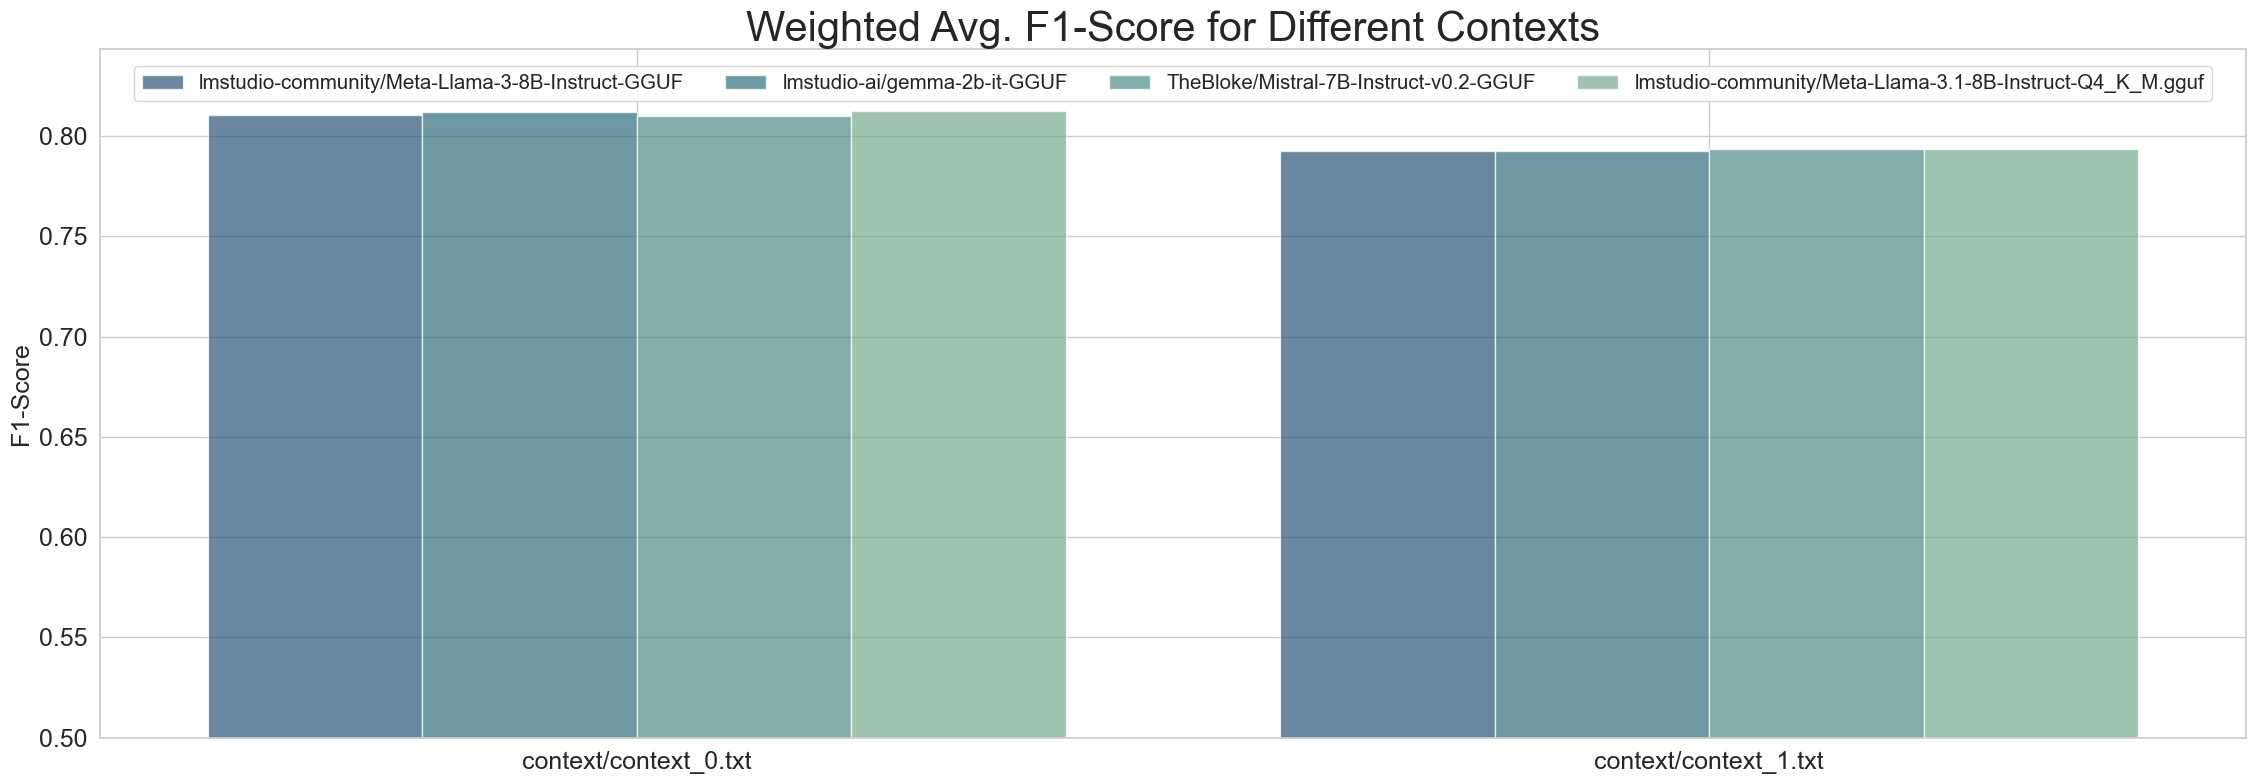

In [225]:
# Set Seaborn style
from matplotlib.gridspec import GridSpec

sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = ageneral_df['weighted avg_f1-score'].mean() + 4 * ageneral_df['weighted avg_f1-score'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Context', y='weighted avg_f1-score', hue='Model', data=ageneral_df, palette='crest_r', alpha=0.7, ci=None)
ax1.set_title('Weighted Avg. F1-Score for Different Contexts', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('F1-Score', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0.5, y_max)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4, fontsize=14.75)


# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

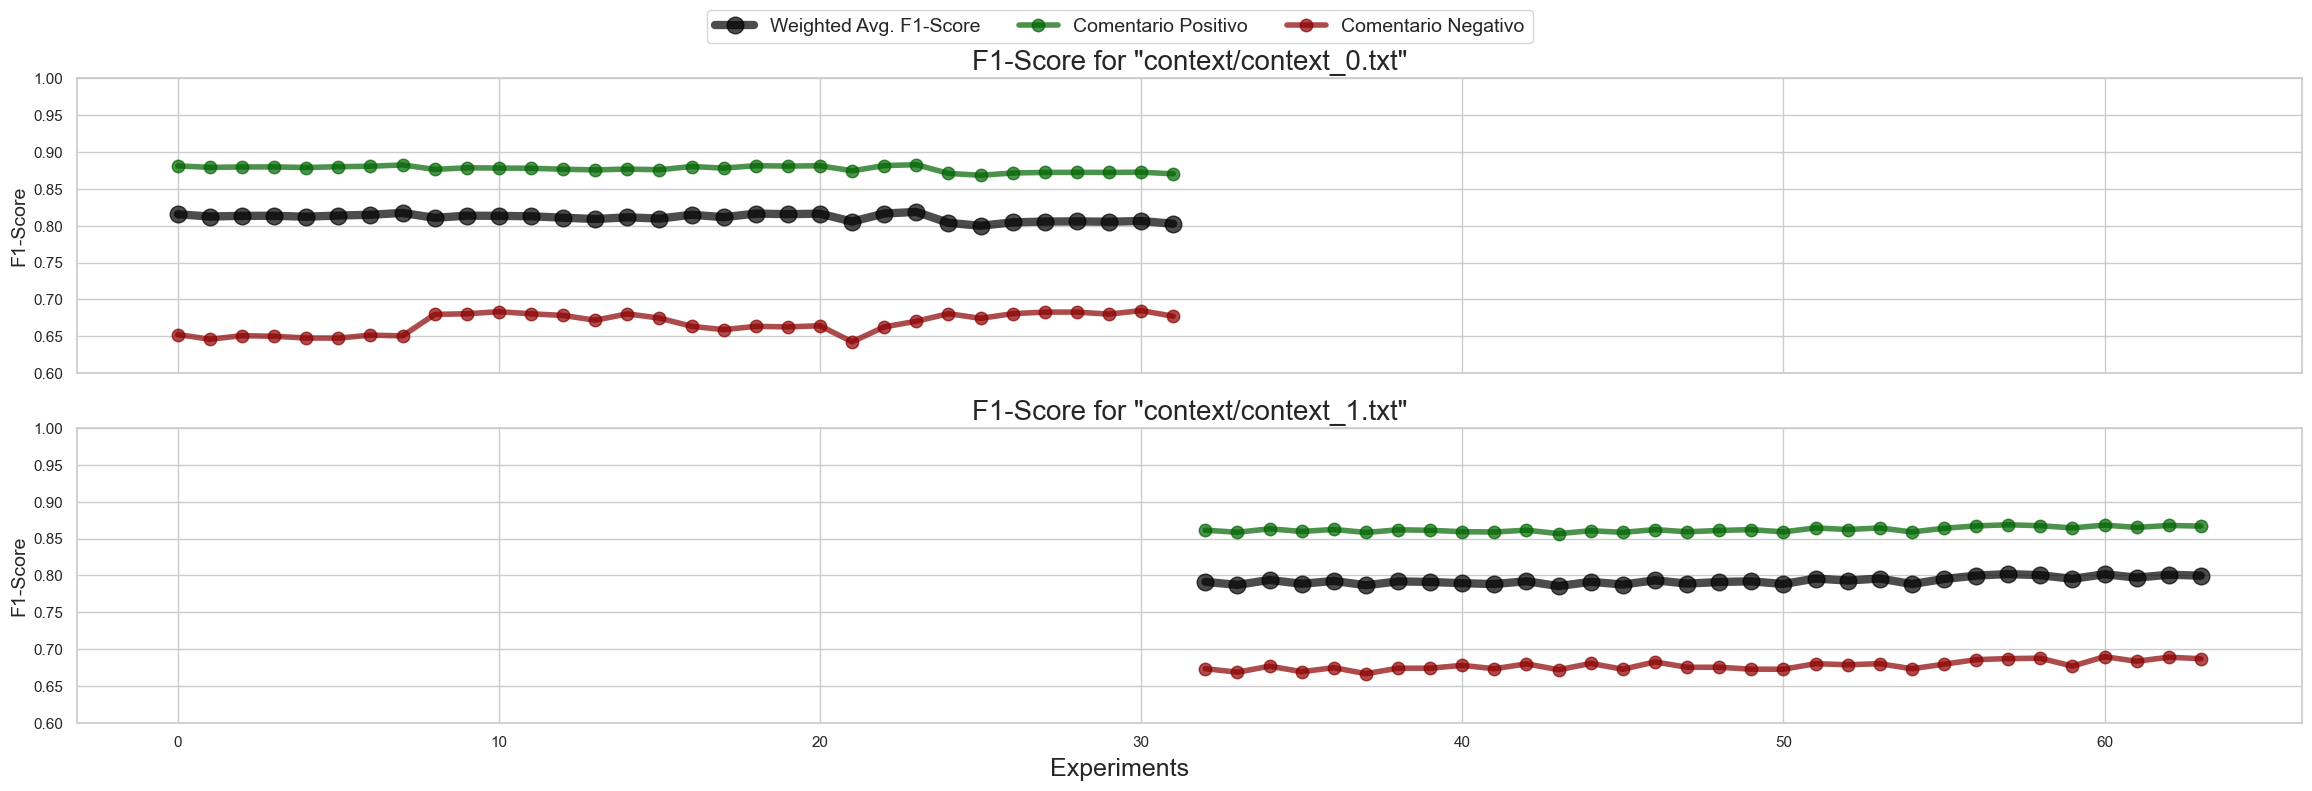

In [226]:
# Define the list of balances
contexts = ['context/context_0.txt', 'context/context_1.txt']

# Create subplots
fig, axes = plt.subplots(len(contexts), 1, figsize=(24, len(contexts) * 4), sharex=True)

# Initialize a list to store all lines for the legend
lines = []
labels_legend = []



# Plot each balance in a separate subplot
for i, context in enumerate(contexts):
    ax = axes[i]

    # Plot Weighted F1-Scores
    line1, = ax.plot(ageneral_df[ageneral_df['Context'] == context].index, 
            ageneral_df[ageneral_df['Context'] == context]['weighted avg_f1-score'], 
            linewidth=6, linestyle='-', marker='o', markersize=12, color='black', alpha=0.7, label=context)
    
    # Plot "Comentario Positivo" F1-Scores
    line2, = ax.plot(ageneral_df[ageneral_df['Context'] == context].index, 
            ageneral_df[ageneral_df['Context'] == context]['Comentario Positivo_f1-score'], 
            linewidth=4, linestyle='-', marker='o', markersize=9, color=colors[0], alpha=0.7, label=context)
    
    # Plot "Comentario Negativo" F1-Scores
    line3, =  ax.plot(ageneral_df[ageneral_df['Context'] == context].index, 
            ageneral_df[ageneral_df['Context'] == context]['Comentario Negativo_f1-score'], 
            linewidth=4, linestyle='-', marker='o', markersize=9, color=colors[1], alpha=0.7, label=context)
    
    ax.set_title(f'F1-Score for "{context}"', fontsize=20)
    ax.set_ylabel('F1-Score', fontsize=14)
    ax.set_ylim(0.6, 1)
    ax.grid(True)

# Append lines and labels only once
lines.extend([line1, line2, line3])
labels_legend.extend(['Weighted Avg. F1-Score', 'Comentario Positivo', 'Comentario Negativo'])

# Set common labels
fig.text(0.5, 0.02, 'Experiments', ha='center', fontsize=18)

# Add a single legend for all subplots
fig.legend(lines, labels_legend, loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=3, fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.show()


### Prompt

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\4250190566.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, x='Prompt', y='weighted avg_f1-score', hue='Model', data=ageneral_df, palette='crest_r', alpha=0.7, ci=None)


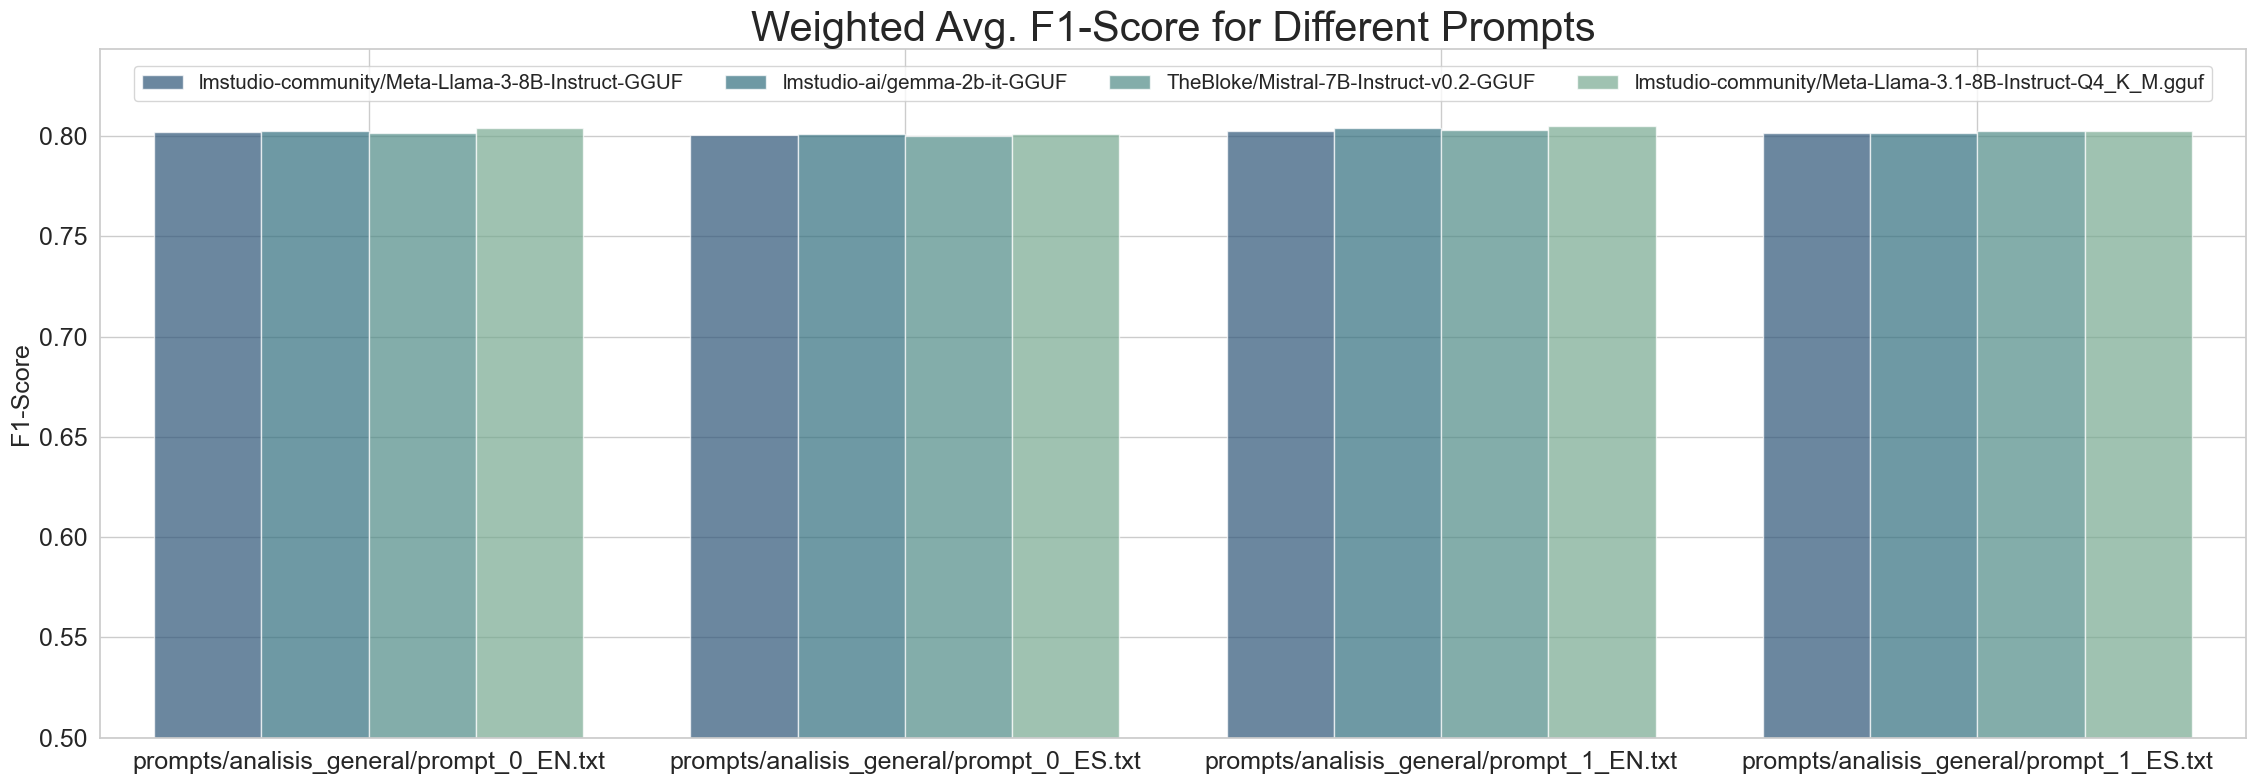

In [227]:
# Set Seaborn style
from matplotlib.gridspec import GridSpec

sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = ageneral_df['weighted avg_f1-score'].mean() + 4 * ageneral_df['weighted avg_f1-score'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Prompt', y='weighted avg_f1-score', hue='Model', data=ageneral_df, palette='crest_r', alpha=0.7, ci=None)
ax1.set_title('Weighted Avg. F1-Score for Different Prompts', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('F1-Score', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0.5, y_max)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4, fontsize=14.75)


# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

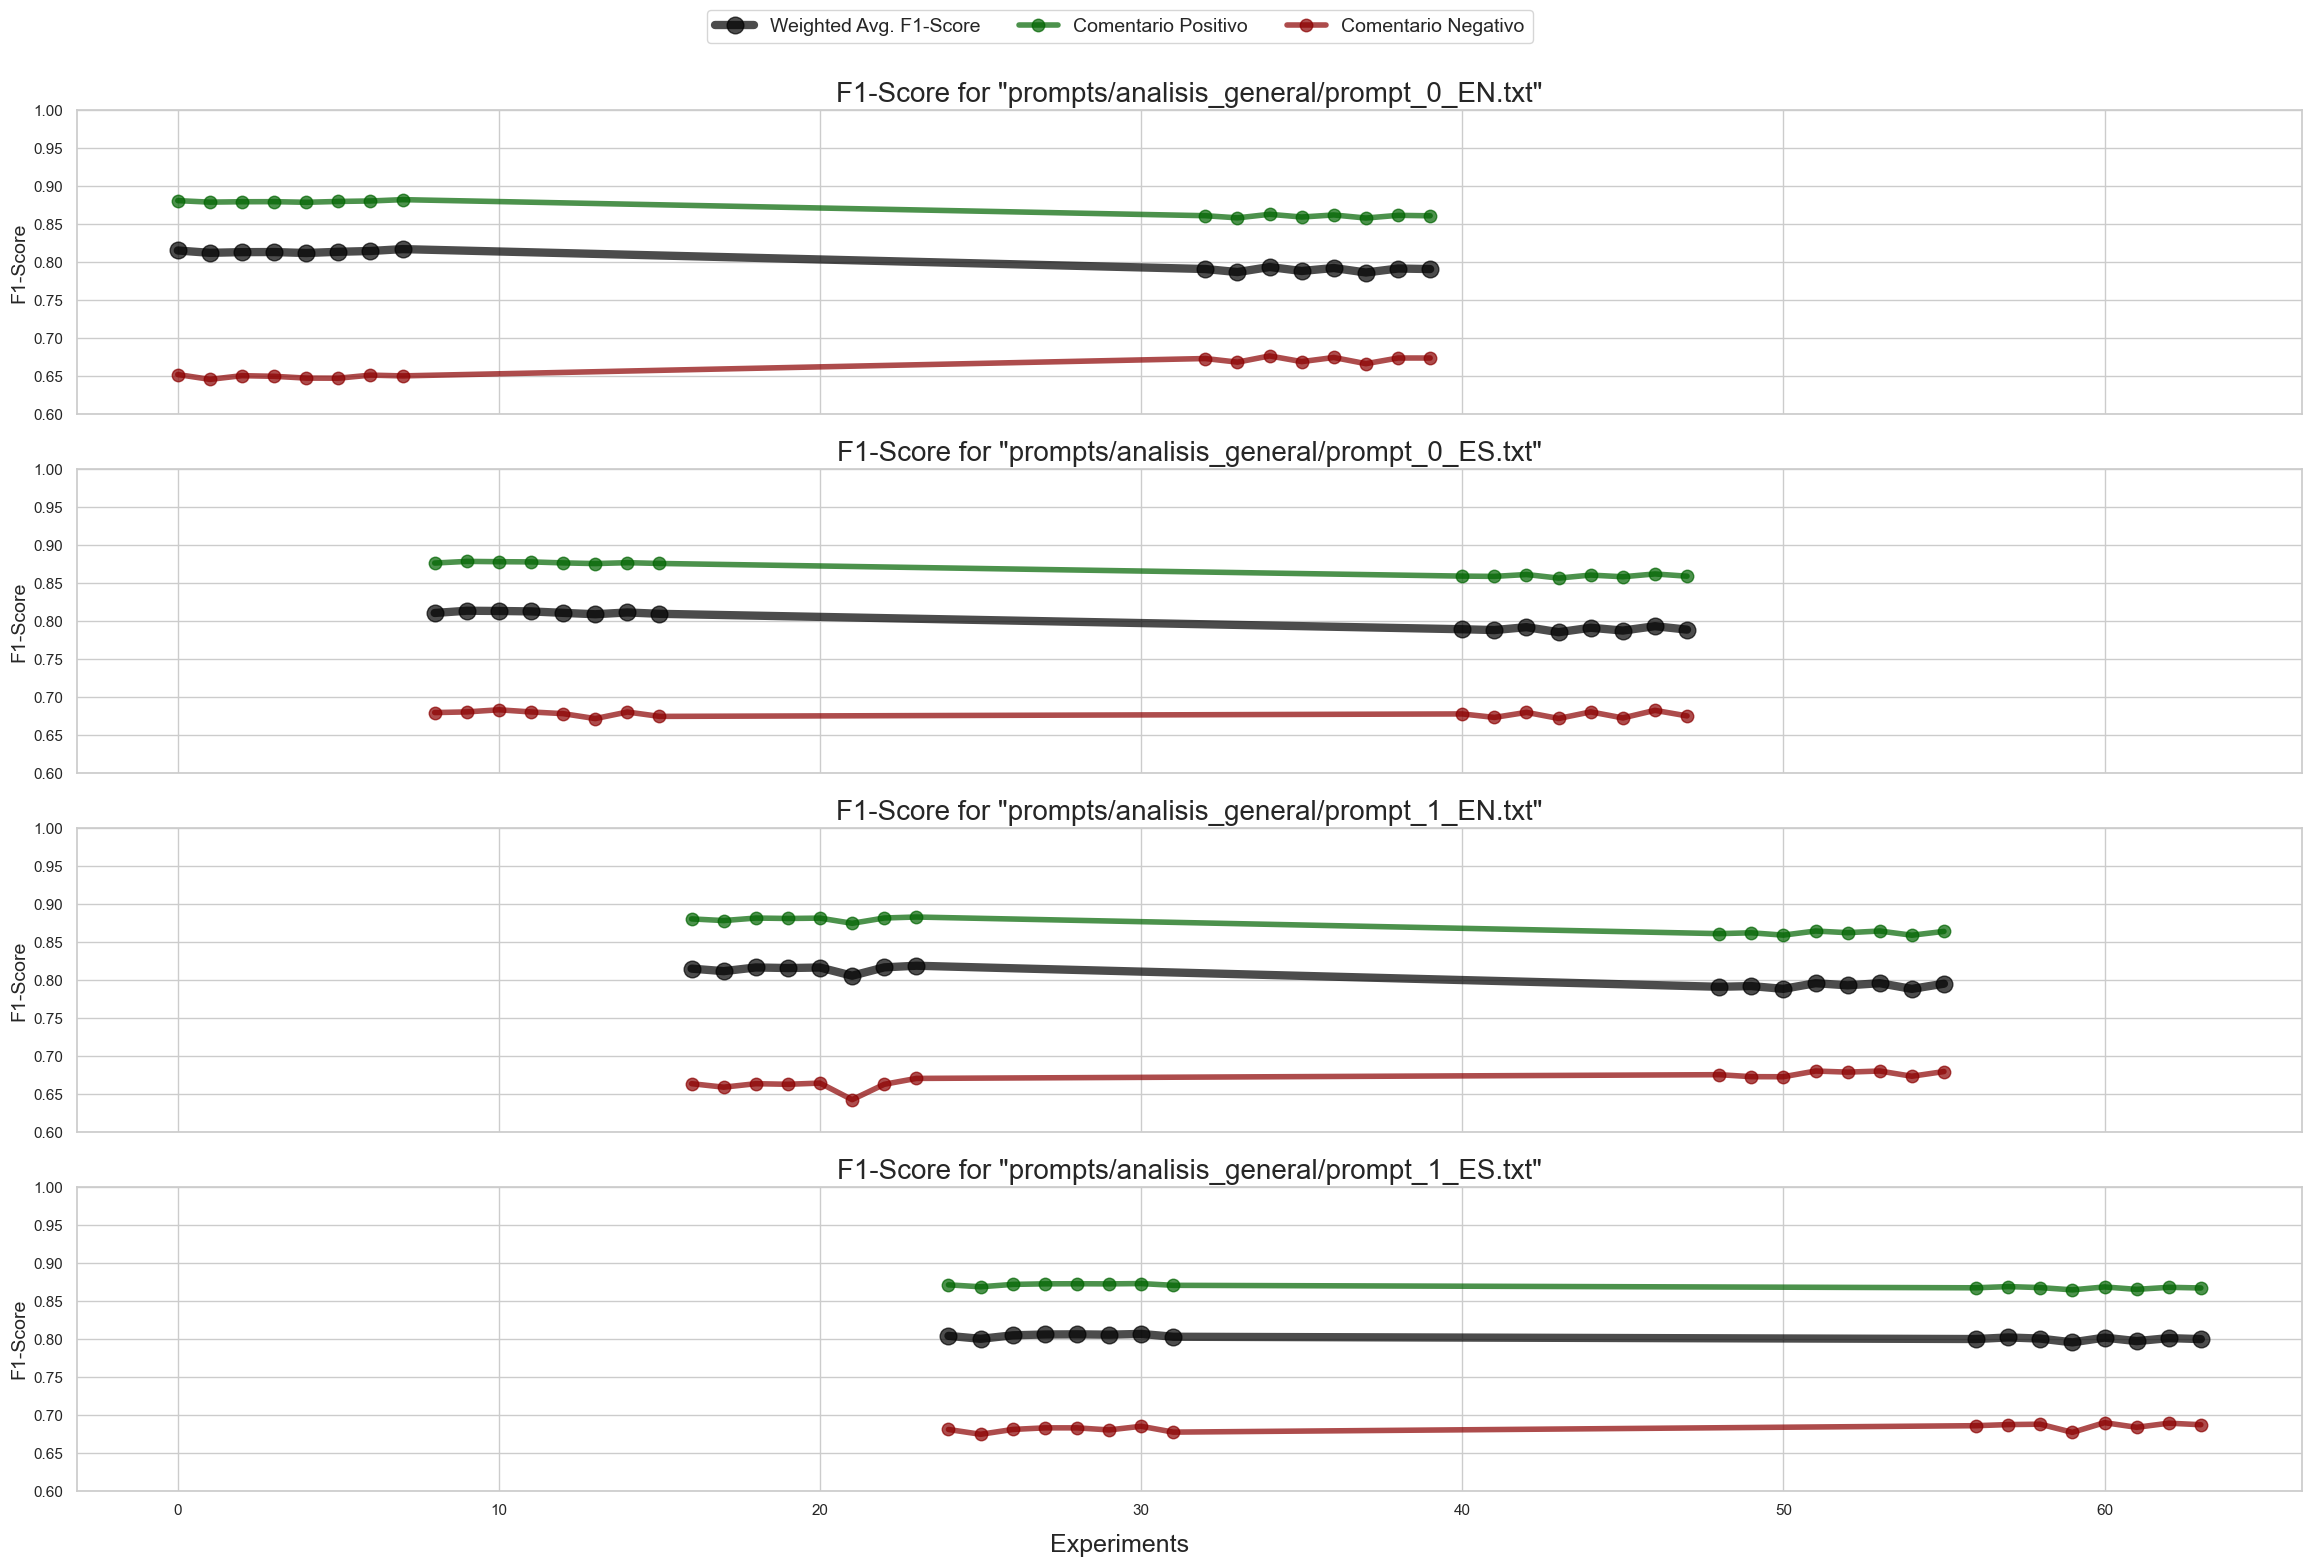

In [228]:
# Define the list of balances
prompts = ['prompts/analisis_general/prompt_0_EN.txt', 'prompts/analisis_general/prompt_0_ES.txt', 'prompts/analisis_general/prompt_1_EN.txt', 'prompts/analisis_general/prompt_1_ES.txt']

# Create subplots
fig, axes = plt.subplots(len(prompts), 1, figsize=(24, len(prompts) * 4), sharex=True)

# Initialize a list to store all lines for the legend
lines = []
labels_legend = []



# Plot each balance in a separate subplot
for i, prompt in enumerate(prompts):
    ax = axes[i]

    # Plot Weighted F1-Scores
    line1, = ax.plot(ageneral_df[ageneral_df['Prompt'] == prompt].index, 
            ageneral_df[ageneral_df['Prompt'] == prompt]['weighted avg_f1-score'], 
            linewidth=6, linestyle='-', marker='o', markersize=12, color='black', alpha=0.7, label=prompt)
    
    # Plot "Comentario Positivo" F1-Scores
    line2, = ax.plot(ageneral_df[ageneral_df['Prompt'] == prompt].index, 
            ageneral_df[ageneral_df['Prompt'] == prompt]['Comentario Positivo_f1-score'], 
            linewidth=4, linestyle='-', marker='o', markersize=9, color=colors[0], alpha=0.7, label=prompt)
    
    # Plot "Comentario Negativo" F1-Scores
    line3, =  ax.plot(ageneral_df[ageneral_df['Prompt'] == prompt].index, 
            ageneral_df[ageneral_df['Prompt'] == prompt]['Comentario Negativo_f1-score'], 
            linewidth=4, linestyle='-', marker='o', markersize=9, color=colors[1], alpha=0.7, label=prompt)
    
    ax.set_title(f'F1-Score for "{prompt}"', fontsize=20)
    ax.set_ylabel('F1-Score', fontsize=14)
    ax.set_ylim(0.6, 1)
    ax.grid(True)

# Append lines and labels only once
lines.extend([line1, line2, line3])
labels_legend.extend(['Weighted Avg. F1-Score', 'Comentario Positivo', 'Comentario Negativo'])

# Set common labels
fig.text(0.5, 0.02, 'Experiments', ha='center', fontsize=18)

# Add a single legend for all subplots
fig.legend(lines, labels_legend, loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=3, fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.show()


### Performance (Time)

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\59023614.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, x='Prompt', y='Time (s)', hue='Model', data=ageneral_df, palette='crest_r', alpha=0.7, ci=None)


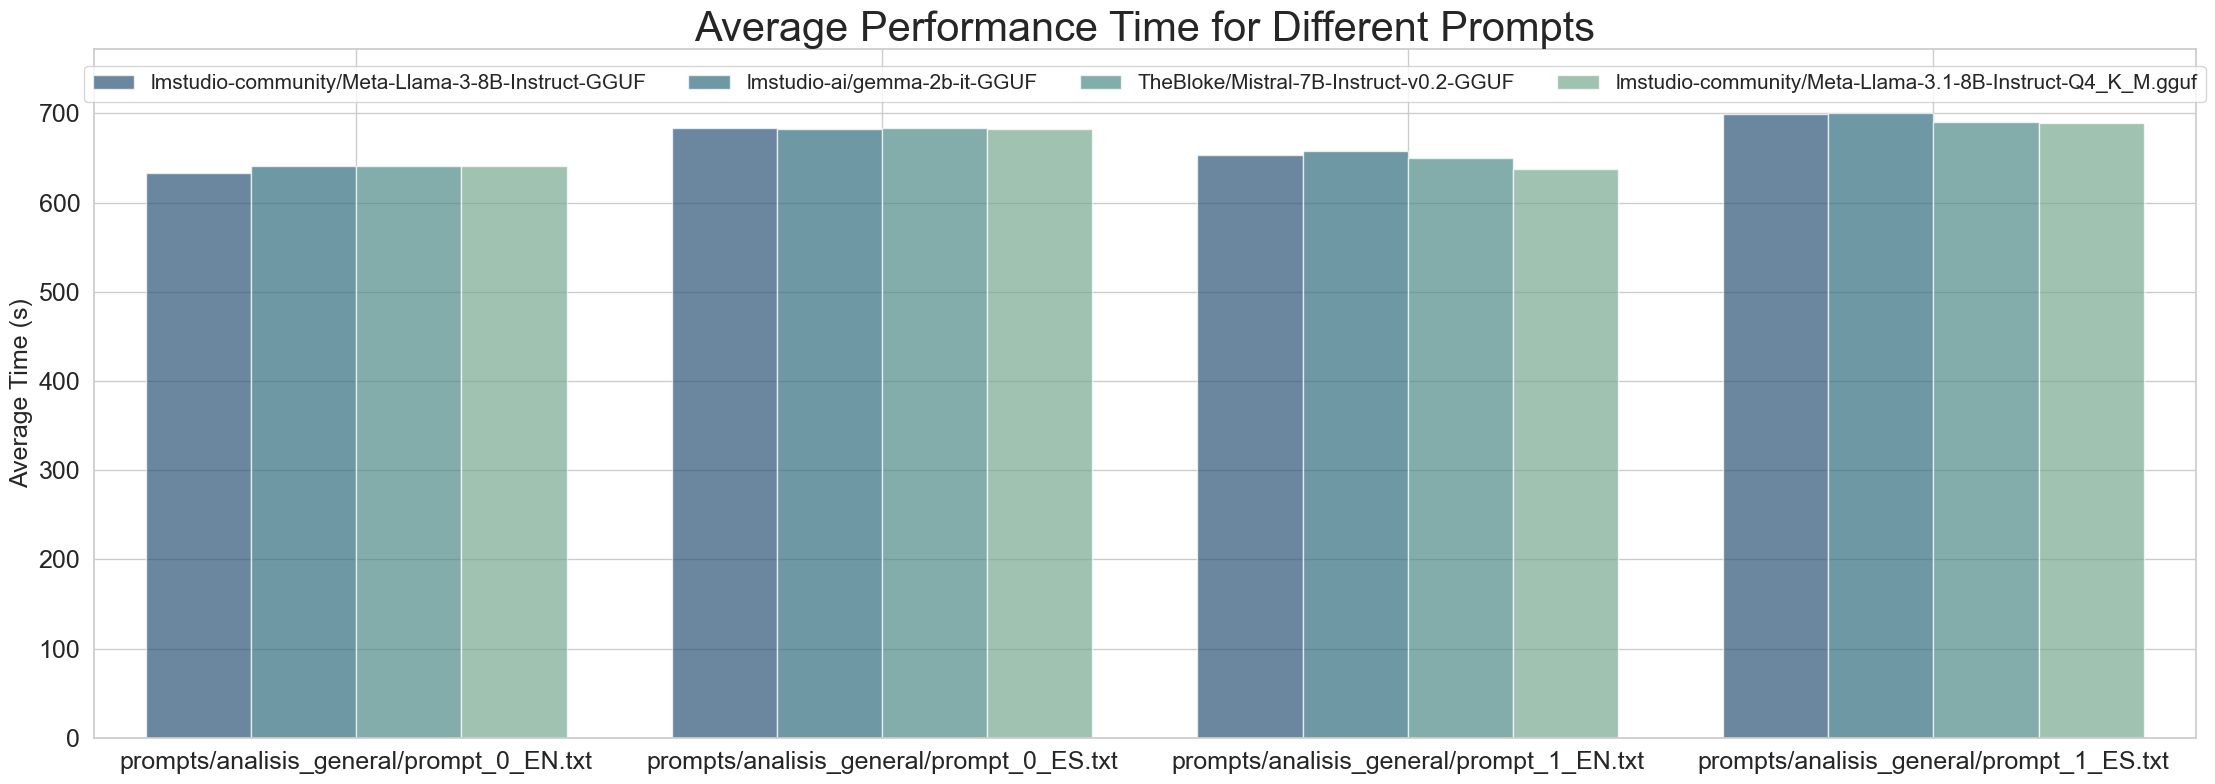

In [229]:
# Set Seaborn style
from matplotlib.gridspec import GridSpec

sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = ageneral_df['Time (s)'].mean() + 4 * ageneral_df['Time (s)'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Prompt', y='Time (s)', hue='Model', data=ageneral_df, palette='crest_r', alpha=0.7, ci=None)
ax1.set_title('Average Performance Time for Different Prompts', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('Average Time (s)', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4, fontsize=15)


# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\2201037276.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, x='Context', y='Time (s)', hue='Model', data=ageneral_df, palette='crest_r', alpha=0.7, ci=None)


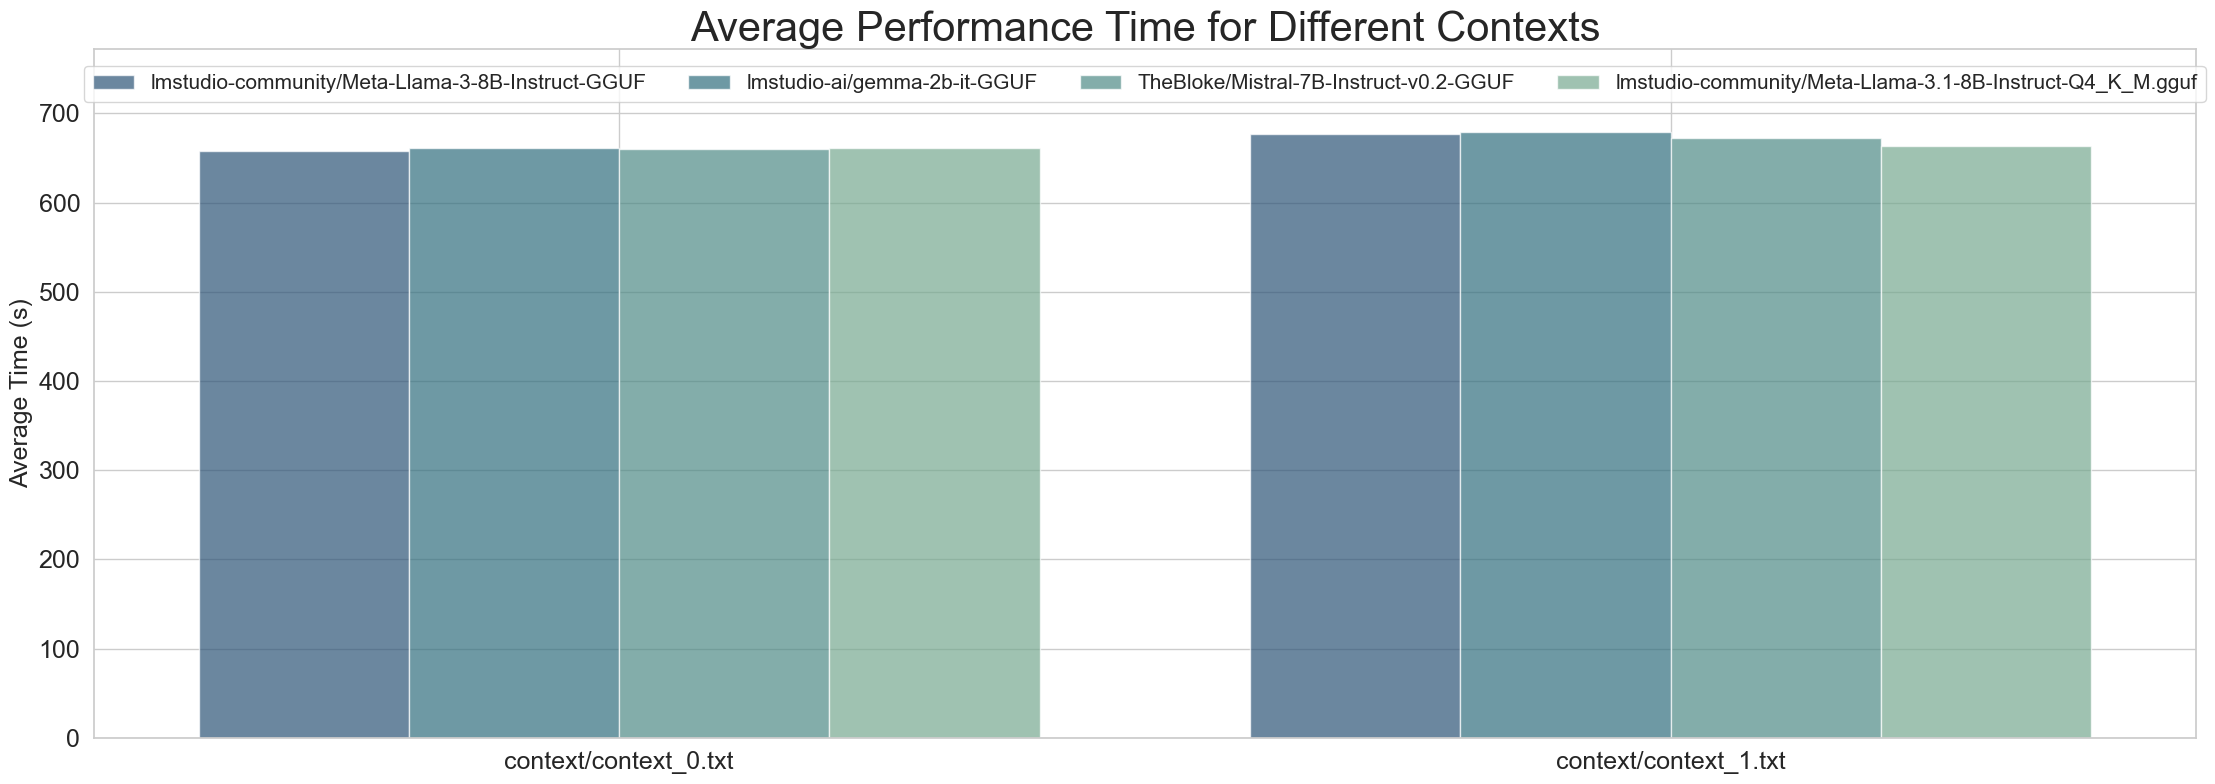

In [230]:
# Set Seaborn style
from matplotlib.gridspec import GridSpec

sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = ageneral_df['Time (s)'].mean() + 4 * ageneral_df['Time (s)'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Context', y='Time (s)', hue='Model', data=ageneral_df, palette='crest_r', alpha=0.7, ci=None)
ax1.set_title('Average Performance Time for Different Contexts', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('Average Time (s)', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=5, fontsize=15)


# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

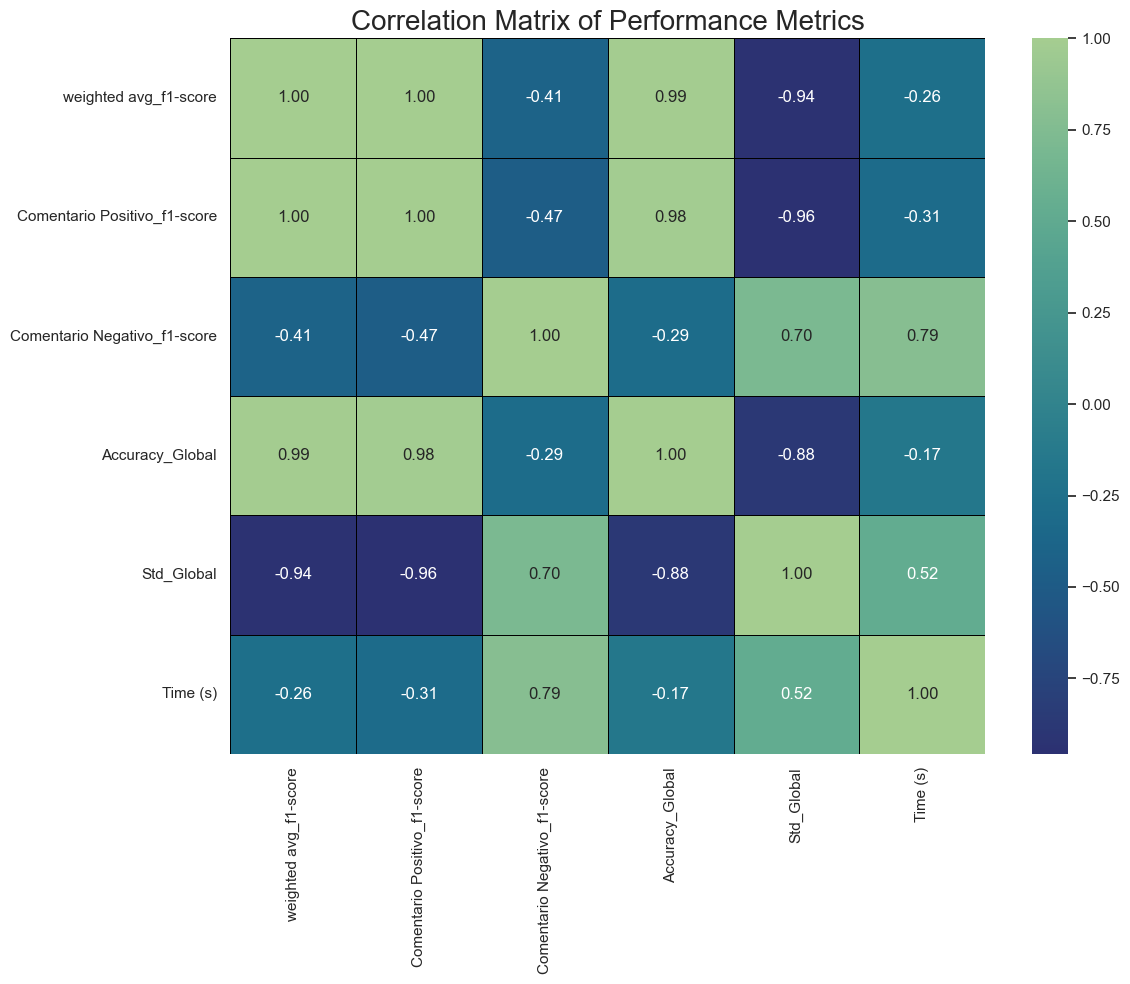

In [231]:
# Calculate the correlation matrix
correlation_matrix = ageneral_df[['weighted avg_f1-score', f'{labels[0]}_f1-score', f'{labels[1]}_f1-score', 'Accuracy_Global', 'Std_Global','Time (s)']].corr()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='crest_r', fmt='.2f', linewidths=0.5, linecolor='black')

# Set title and labels
plt.title('Correlation Matrix of Performance Metrics', fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()


### Confussion Matrix - Best Model

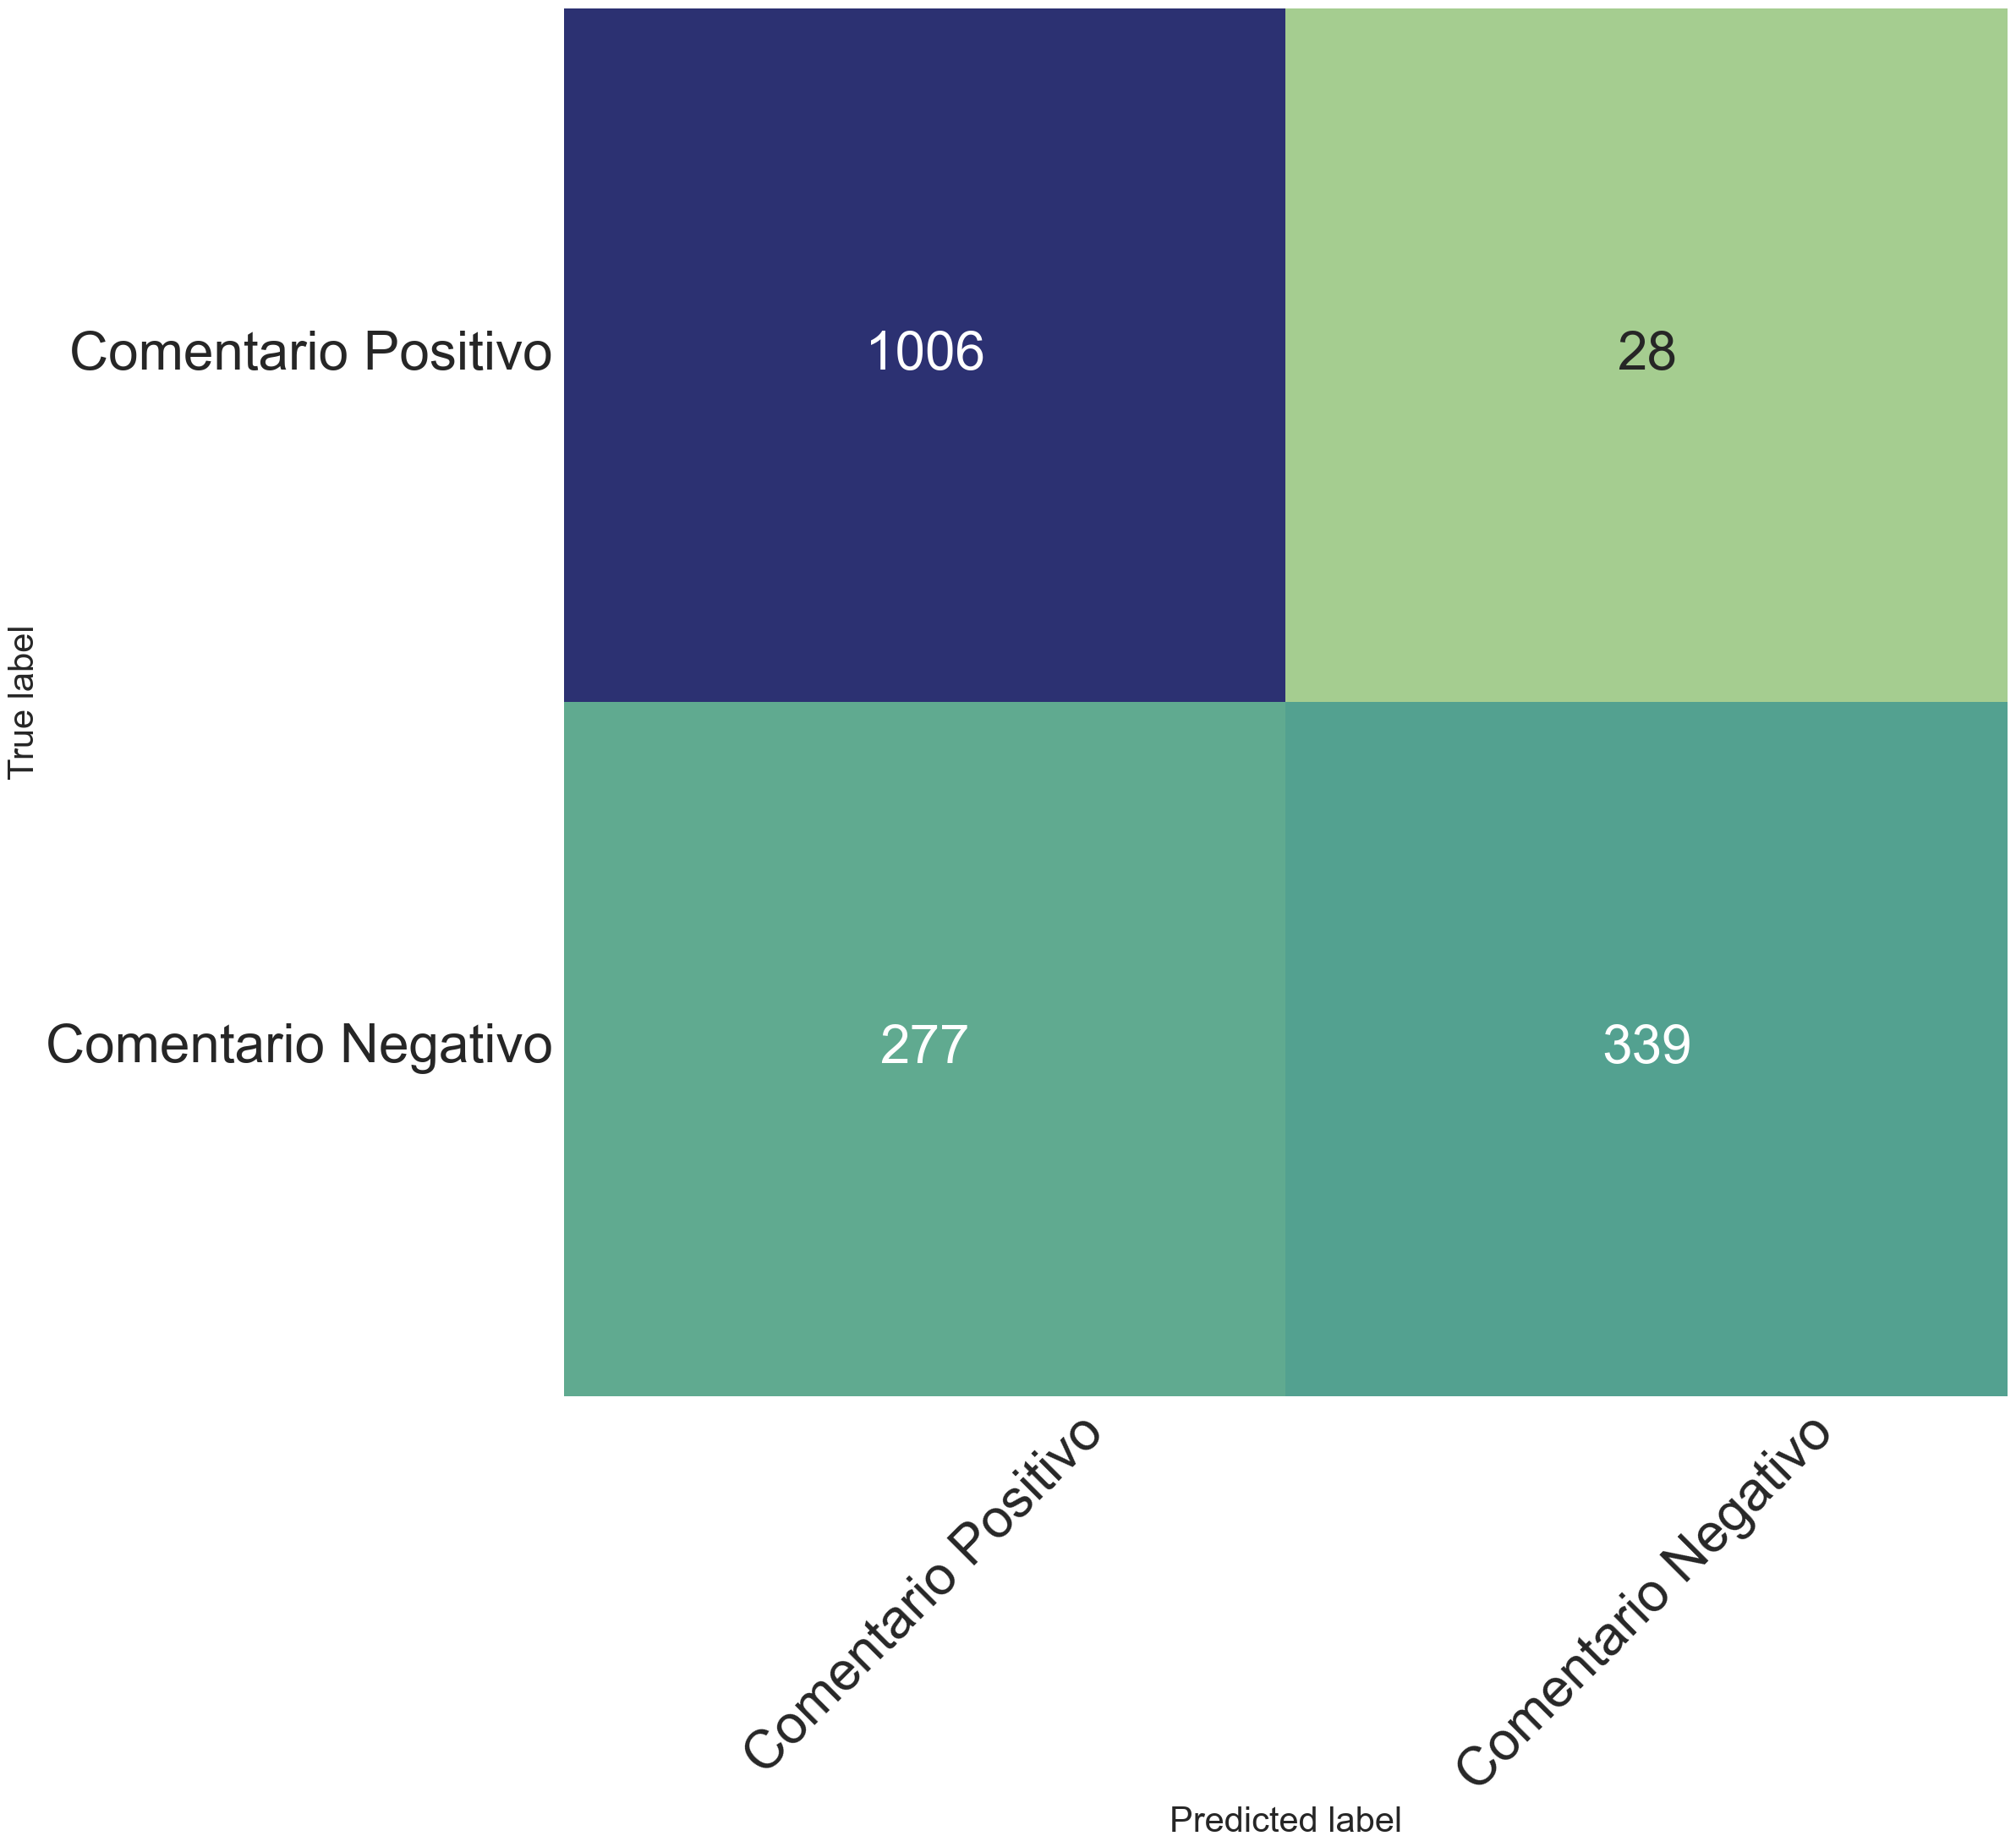

In [232]:
from sklearn.metrics import confusion_matrix

# Datos de la matriz de confusión para el modelo 'c1c0f5ad-38ae-4c8b-be38-c98019e67891'
y_true = ['Comentario Positivo'] * 1034 + ['Comentario Negativo'] * 616
y_pred = [
    'Comentario Positivo'] * 1006 + ['Comentario Negativo'] * 28 + \
    ['Comentario Positivo'] * 277 + ['Comentario Negativo'] * 339


# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plotear la matriz de confusión
plt.figure(figsize=(24, 22))

sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=labels, 
            yticklabels=labels, annot_kws={"size": 46}, cbar=False)

plt.xlabel('Predicted label', fontsize=30)
plt.ylabel('True label', fontsize=30)
plt.xticks(rotation=45, fontsize=46)
plt.yticks(rotation=0, fontsize=46)
# plt.title('Confusion Matrix for Best Model of GenAI Experiments')

plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Análisis General/GenAI/GenAI_Experiments in _Análisis General_ best_model.pdf", format='pdf')

plt.show()


## Contenido Negativo

In [233]:
# Define the list of labels and colors
labels = ['Desprestigiar Víctima', 'Desprestigiar Acto', 'Insultos', 'Desprestigiar Deportista Autora']
colors = ['#478CCF', '#36C2CE', '#77E4C8', '#4535C1']

In [234]:
# Filter dataset for "Contenido Negativo"
cnegativo_df = df[df["Type"] == "contenido_negativo"]
len(cnegativo_df)

64

In [235]:
cnegativo_df

Run_ID  \
64   93569656-3d1c-4c27-a3b6-2512cdf7877e   
65   33590b62-53de-4f38-8853-6fced3c58270   
66   7e1a4103-3908-48bb-aadc-768102de850e   
67   254c8f42-98f8-4b99-92eb-e0f6ec3670bf   
68   b751f866-8a18-431a-af19-b7fb9e33c49f   
..                                    ...   
123  c7eab2cd-744d-4e42-8292-59c420fef6e2   
124  2e1697d2-8a52-4618-a2d9-91d2fbdf177e   
125  e504898d-eb7f-4e37-8cea-cdbc5360676b   
126  429d21d6-b551-4edb-8da8-6c4025e973fe   
127  ef0a3b9e-5e59-4d7a-a241-3b0926b5bf6e   

                                                  Data                Context  \
64                Autora                           ...  context/context_0.txt   
65                Autora                           ...  context/context_0.txt   
66                Autora                           ...  context/context_0.txt   
67                Autora                           ...  context/context_0.txt   
68                Autora                           ...  context/context_0.txt   
..                                                 ...                    ...   
123               Autora                           ...  context/context_1.txt   
124               Autora                           ...  context/context_1.txt   
125               Autora                           ...  context/context_1.txt   
126               Autora                           ...  context/context_1.txt   
127               Autora                           ...  context/context_1.txt   

                                         Prompt  Temperature  \
64   prompts/contenido_negativo/prompt_0_EN.txt          0.1   
65   prompts/contenido_negativo/prompt_0_EN.txt          0.5   
66   prompts/contenido_negativo/prompt_0_EN.txt          0.1   
67   prompts/contenido_negativo/prompt_0_EN.txt          0.5   
68   prompts/contenido_negativo/prompt_0_EN.txt          0.1   
..                                          ...          ...   
123  prompts/contenido_negativo/prompt_1_ES.txt          0.5   
124  prompts/contenido_negativo/prompt_1_ES.txt          0.1   
125  prompts/contenido_negativo/prompt_1_ES.txt          0.5   
126  prompts/contenido_negativo/prompt_1_ES.txt          0.1   
127  prompts/contenido_negativo/prompt_1_ES.txt          0.5   

                                                 Model                Type  \
64    lmstudio-community/Meta-Llama-3-8B-Instruct-GGUF  contenido_negativo   
65    lmstudio-community/Meta-Llama-3-8B-Instruct-GGUF  contenido_negativo   
66                        lmstudio-ai/gemma-2b-it-GGUF  contenido_negativo   
67                        lmstudio-ai/gemma-2b-it-GGUF  contenido_negativo   
68              TheBloke/Mistral-7B-Instruct-v0.2-GGUF  contenido_negativo   
..                                                 ...                 ...   
123                       lmstudio-ai/gemma-2b-it-GGUF  contenido_negativo   
124             TheBloke/Mistral-7B-Instruct-v0.2-GGUF  contenido_negativo   
125             TheBloke/Mistral-7B-Instruct-v0.2-GGUF  contenido_negativo   
126  lmstudio-community/Meta-Llama-3.1-8B-Instruct-...  contenido_negativo   
127  lmstudio-community/Meta-Llama-3.1-8B-Instruct-...  contenido_negativo   

     Accuracy_Global  Std_Global    Time (s)  ... 1_f1-score 1_support  \
64          0.252841    0.117568  116.267860  ...   0.208333        23   
65          0.244318    0.221161  124.632890  ...   0.140000        27   
66          0.238636    0.055842  142.465570  ...   0.166667        23   
67          0.244318    0.052188  140.199206  ...   0.144330        24   
68          0.261364    0.207234  145.461188  ...   0.208333        23   
..               ...         ...         ...  ...        ...       ...   
123         0.264205    0.118323  161.771496  ...   0.197802        18   
124         0.267045    0.104130  160.581983  ...   0.179775        16   
125         0.264205    0.089894  163.826502  ...   0.210526        22   
126         0.252841    0.133591  162.780973  ...   0.202247        16   
1

In [236]:
# Rename columns to categorical: {'Desprestigiar Víctima': 0, 'Desprestigiar Acto': 1, 'Insultos': 2, 'Desprestigiar Deportista Autora': 3}
mapping = {'Desprestigiar Víctima': 0, 'Desprestigiar Acto': 1, 'Insultos': 2, 'Desprestigiar Deportista Autora': 3}

# Create a dictionary for renaming
rename_dict = {}
for key, value in mapping.items():
    rename_dict[f'{value}_precision'] = f'{key}_precision'
    rename_dict[f'{value}_recall'] = f'{key}_recall'
    rename_dict[f'{value}_f1-score'] = f'{key}_f1-score'
    rename_dict[f'{value}_support'] = f'{key}_support'

# Rename the columns
cnegativo_df.rename(columns=rename_dict, inplace=True)

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\449499042.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnegativo_df.rename(columns=rename_dict, inplace=True)


### Windows

In [237]:
# Convert 'Timestamp' column to datetime if it's not already
cnegativo_df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort the DataFrame by 'Timestamp' if needed
cnegativo_df.sort_values('Timestamp', inplace=True)

# Resetting the index to ensure it's sequential
cnegativo_df.reset_index(drop=True, inplace=True)

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\1079866001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnegativo_df['Timestamp'] = pd.to_datetime(df['Timestamp'])
C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\1079866001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnegativo_df.sort_values('Timestamp', inplace=True)


In [238]:
# Numeric columns
numeric_cols = ['Accuracy_Global', 'Std_Global', 'Time (s)', 'weighted avg_precision', 'weighted avg_recall', 'weighted avg_f1-score', f'{labels[0]}_f1-score', f'{labels[1]}_f1-score', f'{labels[2]}_f1-score', f'{labels[3]}_f1-score']

# Agrupar el DataFrame por context
df_grouped_context = cnegativo_df.groupby(['Context'])[numeric_cols].mean().reset_index()

df_grouped_context


Context  Accuracy_Global  Std_Global    Time (s)  \
0  context/context_0.txt         0.250378    0.124284  154.047246   
1  context/context_1.txt         0.253640    0.131251  158.046159   

   weighted avg_precision  weighted avg_recall  weighted avg_f1-score  \
0                0.504666             0.250378               0.307882   
1                0.582843             0.253640               0.322892   

   Desprestigiar Víctima_f1-score  Desprestigiar Acto_f1-score  \
0                        0.333489                     0.205046   
1                        0.340962                     0.142417   

   Insultos_f1-score  Desprestigiar Deportista Autora_f1-score  
0           0.315088                                  0.069931  
1           0.330671                                  0.070673

In [239]:
# Numeric columns
numeric_cols = ['Accuracy_Global', 'Std_Global', 'Time (s)', 'weighted avg_precision', 'weighted avg_recall', 'weighted avg_f1-score', f'{labels[0]}_f1-score', f'{labels[1]}_f1-score', f'{labels[2]}_f1-score', f'{labels[3]}_f1-score']

# Agrupar el DataFrame por prompt
df_grouped_prompt = cnegativo_df.groupby(['Prompt'])[numeric_cols].mean().reset_index()

df_grouped_prompt


Prompt  Accuracy_Global  Std_Global  \
0  prompts/contenido_negativo/prompt_0_EN.txt         0.248802    0.116030   
1  prompts/contenido_negativo/prompt_0_ES.txt         0.241655    0.140969   
2  prompts/contenido_negativo/prompt_1_EN.txt         0.255859    0.129895   
3  prompts/contenido_negativo/prompt_1_ES.txt         0.261720    0.124177   

     Time (s)  weighted avg_precision  weighted avg_recall  \
0  149.120037                0.544147             0.248802   
1  159.947672                0.566822             0.241655   
2  157.042947                0.557847             0.255859   
3  158.076153                0.506202             0.261720   

   weighted avg_f1-score  Desprestigiar Víctima_f1-score  \
0               0.319462                        0.338637   
1               0.304150                        0.337563   
2               0.326331                        0.338118   
3               0.311604                        0.334582   

   Desprestigiar Acto_f1-score  Insultos_f1-score  \
0                     0.162760           0.332052   
1                     0.142838           0.285201   
2                     0.184800           0.342370   
3                     0.204527           0.331894   

   Desprestigiar Deportista Autora_f1-score  
0                                  0.046400  
1                                  0.078094  
2                                  0.048767  
3                                  0.107946

In [240]:
# Numeric columns
numeric_cols = ['Accuracy_Global', 'Std_Global', 'Time (s)', 'weighted avg_precision', 'weighted avg_recall', 'weighted avg_f1-score', f'{labels[0]}_f1-score', f'{labels[1]}_f1-score', f'{labels[2]}_f1-score', f'{labels[3]}_f1-score']

# Agrupar el DataFrame por prompt
df_grouped_prompt = cnegativo_df.groupby(['Context', 'Prompt'])[numeric_cols].mean().reset_index()

df_grouped_prompt


Context                                      Prompt  \
0  context/context_0.txt  prompts/contenido_negativo/prompt_0_EN.txt   
1  context/context_0.txt  prompts/contenido_negativo/prompt_0_ES.txt   
2  context/context_0.txt  prompts/contenido_negativo/prompt_1_EN.txt   
3  context/context_0.txt  prompts/contenido_negativo/prompt_1_ES.txt   
4  context/context_1.txt  prompts/contenido_negativo/prompt_0_EN.txt   
5  context/context_1.txt  prompts/contenido_negativo/prompt_0_ES.txt   
6  context/context_1.txt  prompts/contenido_negativo/prompt_1_EN.txt   
7  context/context_1.txt  prompts/contenido_negativo/prompt_1_ES.txt   

   Accuracy_Global  Std_Global    Time (s)  weighted avg_precision  \
0         0.247959    0.136198  138.516665                0.536230   
1         0.247159    0.100875  166.575584                0.479024   
2         0.248224    0.138523  156.534434                0.554349   
3         0.258170    0.121539  154.562299                0.449061   
4         0.249645    0.095861  159.723408                0.552065   
5         0.236151    0.181063  153.319760                0.654619   
6         0.263494    0.121267  157.551460                0.561346   
7         0.265270    0.126815  161.590007                0.563343   

   weighted avg_recall  weighted avg_f1-score  Desprestigiar Víctima_f1-score  \
0             0.247959               0.317293                        0.328875   
1             0.247159               0.296294                        0.337628   
2             0.248224               0.321959                        0.337660   
3             0.258170               0.295980                        0.329791   
4             0.249645               0.321630                        0.348399   
5             0.236151               0.312006                        0.337498   
6             0.263494               0.330702                        0.338576   
7             0.265270               0.327229                        0.339373   

   Desprestigiar Acto_f1-score  Insultos_f1-score  \
0                     0.180486           0.336081   
1                     0.212049           0.295207   
2                     0.203396           0.324469   
3                     0.224255           0.304594   
4                     0.145034           0.328024   
5                     0.073628           0.275195   
6                     0.166205           0.360271   
7                     0.184800           0.359195   

   Desprestigiar Deportista Autora_f1-score  
0                                  0.041916  
1                                  0.084737  
2                                  0.021152  
3                                  0.131920  
4                                  0.050884  
5                                  0.071452  
6                                  0.076383  
7                                  0.083973

#### F1-Score

In [241]:
# List of specific dates for vertical lines
specific_dates = ['2024-08-10 15:23:40', '2024-08-10 15:42:11', '2024-08-10 16:04:27', '2024-08-10 16:25:22', '2024-08-10 16:46:02', '2024-08-10 17:07:23', '2024-08-10 17:27:53', '2024-08-10 17:48:57', '2024-08-10 18:07:47']
specific_dates = pd.to_datetime(specific_dates)  # Convert to datetime if not already

# Find the indices of the specific dates in the DataFrame
specific_indices = cnegativo_df[cnegativo_df['Timestamp'].isin(specific_dates)].index.tolist()
specific_indices

[0, 8, 16, 24, 32, 40, 48, 56, 63]

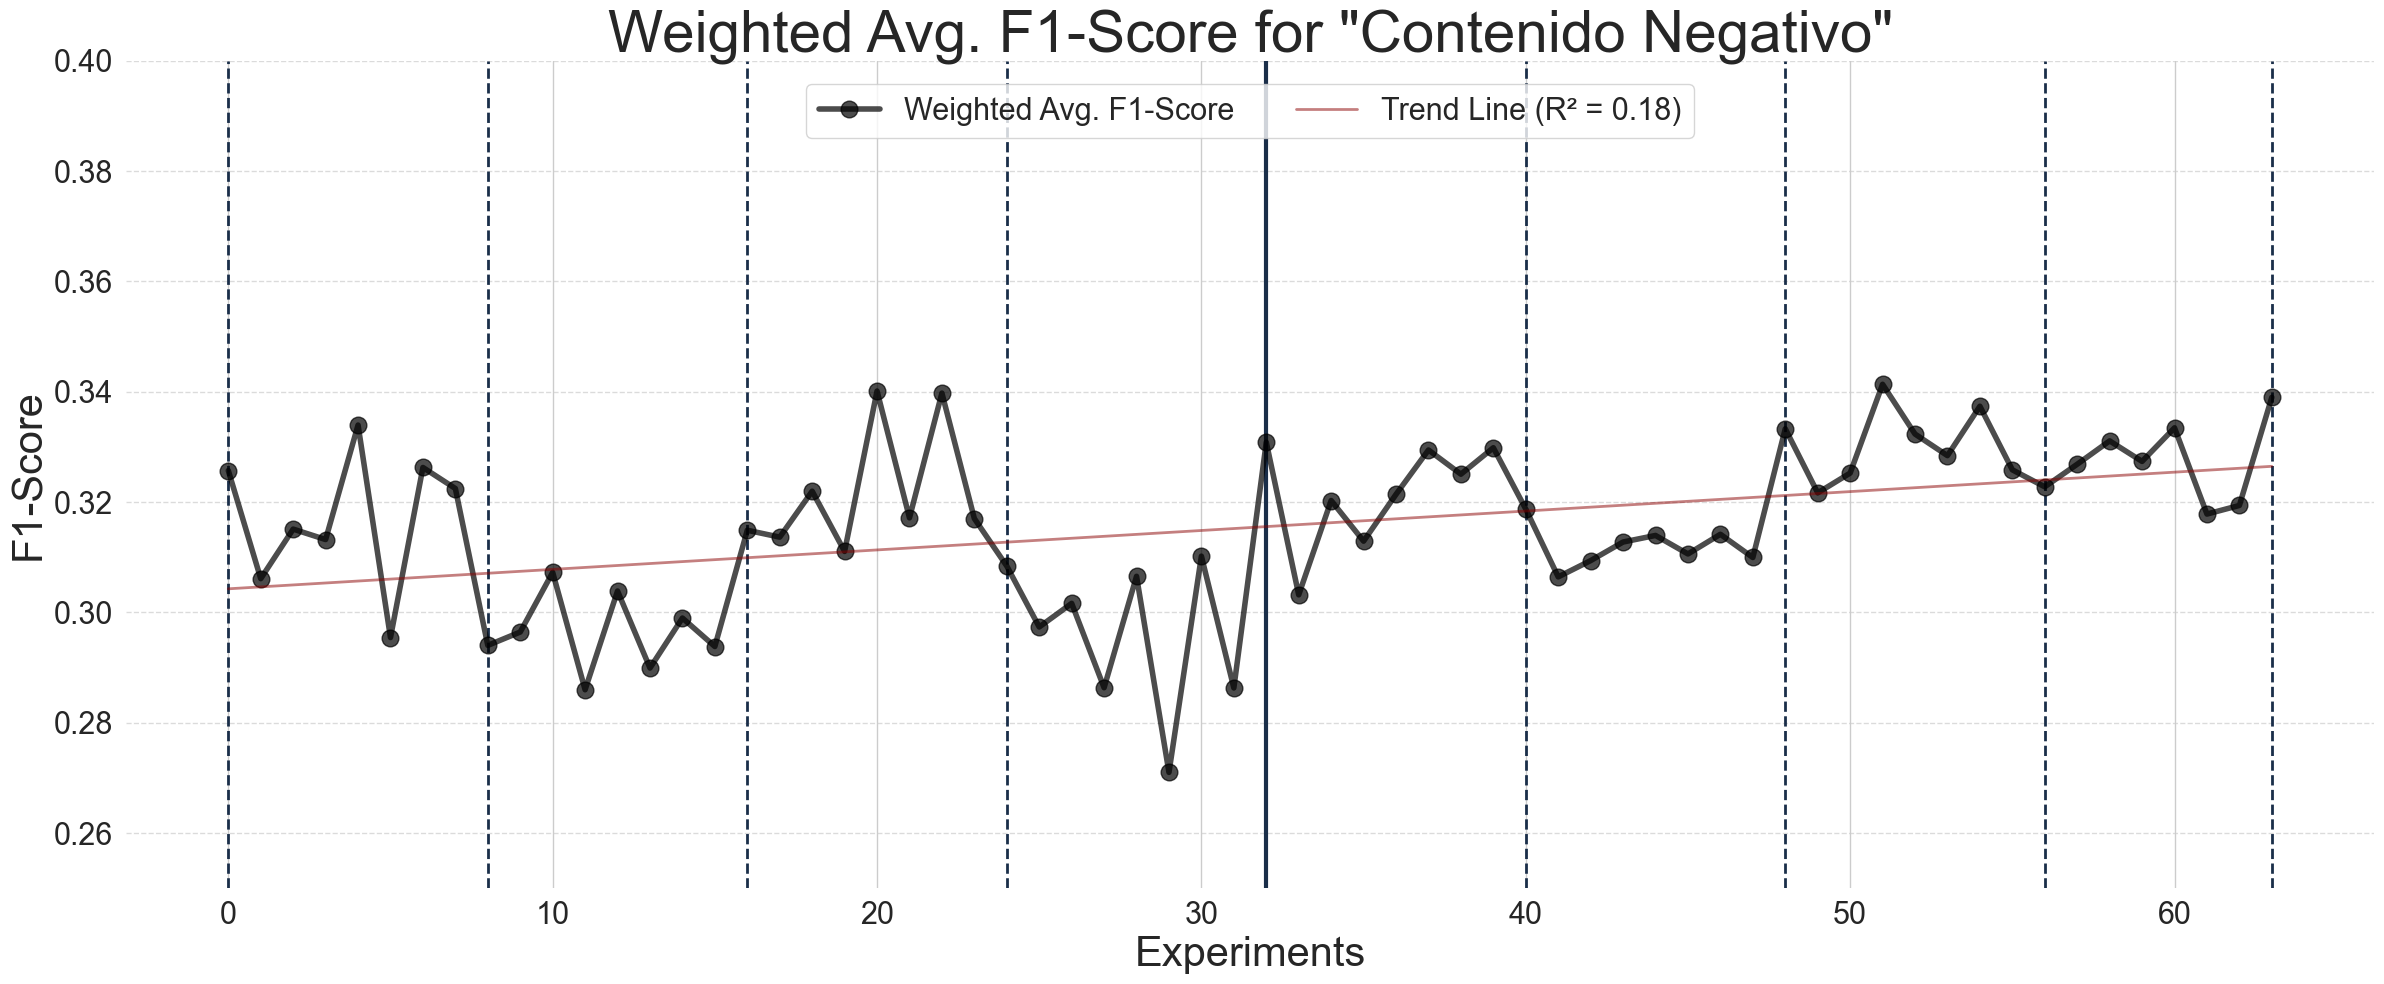

In [242]:
plt.figure(figsize=(24, 10))


# Add a vertical line for best window
for date, index in zip(specific_dates, specific_indices):
    if index in [32]:
        plt.axvline(x=index, color='#1a2e49', linestyle='-', linewidth=3)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(cnegativo_df.index, cnegativo_df['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=12, color='black', alpha=0.7, label='Weighted Avg. F1-Score')


# Calculate and plot trend line
slope, intercept, r_value, p_value, std_err = linregress(cnegativo_df.index, cnegativo_df['weighted avg_f1-score'])
trend = intercept + slope * cnegativo_df.index
plt.plot(cnegativo_df.index, trend, linewidth=2, color='darkred', linestyle='-', alpha=0.5, label=f'Trend Line (R² = {r_value**2:.2f})')


# Move legend to the top
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=2, fontsize=22)


# Setting labels and title
plt.title('Weighted Avg. F1-Score for "Contenido Negativo"', fontsize=42)
plt.xlabel('Experiments', fontsize=30)
plt.ylabel('F1-Score', fontsize=30)
plt.gca().set_ylim(0.25, 0.40)
plt.gca().tick_params(axis='x', labelsize=22)
plt.gca().tick_params(axis='y', labelsize=22)

# Add a grid to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Remove spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Contenido Negativo/GenAI/GenAI_Experiments in _ContenidoNegativo_ weighted.pdf", format='pdf')

plt.show()

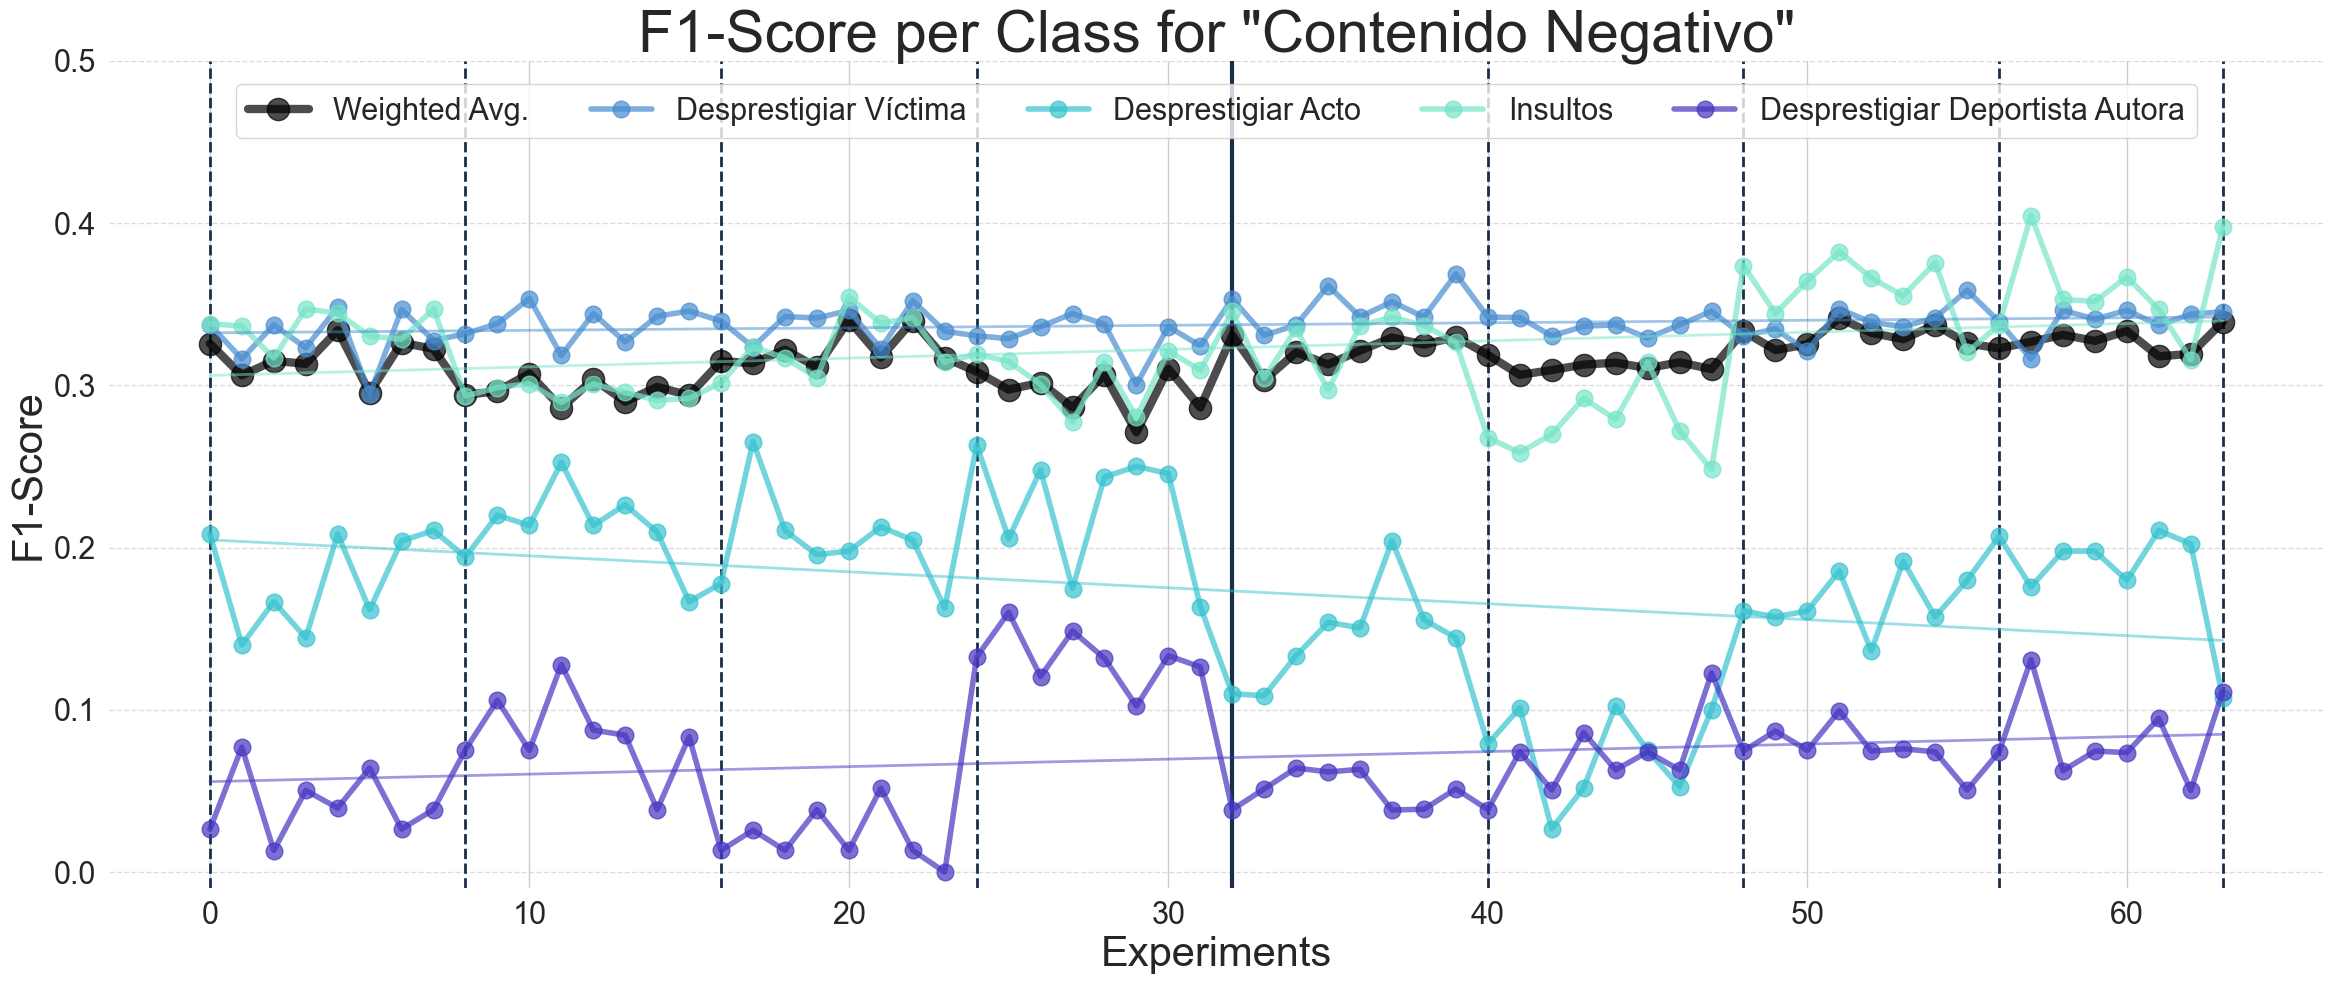

In [243]:
plt.figure(figsize=(24, 10))

# Add a vertical line for best window
for date, index in zip(specific_dates, specific_indices):
    if index in [32]:
        plt.axvline(x=index, color='#1a2e49', linestyle='-', linewidth=3)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(cnegativo_df.index, cnegativo_df['weighted avg_f1-score'], linewidth=6, linestyle='-', marker='o', markersize=16, color='black', alpha=0.7, label="Weighted Avg.")
for i, label in enumerate(labels):
    plt.plot(cnegativo_df.index, cnegativo_df[f'{label}_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=12, color=colors[i], alpha=0.7, label=label)


# Calculate and plot trend line
for i in range(len(labels)):
    slope, intercept, r_value, p_value, std_err = linregress(cnegativo_df.index, cnegativo_df[f'{labels[i]}_f1-score'])
    trend = intercept + slope * cnegativo_df.index
    plt.plot(cnegativo_df.index, trend, linewidth=2, color=colors[i], linestyle='-', alpha=0.5)

# Move legend to the top
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=5, fontsize=22)


# Setting labels and title
plt.title('F1-Score per Class for "Contenido Negativo"', fontsize=42)
plt.xlabel('Experiments', fontsize=30)
plt.ylabel('F1-Score', fontsize=30)
plt.gca().set_ylim(-0.01, 0.5)
plt.gca().tick_params(axis='x', labelsize=22)
plt.gca().tick_params(axis='y', labelsize=22)

# Add a grid to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Remove spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Contenido Negativo/GenAI/GenAI_Experiments in _ContenidoNegativo_f1score.pdf", format='pdf')

plt.show()

### Performance (Time)

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\1916530453.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, x='Prompt', y='Time (s)', hue='Model', data=cnegativo_df, palette='Blues', alpha=0.7, ci=None)


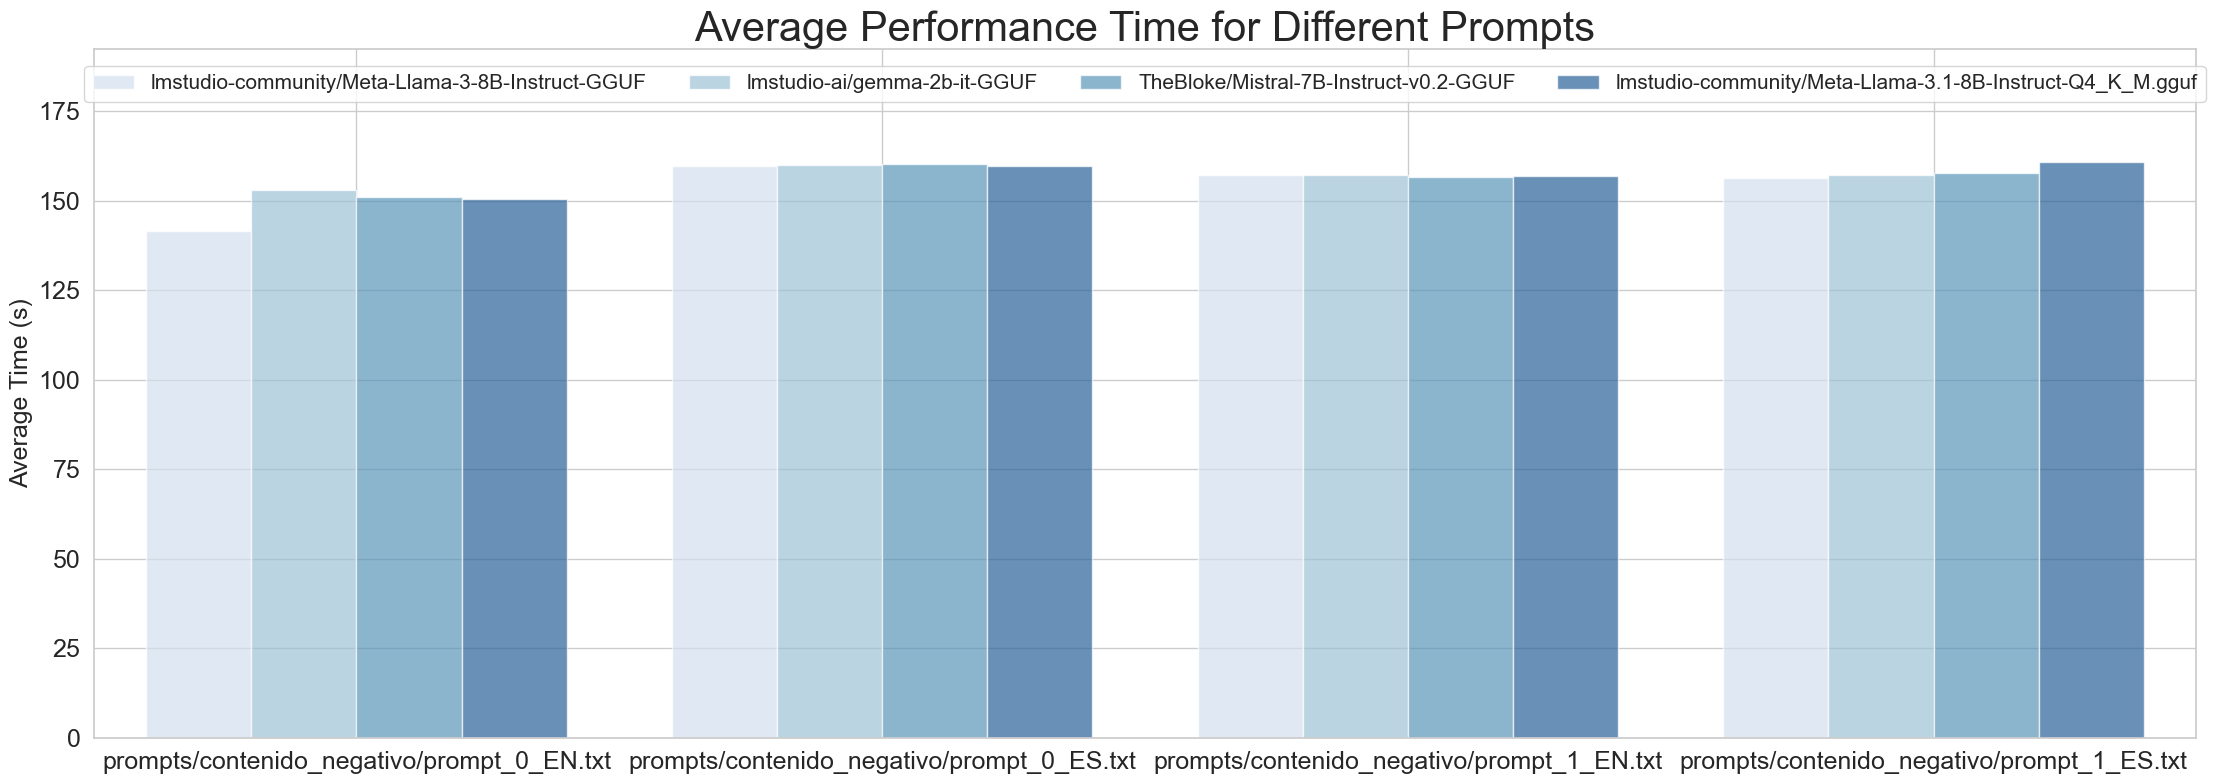

In [244]:
# Set Seaborn style
from matplotlib.gridspec import GridSpec

sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = cnegativo_df['Time (s)'].mean() + 4 * cnegativo_df['Time (s)'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Prompt', y='Time (s)', hue='Model', data=cnegativo_df, palette='Blues', alpha=0.7, ci=None)
ax1.set_title('Average Performance Time for Different Prompts', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('Average Time (s)', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4, fontsize=15)


# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\4163056021.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, x='Context', y='Time (s)', hue='Model', data=cnegativo_df, palette='Blues', alpha=0.7, ci=None)


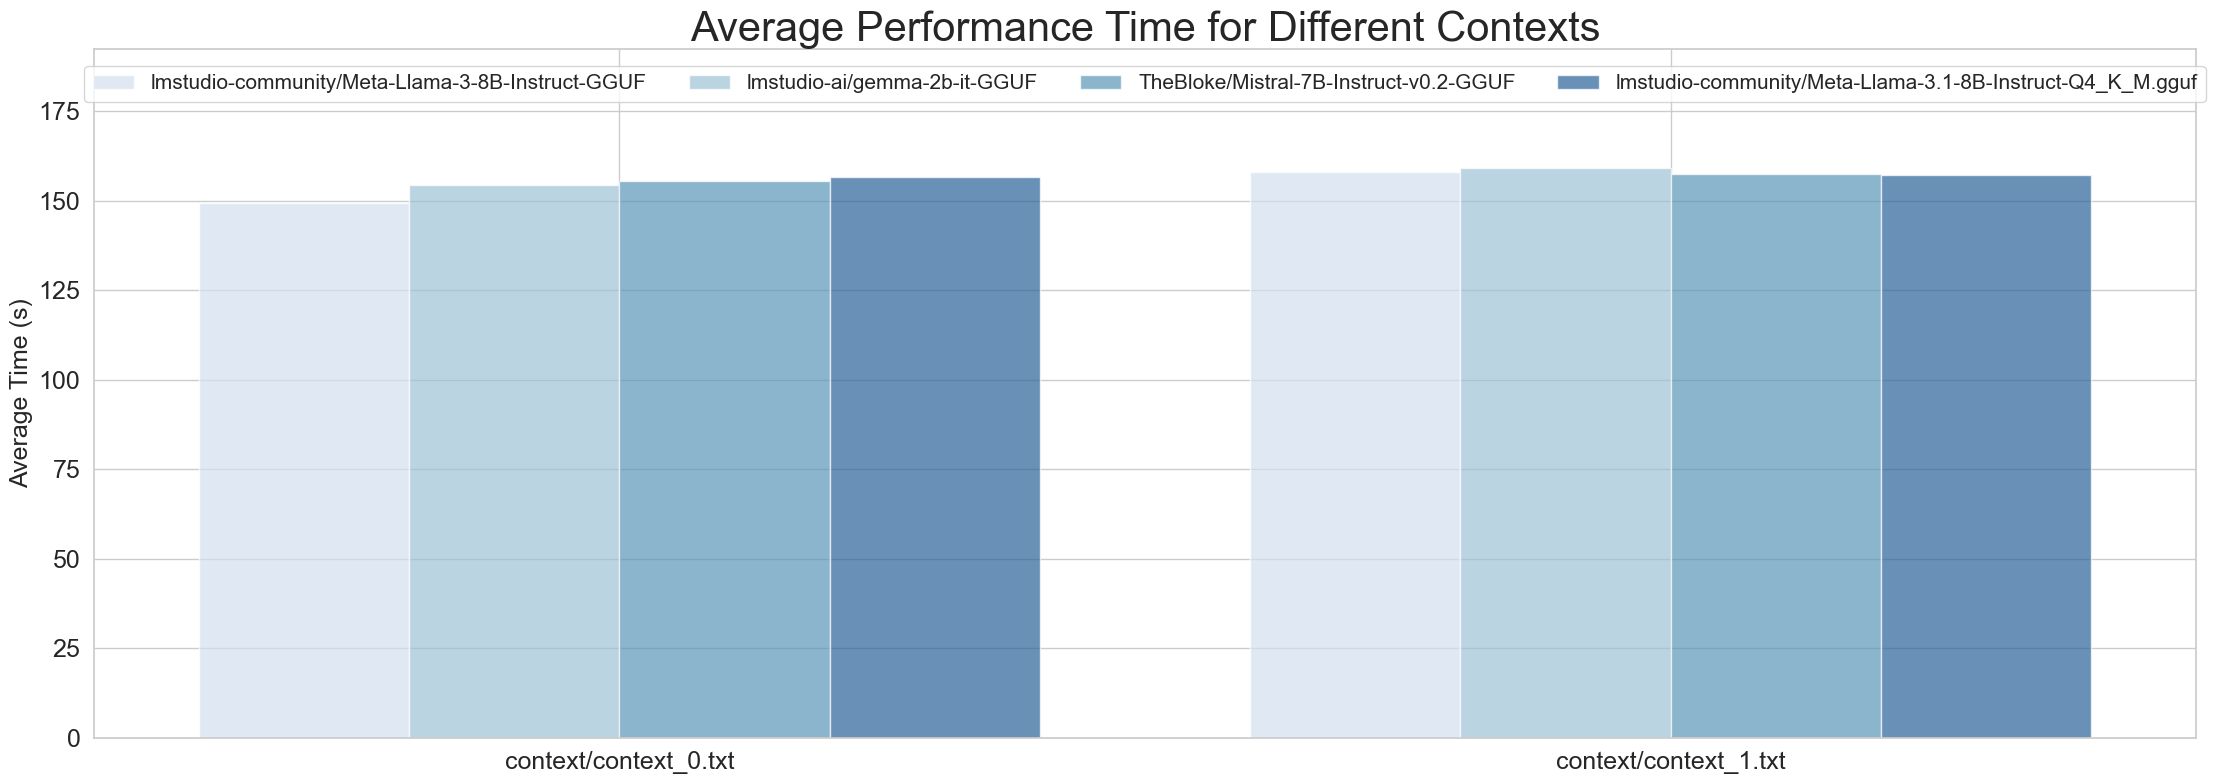

In [245]:
# Set Seaborn style
from matplotlib.gridspec import GridSpec

sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = cnegativo_df['Time (s)'].mean() + 4 * cnegativo_df['Time (s)'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Context', y='Time (s)', hue='Model', data=cnegativo_df, palette='Blues', alpha=0.7, ci=None)
ax1.set_title('Average Performance Time for Different Contexts', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('Average Time (s)', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=5, fontsize=15)


# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

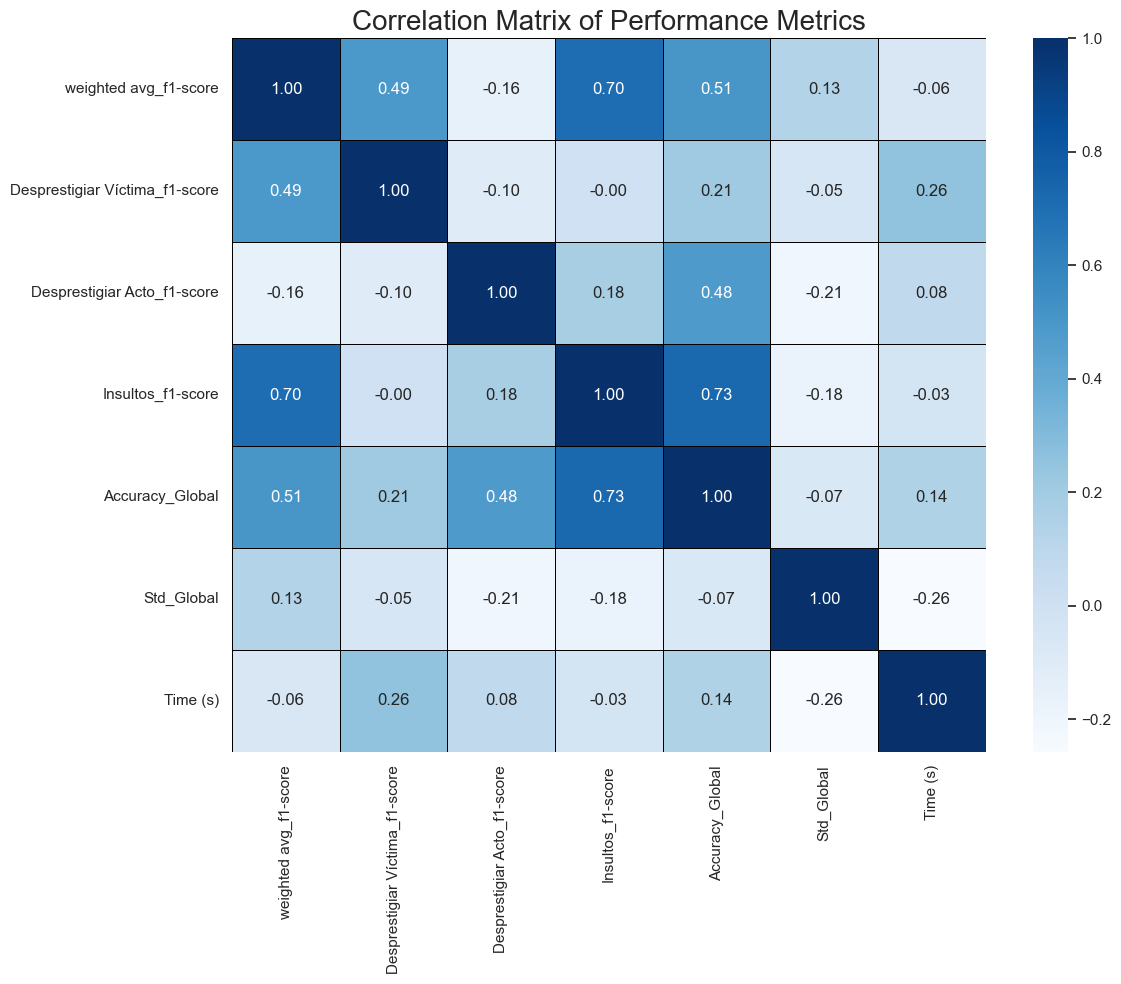

In [246]:
# Calculate the correlation matrix
correlation_matrix = cnegativo_df[['weighted avg_f1-score', f'{labels[0]}_f1-score', f'{labels[1]}_f1-score', f'{labels[2]}_f1-score', 'Accuracy_Global', 'Std_Global','Time (s)']].corr()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, linecolor='black')

# Set title and labels
plt.title('Correlation Matrix of Performance Metrics', fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()


### Confussion Matrix - Best Model

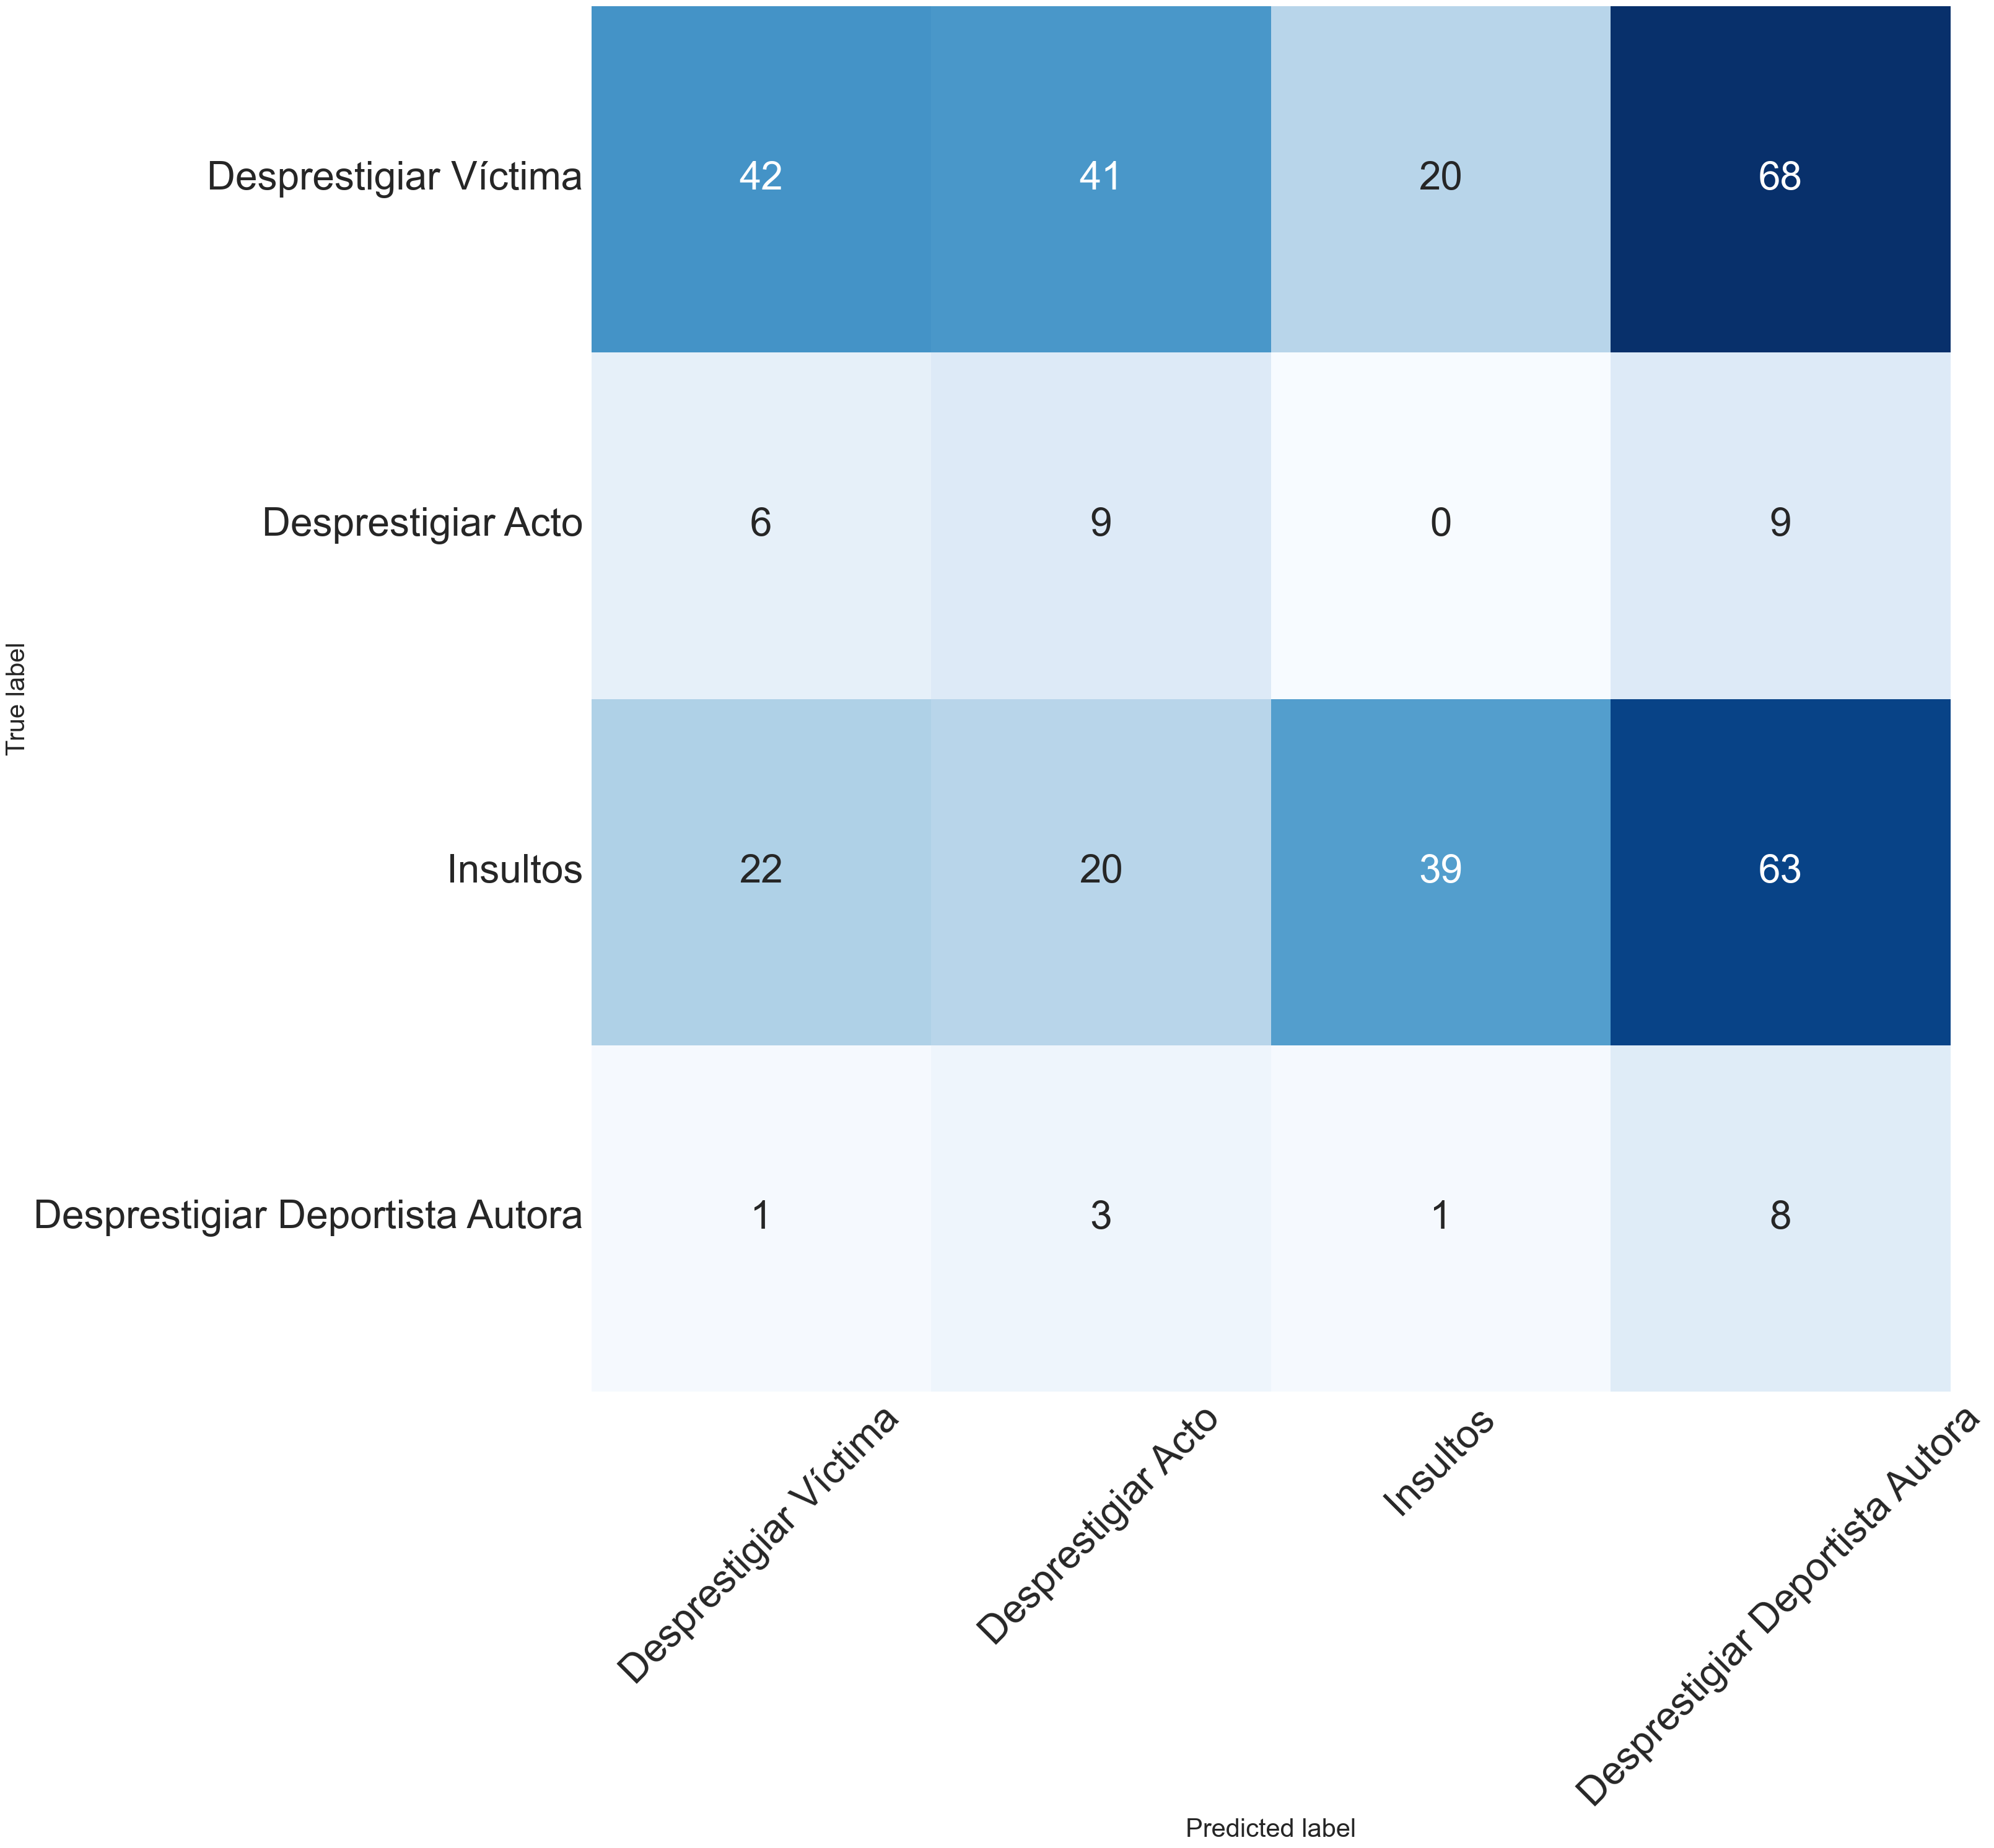

In [247]:
from sklearn.metrics import confusion_matrix

# Datos de la matriz de confusión para el modelo '1f8f1a43-c705-4c45-8894-7ed7f610917c'
y_true = ['Desprestigiar Víctima'] * 171 + ['Desprestigiar Acto'] * 24 + ['Insultos'] * 144 + ['Desprestigiar Deportista Autora'] * 13
y_pred = [
    'Desprestigiar Víctima'] * 42 + ['Desprestigiar Acto'] * 41 + ['Insultos'] * 20 + ['Desprestigiar Deportista Autora'] * 68 + \
    ['Desprestigiar Víctima'] * 6 + ['Desprestigiar Acto'] * 9 + ['Insultos'] * 0 + ['Desprestigiar Deportista Autora'] * 9 + \
    ['Desprestigiar Víctima'] * 22 + ['Desprestigiar Acto'] * 20 + ['Insultos'] * 39 + ['Desprestigiar Deportista Autora'] * 63 + \
    ['Desprestigiar Víctima'] * 1 + ['Desprestigiar Acto'] * 3 + ['Insultos'] * 1 + ['Desprestigiar Deportista Autora'] * 8


# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plotear la matriz de confusión
plt.figure(figsize=(32, 30))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, 
            yticklabels=labels, annot_kws={"size": 46}, cbar=False)

plt.xlabel('Predicted label', fontsize=30)
plt.ylabel('True label', fontsize=30)
plt.xticks(rotation=45, fontsize=46)
plt.yticks(rotation=0, fontsize=46)
# plt.title('Confusion Matrix for Best Model of ML Experiments')

plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Contenido Negativo/GenAI/GenAI_Experiments in _ContenidoNegativo_ best_model.pdf", format='pdf')

plt.show()


## Insultos

In [248]:
# Define the list of labels and colors
labels = ['Sexistas/misóginos', 'Genéricos', 'Deseo de Dañar']
colors = ['#FFAF45', '#FB6D48', '#D74B76']

In [249]:
# Filter dataset for "Insultos"
insultos_df = df[df["Type"] == "insultos"]
len(insultos_df)

64

In [250]:
# Rename columns to categorical: {'Sexistas/misóginos': 0, 'Genéricos': 1, 'Deseo de Dañar': 2}
mapping = {'Sexistas/misóginos': 0, 'Genéricos': 1, 'Deseo de Dañar': 2}

# Create a dictionary for renaming
rename_dict = {}
for key, value in mapping.items():
    rename_dict[f'{value}_precision'] = f'{key}_precision'
    rename_dict[f'{value}_recall'] = f'{key}_recall'
    rename_dict[f'{value}_f1-score'] = f'{key}_f1-score'
    rename_dict[f'{value}_support'] = f'{key}_support'

# Rename the columns
insultos_df.rename(columns=rename_dict, inplace=True)

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\2416104541.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insultos_df.rename(columns=rename_dict, inplace=True)


### Windows

In [251]:
# Convert 'Timestamp' column to datetime if it's not already
insultos_df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort the DataFrame by 'Timestamp' if needed
insultos_df.sort_values('Timestamp', inplace=True)

# Resetting the index to ensure it's sequential
insultos_df.reset_index(drop=True, inplace=True)

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\725712016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insultos_df['Timestamp'] = pd.to_datetime(df['Timestamp'])
C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\725712016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insultos_df.sort_values('Timestamp', inplace=True)


In [252]:
# Numeric columns
numeric_cols = ['Accuracy_Global', 'Std_Global', 'Time (s)', 'weighted avg_precision', 'weighted avg_recall', 'weighted avg_f1-score', f'{labels[0]}_f1-score', f'{labels[1]}_f1-score', f'{labels[2]}_f1-score']

# Agrupar el DataFrame por context
df_grouped_context = insultos_df.groupby(['Context'])[numeric_cols].mean().reset_index()

df_grouped_context


Context  Accuracy_Global  Std_Global   Time (s)  \
0  context/context_0.txt         0.474767    0.104462  91.232304   
1  context/context_1.txt         0.469205    0.109559  93.075070   

   weighted avg_precision  weighted avg_recall  weighted avg_f1-score  \
0                0.703316             0.474767               0.548394   
1                0.668030             0.469205               0.536752   

   Sexistas/misóginos_f1-score  Genéricos_f1-score  Deseo de Dañar_f1-score  
0                     0.261405            0.628917                 0.124542  
1                     0.308694            0.623395                 0.096289

In [253]:
# Numeric columns
numeric_cols = ['Accuracy_Global', 'Std_Global', 'Time (s)', 'weighted avg_precision', 'weighted avg_recall', 'weighted avg_f1-score', f'{labels[0]}_f1-score', f'{labels[1]}_f1-score', f'{labels[2]}_f1-score']

# Agrupar el DataFrame por prompt
df_grouped_prompt = insultos_df.groupby(['Prompt'])[numeric_cols].mean().reset_index()

df_grouped_prompt


Prompt  Accuracy_Global  Std_Global   Time (s)  \
0  prompts/insultos/prompt_0_EN.txt         0.493932    0.075916  90.481787   
1  prompts/insultos/prompt_0_ES.txt         0.450198    0.113201  92.770891   
2  prompts/insultos/prompt_1_EN.txt         0.471282    0.106262  93.544384   
3  prompts/insultos/prompt_1_ES.txt         0.472533    0.132663  91.817686   

   weighted avg_precision  weighted avg_recall  weighted avg_f1-score  \
0                0.797629             0.493932               0.589968   
1                0.585203             0.450198               0.498574   
2                0.725184             0.471282               0.552007   
3                0.634675             0.472533               0.529743   

   Sexistas/misóginos_f1-score  Genéricos_f1-score  Deseo de Dañar_f1-score  
0                     0.248107            0.649090                 0.088766  
1                     0.347055            0.594165                 0.115962  
2                     0.194433            0.634539                 0.132513  
3                     0.350603            0.626830                 0.104420

In [254]:
# Numeric columns
numeric_cols = ['Accuracy_Global', 'Std_Global', 'Time (s)', 'weighted avg_precision', 'weighted avg_recall', 'weighted avg_f1-score', f'{labels[0]}_f1-score', f'{labels[1]}_f1-score', f'{labels[2]}_f1-score']

# Agrupar el DataFrame por prompt
df_grouped_prompt = insultos_df.groupby(['Context', 'Prompt'])[numeric_cols].mean().reset_index()

df_grouped_prompt


Context                            Prompt  Accuracy_Global  \
0  context/context_0.txt  prompts/insultos/prompt_0_EN.txt         0.486650   
1  context/context_0.txt  prompts/insultos/prompt_0_ES.txt         0.465930   
2  context/context_0.txt  prompts/insultos/prompt_1_EN.txt         0.466229   
3  context/context_0.txt  prompts/insultos/prompt_1_ES.txt         0.480260   
4  context/context_1.txt  prompts/insultos/prompt_0_EN.txt         0.501214   
5  context/context_1.txt  prompts/insultos/prompt_0_ES.txt         0.434466   
6  context/context_1.txt  prompts/insultos/prompt_1_EN.txt         0.476335   
7  context/context_1.txt  prompts/insultos/prompt_1_ES.txt         0.464806   

   Std_Global   Time (s)  weighted avg_precision  weighted avg_recall  \
0    0.086776  85.778044                0.817833             0.486650   
1    0.098117  97.133264                0.627099             0.465930   
2    0.102991  92.310660                0.751401             0.466229   
3    0.129965  89.707246                0.616929             0.480260   
4    0.065057  95.185529                0.777424             0.501214   
5    0.128285  88.408518                0.543307             0.434466   
6    0.109532  94.778108                0.698967             0.476335   
7    0.135362  93.928126                0.652420             0.464806   

   weighted avg_f1-score  Sexistas/misóginos_f1-score  Genéricos_f1-score  \
0               0.589026                     0.175311            0.644744   
1               0.519549                     0.331488            0.609794   
2               0.556977                     0.167204            0.628912   
3               0.528025                     0.371615            0.632216   
4               0.590911                     0.320903            0.653435   
5               0.477600                     0.362622            0.578536   
6               0.547037                     0.221662            0.640165   
7               0.531461                     0.329590            0.621444   

   Deseo de Dañar_f1-score  
0                 0.108126  
1                 0.139596  
2                 0.111507  
3                 0.138939  
4                 0.069406  
5                 0.092328  
6                 0.153520  
7                 0.069901

#### F1-Score

In [255]:
# List of specific dates for vertical lines
specific_dates = ['2024-08-10 22:17:29', '2024-08-10 22:28:59', '2024-08-10 22:41:58', '2024-08-10 22:54:20', '2024-08-10 23:06:20', '2024-08-10 23:19:04', '2024-08-10 23:30:54', '2024-08-10 23:43:35', '2024-08-10 23:54:36']
specific_dates = pd.to_datetime(specific_dates)  # Convert to datetime if not already

# Find the indices of the specific dates in the DataFrame
specific_indices = insultos_df[insultos_df['Timestamp'].isin(specific_dates)].index.tolist()
specific_indices

[0, 8, 16, 24, 32, 40, 48, 56, 63]

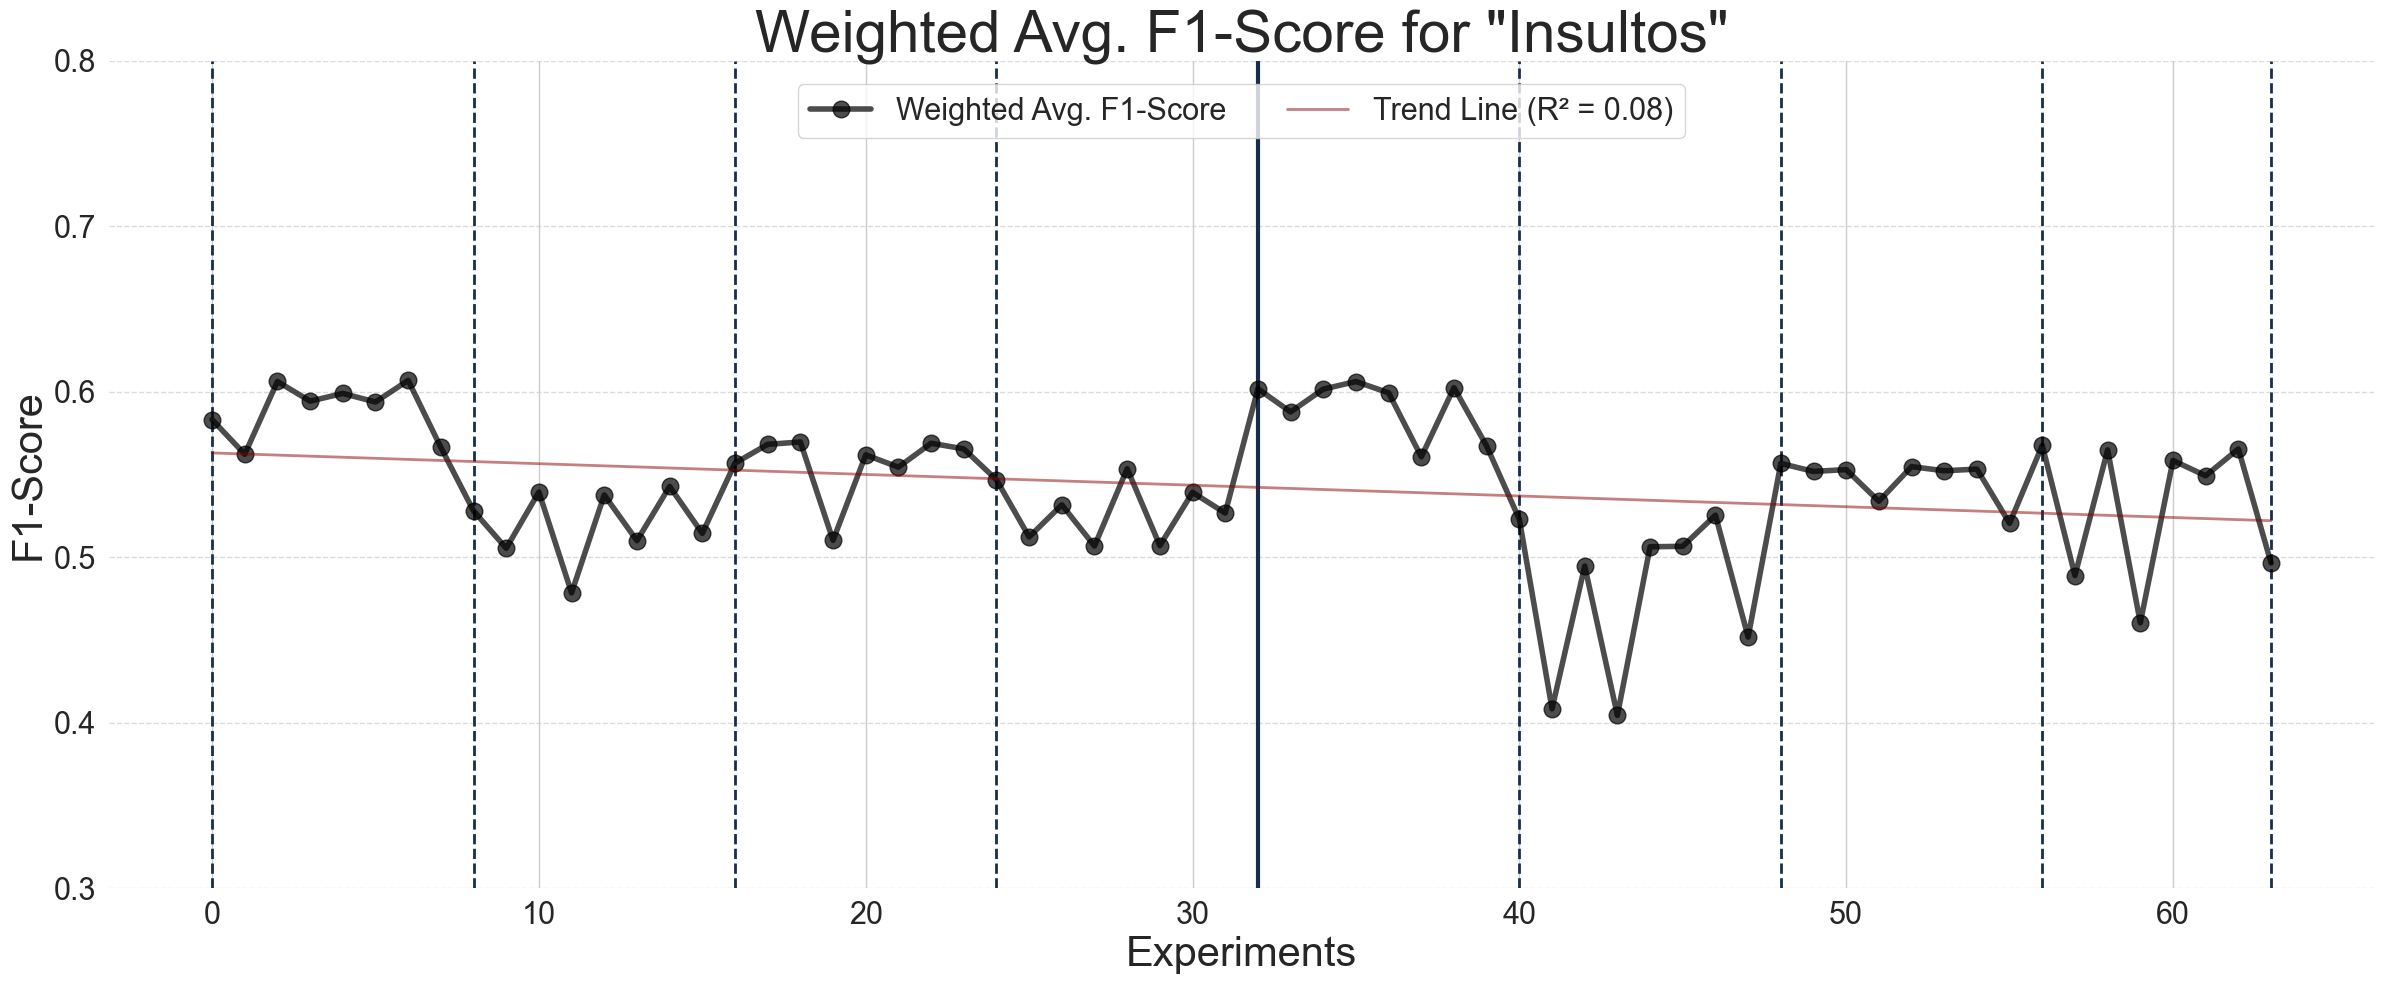

In [264]:
plt.figure(figsize=(24, 10))


# Add a vertical line for best window
for date, index in zip(specific_dates, specific_indices):
    if index in [32]:
        plt.axvline(x=index, color='#1a2e49', linestyle='-', linewidth=3)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(insultos_df.index, insultos_df['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=12, color='black', alpha=0.7, label='Weighted Avg. F1-Score')


# Calculate and plot trend line
slope, intercept, r_value, p_value, std_err = linregress(insultos_df.index, insultos_df['weighted avg_f1-score'])
trend = intercept + slope * insultos_df.index
plt.plot(insultos_df.index, trend, linewidth=2, color='darkred', linestyle='-', alpha=0.5, label=f'Trend Line (R² = {r_value**2:.2f})')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=2, fontsize=22)


# Setting labels and title
plt.title('Weighted Avg. F1-Score for "Insultos"', fontsize=42)
plt.xlabel('Experiments', fontsize=30)
plt.ylabel('F1-Score', fontsize=30)
plt.gca().set_ylim(0.3, 0.8)
plt.gca().tick_params(axis='x', labelsize=22)
plt.gca().tick_params(axis='y', labelsize=22)

# Add a grid to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Remove spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Insultos/GenAI/GenAI_Experiments in _Insultos_ weighted.pdf", format='pdf')

plt.show()


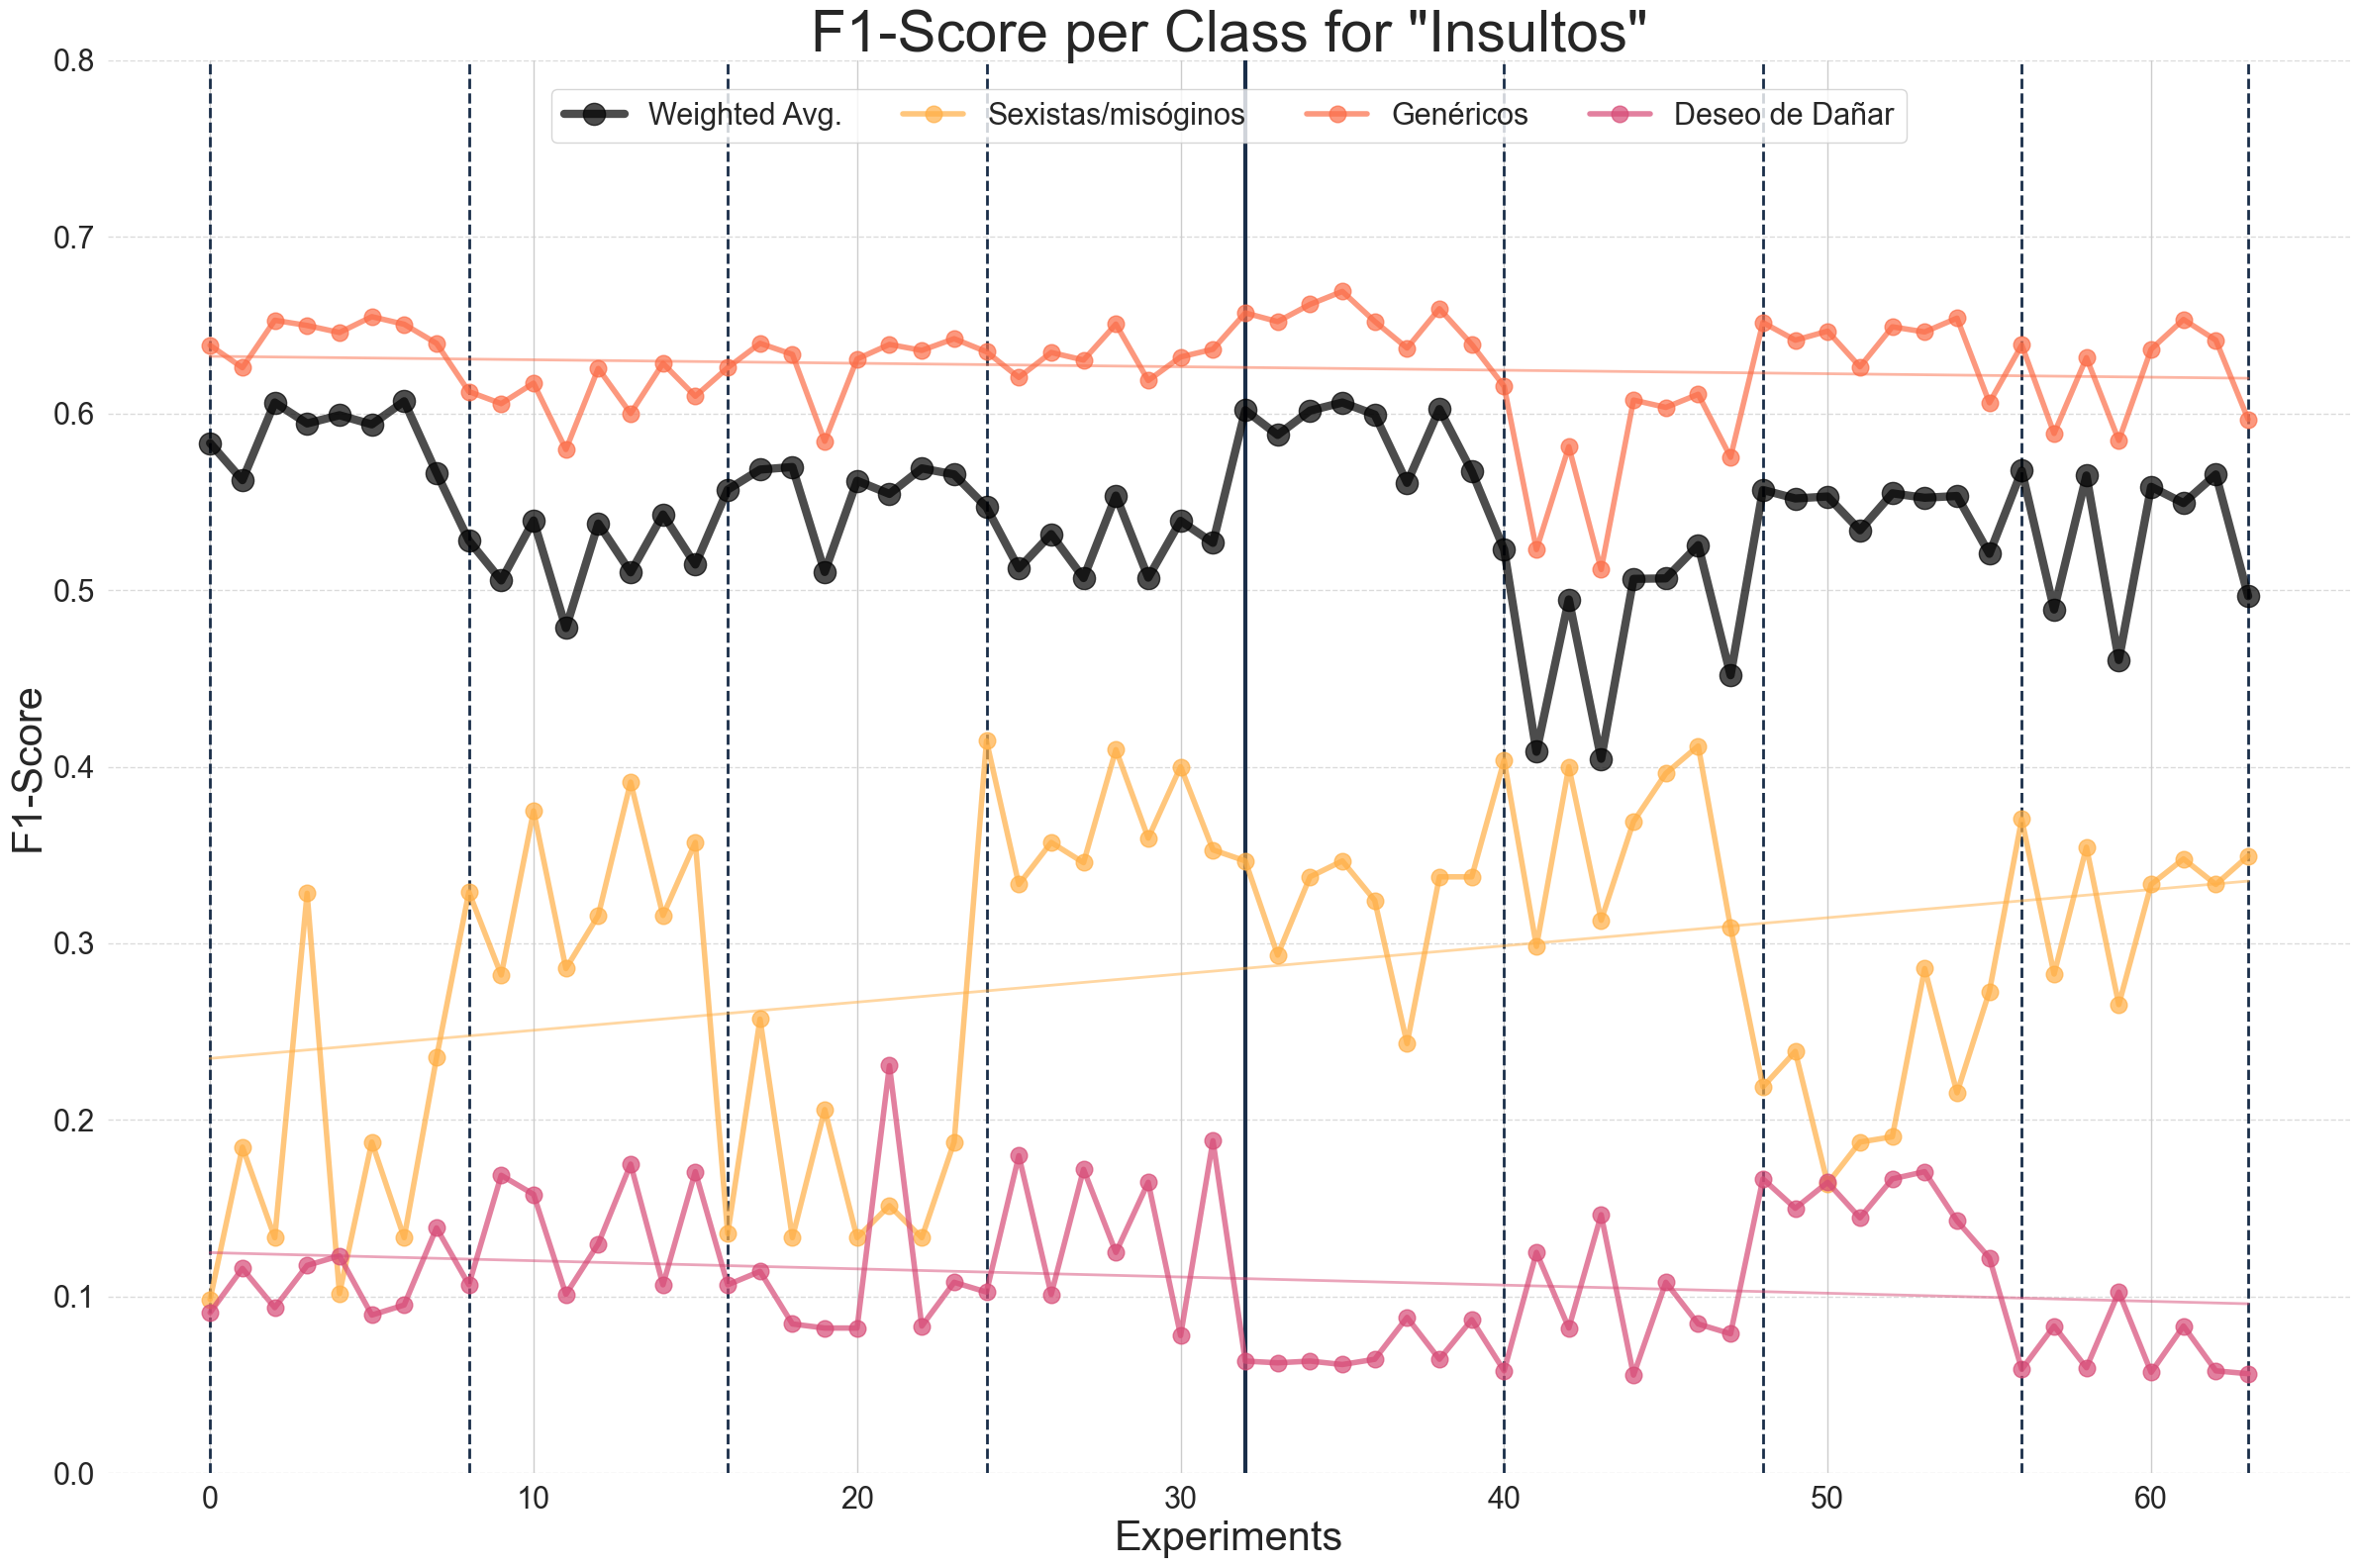

In [265]:
plt.figure(figsize=(24, 16))

# Add a vertical line for best window
for date, index in zip(specific_dates, specific_indices):
    if index in [32]:
        plt.axvline(x=index, color='#1a2e49', linestyle='-', linewidth=3)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(insultos_df.index, insultos_df['weighted avg_f1-score'], linewidth=6, linestyle='-', marker='o', markersize=16, color='black', alpha=0.7, label="Weighted Avg.")
for i, label in enumerate(labels):
    plt.plot(insultos_df.index, insultos_df[f'{label}_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=12, color=colors[i], alpha=0.7, label=label)


# Calculate and plot trend line
for i in range(len(labels)):
    slope, intercept, r_value, p_value, std_err = linregress(insultos_df.index, insultos_df[f'{labels[i]}_f1-score'])
    trend = intercept + slope * insultos_df.index
    plt.plot(insultos_df.index, trend, linewidth=2, color=colors[i], linestyle='-', alpha=0.5)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=5, fontsize=22)


# Setting labels and title
plt.title('F1-Score per Class for "Insultos"', fontsize=42)
plt.xlabel('Experiments', fontsize=30)
plt.ylabel('F1-Score', fontsize=30)
plt.gca().set_ylim(0, 0.8)
plt.gca().tick_params(axis='x', labelsize=22)
plt.gca().tick_params(axis='y', labelsize=22)

# Add a grid to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Remove spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Insultos/GenAI/GenAI_Experiments in _Insultos_f1score.pdf", format='pdf')

plt.show()


### Performance (Time)

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\54536277.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, x='Prompt', y='Time (s)', hue='Model', data=insultos_df, palette='flare', alpha=0.7, ci=None)


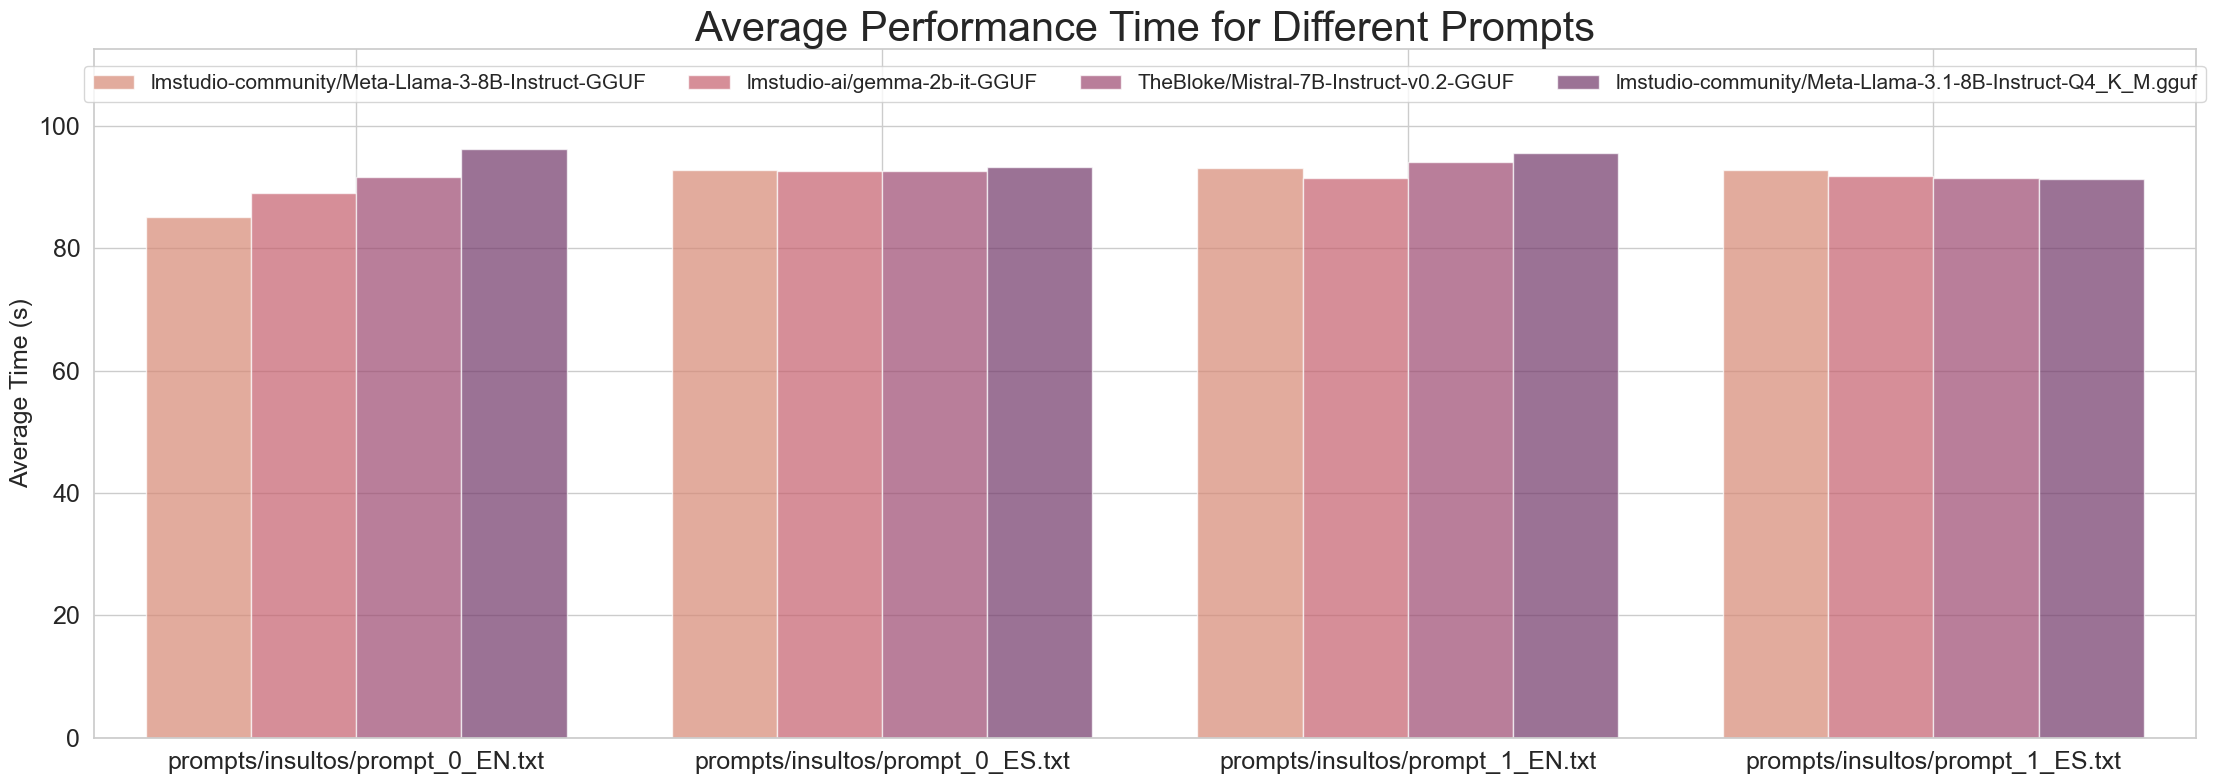

In [ ]:
# Set Seaborn style
from matplotlib.gridspec import GridSpec

sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = insultos_df['Time (s)'].mean() + 4 * insultos_df['Time (s)'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Prompt', y='Time (s)', hue='Model', data=insultos_df, palette='flare', alpha=0.7, ci=None)
ax1.set_title('Average Performance Time for Different Prompts', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('Average Time (s)', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4, fontsize=15)


# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\2174795986.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, x='Context', y='Time (s)', hue='Model', data=insultos_df, palette='flare', alpha=0.7, ci=None)


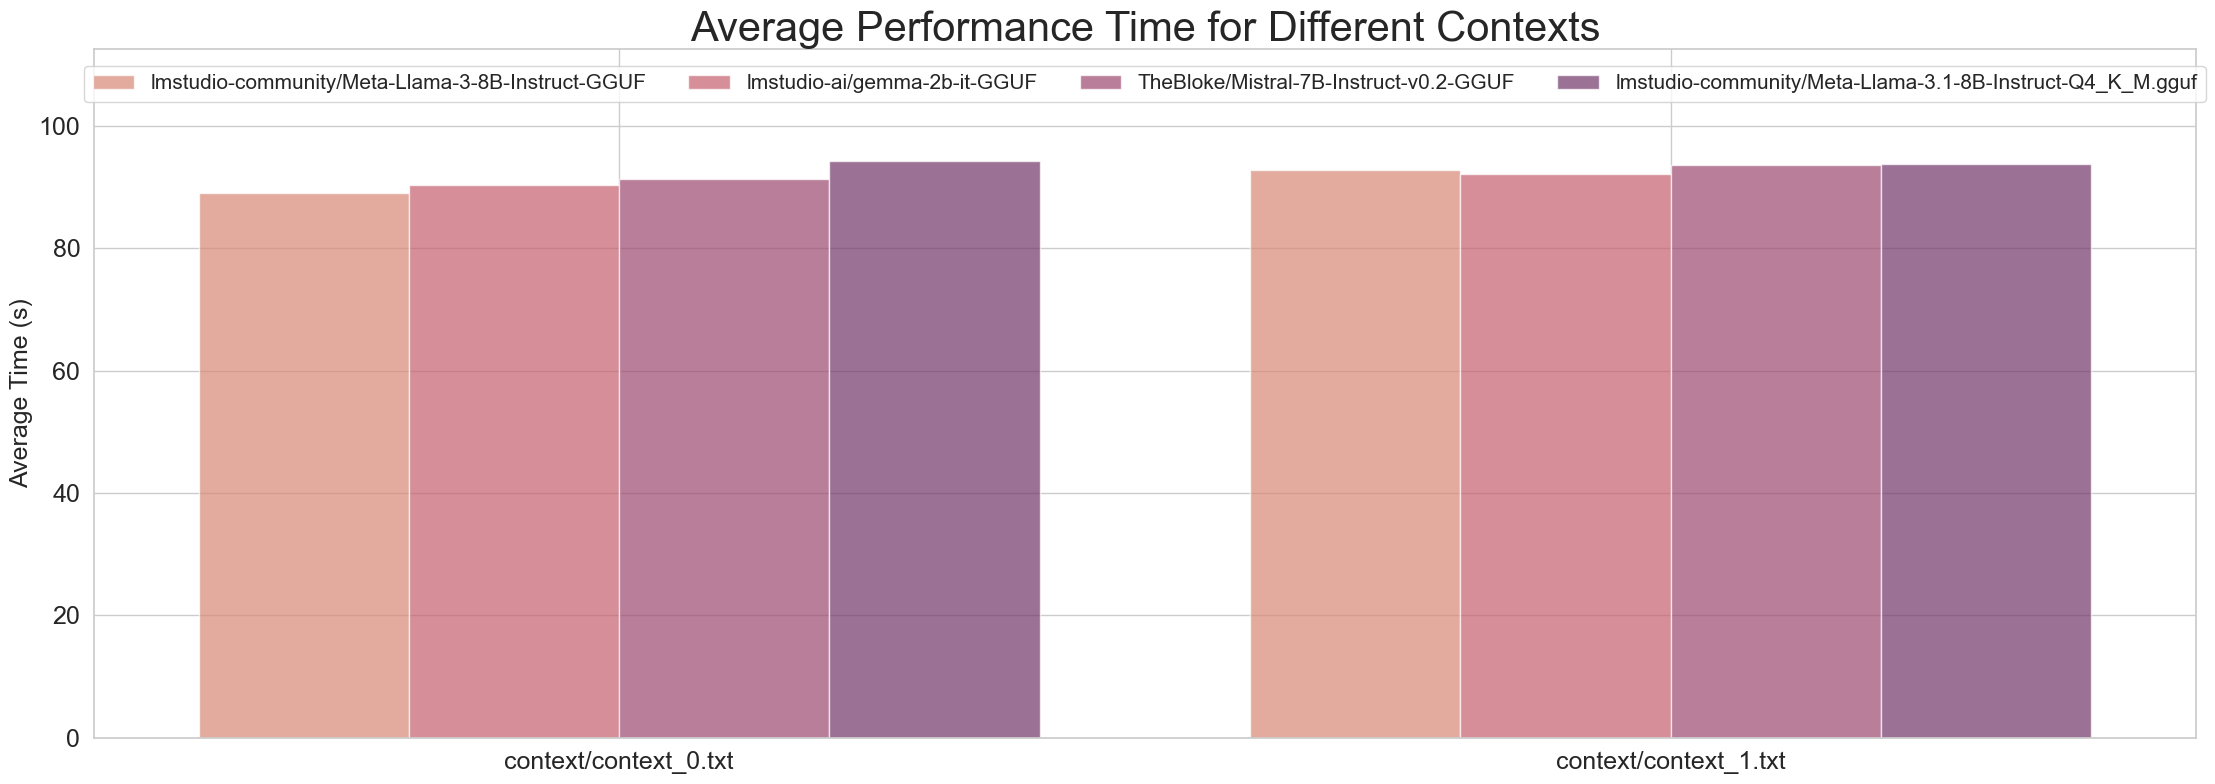

In [ ]:
# Set Seaborn style
from matplotlib.gridspec import GridSpec

sns.set(style="whitegrid")

# Calculate the upper limit for the y-axis dynamically
y_max = insultos_df['Time (s)'].mean() + 4 * insultos_df['Time (s)'].std()

# Create a figure with subplots using GridSpec
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 1, figure=fig)

# Plot for MODELS
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax1, x='Context', y='Time (s)', hue='Model', data=insultos_df, palette='flare', alpha=0.7, ci=None)
ax1.set_title('Average Performance Time for Different Contexts', fontsize=30)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('Average Time (s)', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, y_max)

# Move legend to the top
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=5, fontsize=15)


# Adding grid for better readability
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

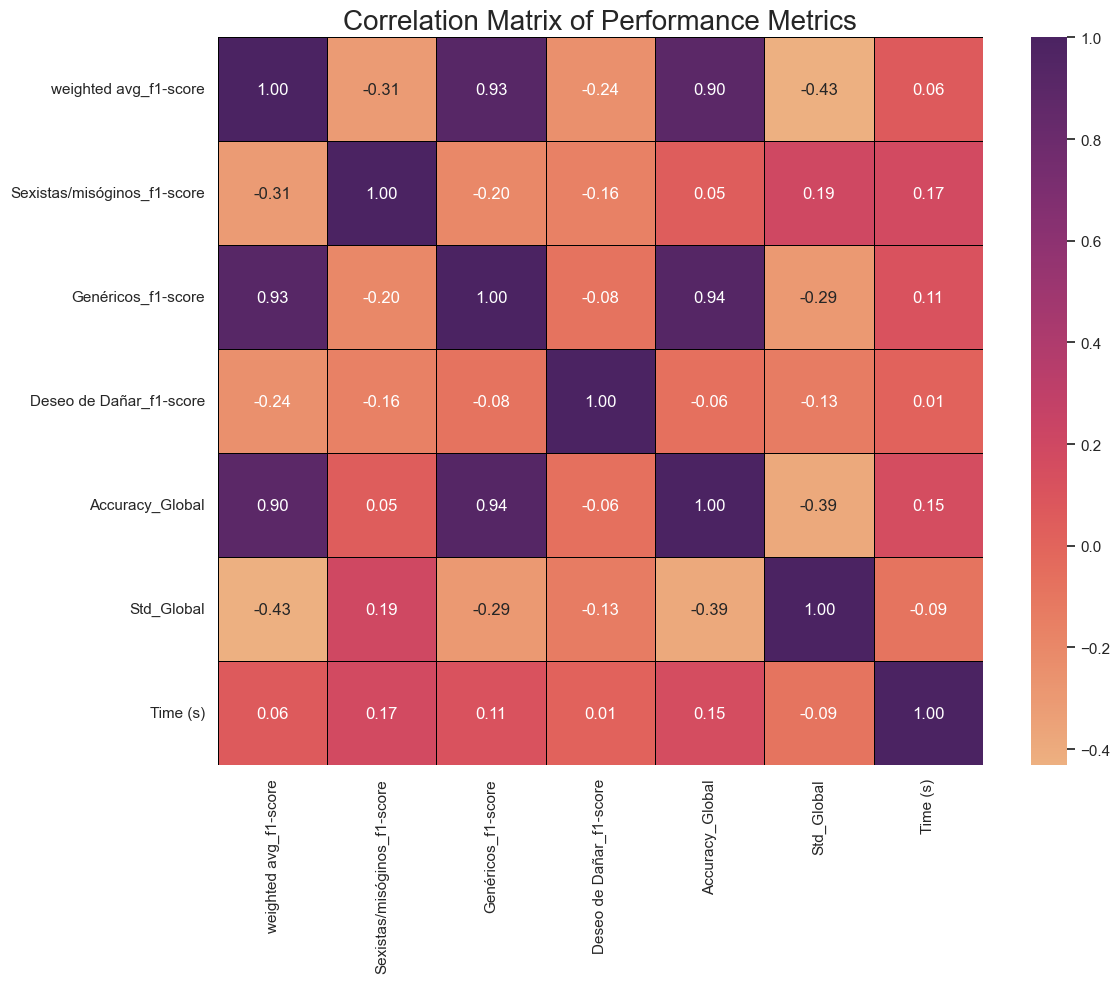

In [ ]:
# Calculate the correlation matrix
correlation_matrix = insultos_df[['weighted avg_f1-score', f'{labels[0]}_f1-score', f'{labels[1]}_f1-score', f'{labels[2]}_f1-score', 'Accuracy_Global', 'Std_Global','Time (s)']].corr()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt='.2f', linewidths=0.5, linecolor='black')

# Set title and labels
plt.title('Correlation Matrix of Performance Metrics', fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()


### Confussion Matrix - Best Model

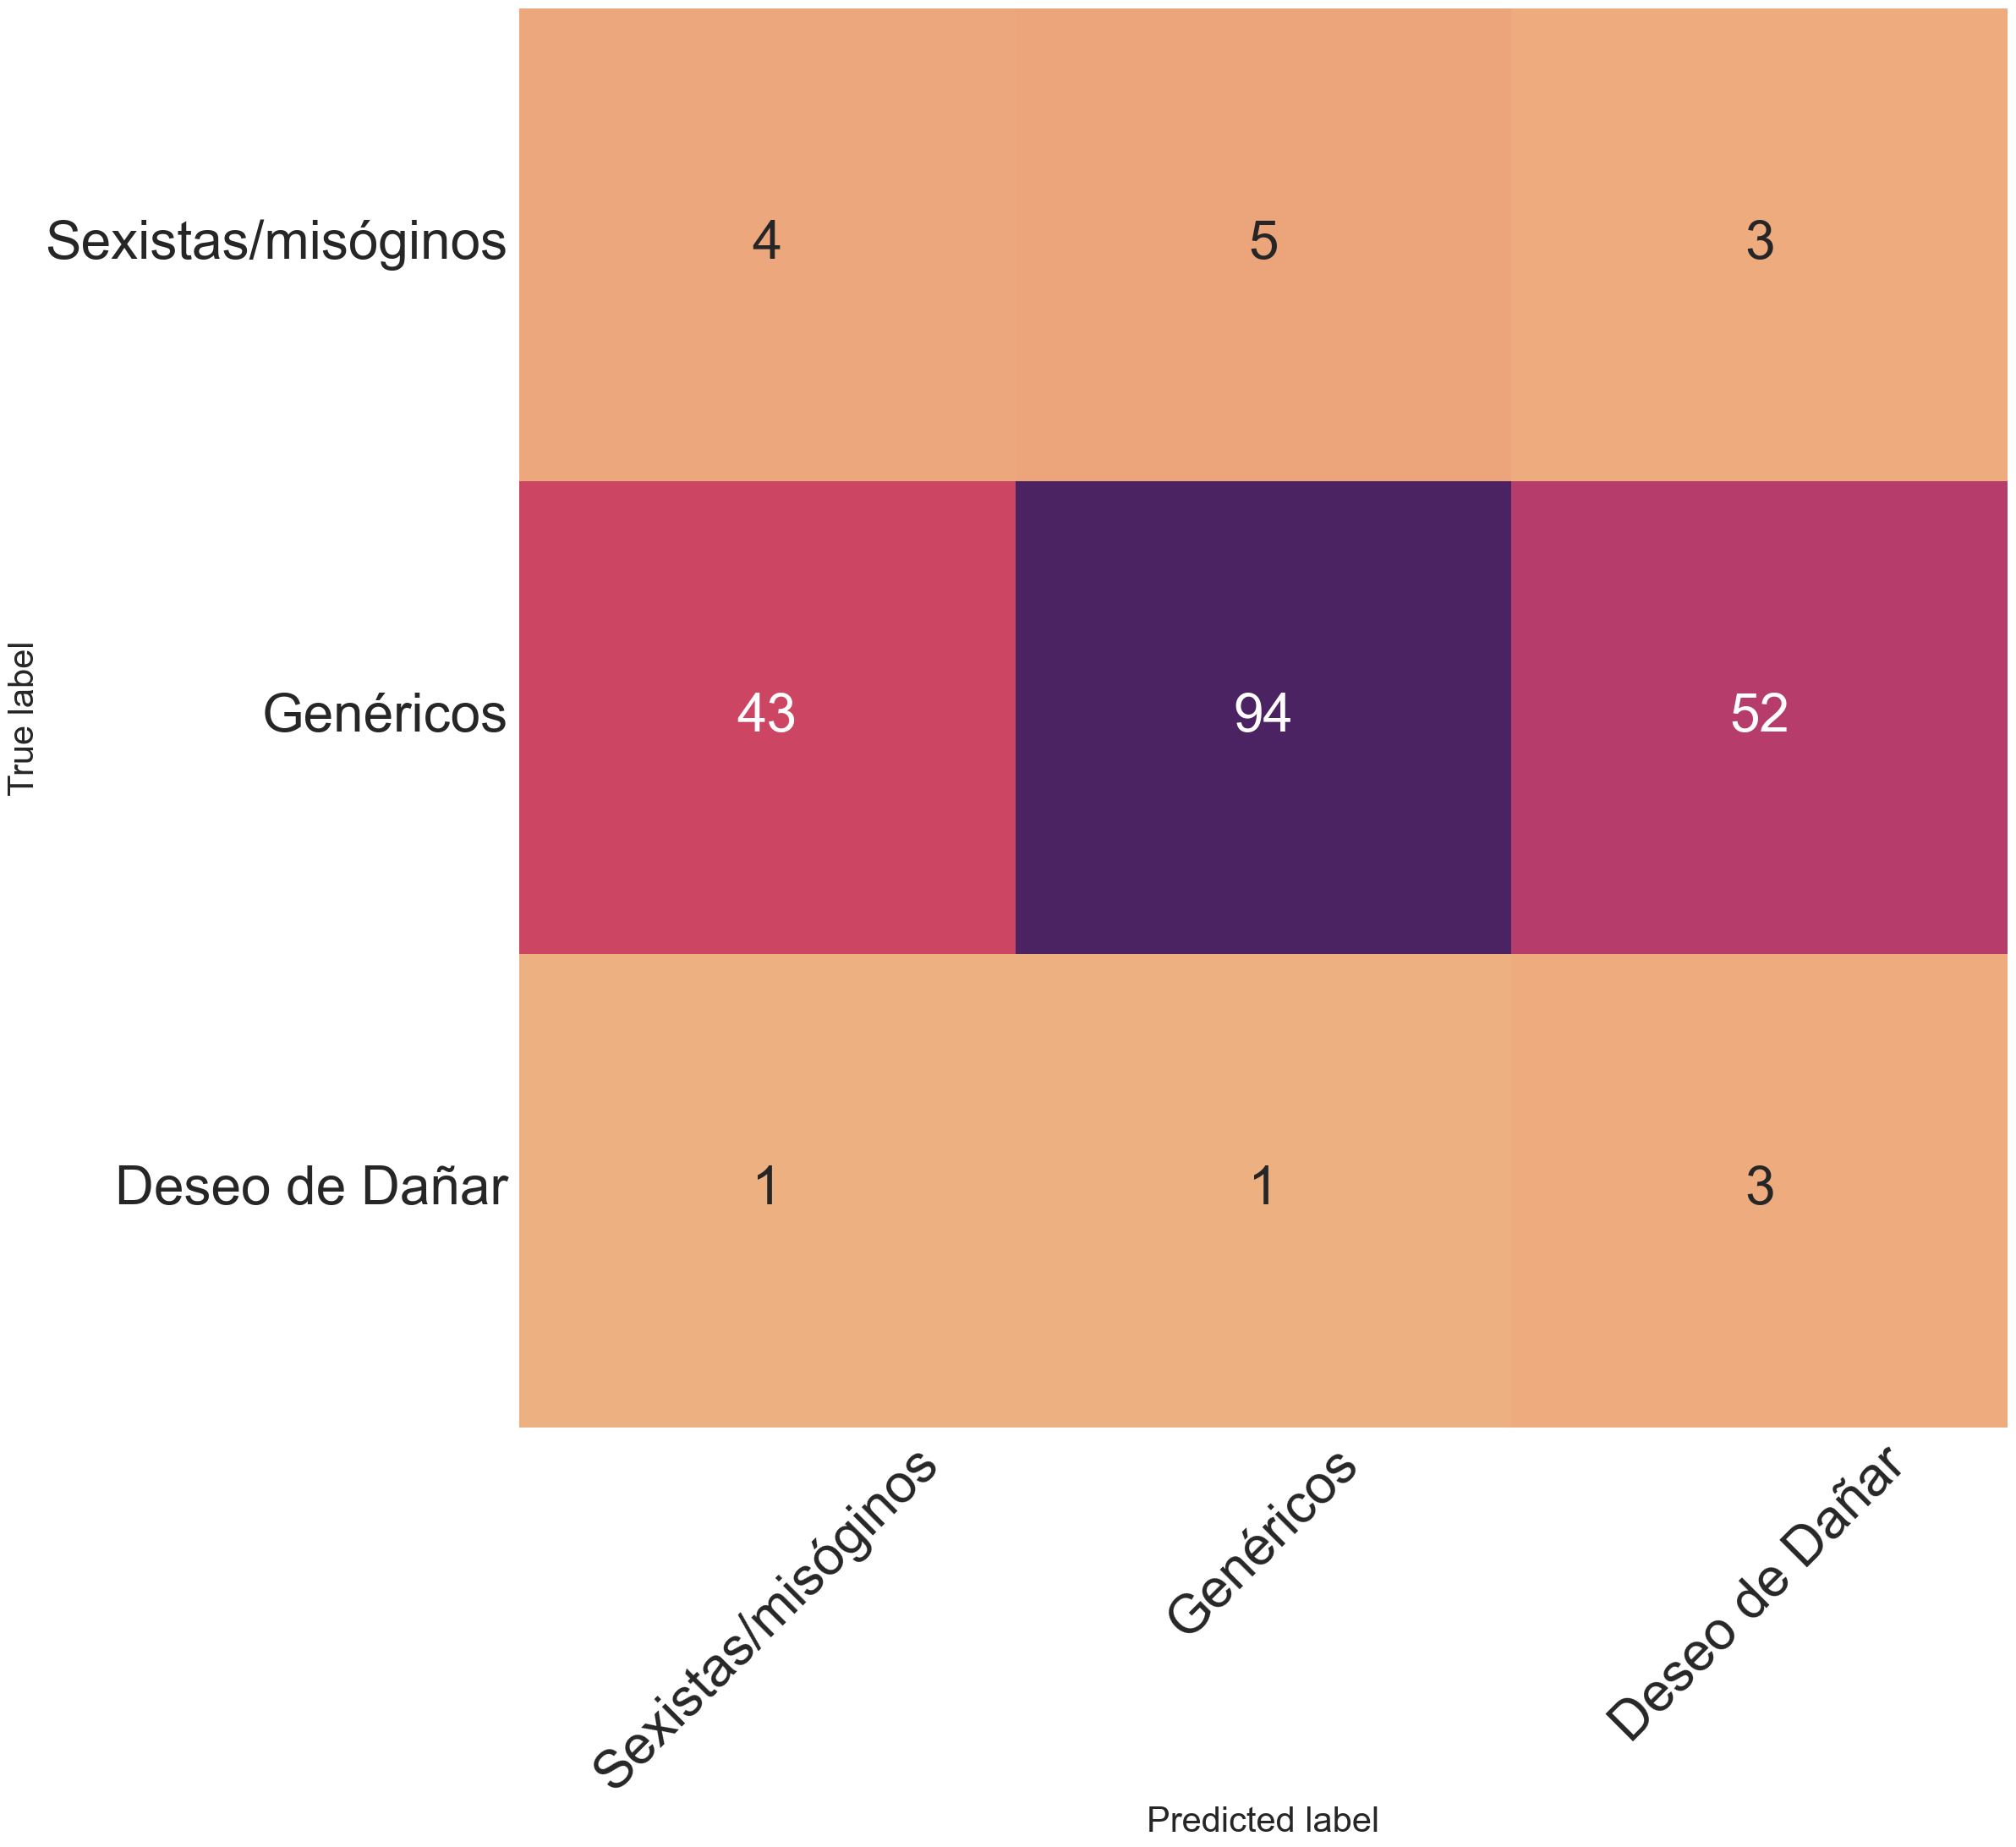

In [266]:
from sklearn.metrics import confusion_matrix

# Datos de la matriz de confusión para el modelo '50764c95-6e1e-4d74-8bfc-1100950944d0'
y_true = ['Sexistas/misóginos'] * 12 + ['Genéricos'] * 189 + ['Deseo de Dañar'] * 5
y_pred = [
    'Sexistas/misóginos'] * 4 + ['Genéricos'] * 5 + ['Deseo de Dañar'] * 3 + \
    ['Sexistas/misóginos'] * 43 + ['Genéricos'] * 94 + ['Deseo de Dañar'] * 52 + \
    ['Sexistas/misóginos'] * 1 + ['Genéricos'] * 1 + ['Deseo de Dañar'] * 3


# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plotear la matriz de confusión
plt.figure(figsize=(24, 22))

sns.heatmap(cm, annot=True, fmt='d', cmap='flare', xticklabels=labels, 
            yticklabels=labels, annot_kws={"size": 46}, cbar=False)

plt.xlabel('Predicted label', fontsize=30)
plt.ylabel('True label', fontsize=30)
plt.xticks(rotation=45, fontsize=46)
plt.yticks(rotation=0, fontsize=46)
# plt.title('Confusion Matrix for Best Model of ML Experiments')

plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/Insultos/GenAI/GenAI_Experiments in _Insultos_ best_model.pdf", format='pdf')

plt.show()


## Performance

In [ ]:
# Mapping dictionary for task names
task_name_mapping = {
    "analisis_general": "Análisis General", 
    "contenido_negativo": "Contenido Negativo", 
    "insultos": "Insultos"
}

# Agrupar el DataFrame `df` por 'Type' y calcular la suma, promedio y número de experimentos del 'Time (s)'
df_grouped_sum = df.groupby(['Type'])['Time (s)'].sum().reset_index()
df_grouped_mean = df.groupby(['Type'])['Time (s)'].mean().reset_index()
df_grouped_count = df.groupby(['Type'])['Time (s)'].count().reset_index()

# Fusionar las agrupaciones en un solo DataFrame
df_grouped = df_grouped_sum.merge(df_grouped_mean, on='Type', suffixes=('_Total', '_Mean'))
df_grouped = df_grouped.merge(df_grouped_count, on='Type')

# Renombrar las columnas para mayor claridad
df_grouped.columns = ['Task', 'Total Time (s)', 'Mean Time (s)', 'Number of Experiments']

# Convert seconds to hours and round to 3 decimal places
df_grouped['Total Time (h)'] = (df_grouped['Total Time (s)'] / 3600).round(3)
df_grouped['Mean Time (h)'] = (df_grouped['Mean Time (s)'] / 3600).round(3)

# Apply the mapping to change the task names
df_grouped['Task'] = df_grouped['Task'].replace(task_name_mapping)

# Drop the original time in seconds columns if not needed
df_grouped = df_grouped[['Task', 'Total Time (h)', 'Mean Time (h)', 'Number of Experiments']]

df_grouped


Task  Total Time (h)  Mean Time (h)  Number of Experiments
0    Análisis General          11.850          0.185                     64
1  Contenido Negativo           2.774          0.043                     64
2            Insultos           1.638          0.026                     64

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\2044901415.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x='Task', y='Number of Experiments', data=df_grouped, palette='bone', alpha=0.9)


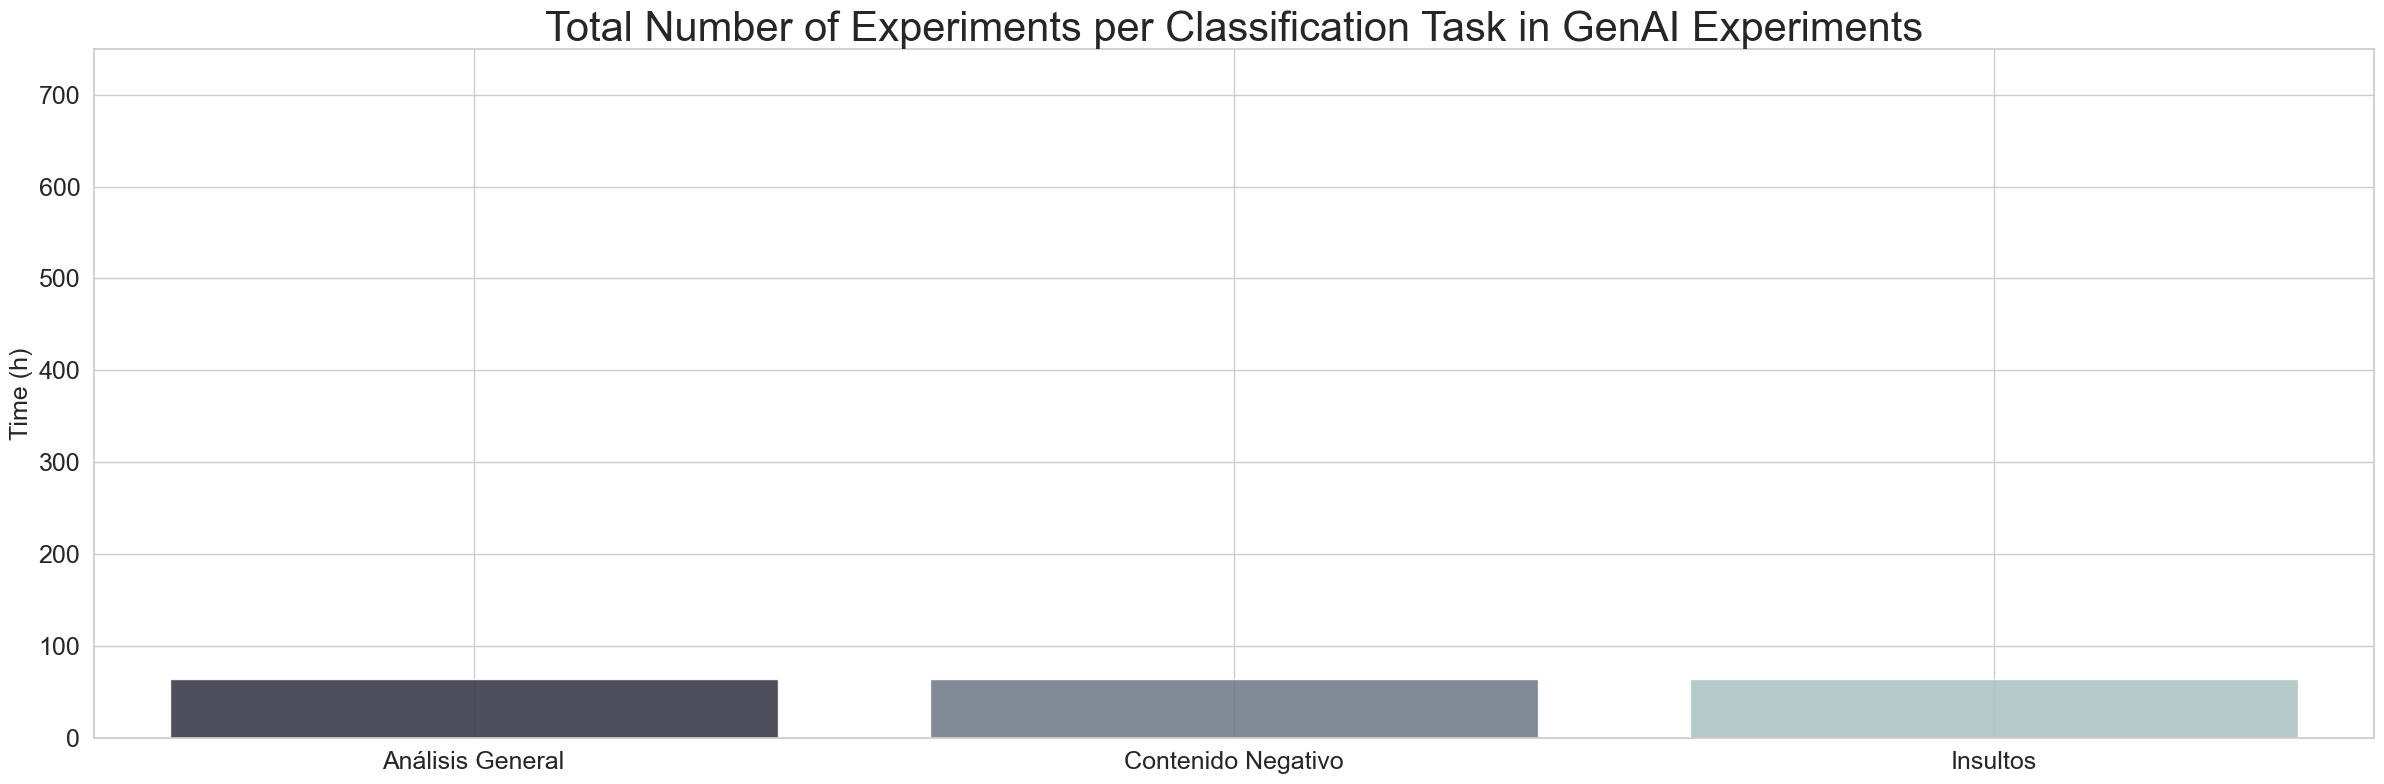

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

# Maximum per limit for the y-axis between ML, DL and GenAI
y_max = 750

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(24, 8))

# Plot for Total Time usando los colores personalizados
sns.barplot(ax=ax, x='Task', y='Number of Experiments', data=df_grouped, palette='bone', alpha=0.9)

# Set plot title and labels
ax.set_title('Total Number of Experiments per Classification Task in GenAI Experiments', fontsize=30)
ax.set_xlabel('', fontsize=18)
ax.set_ylabel('Time (h)', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylim(0, y_max)


# Adding grid for better readability
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\3363374594.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x='Task', y='Total Time (h)', data=df_grouped, palette='bone', alpha=0.9)


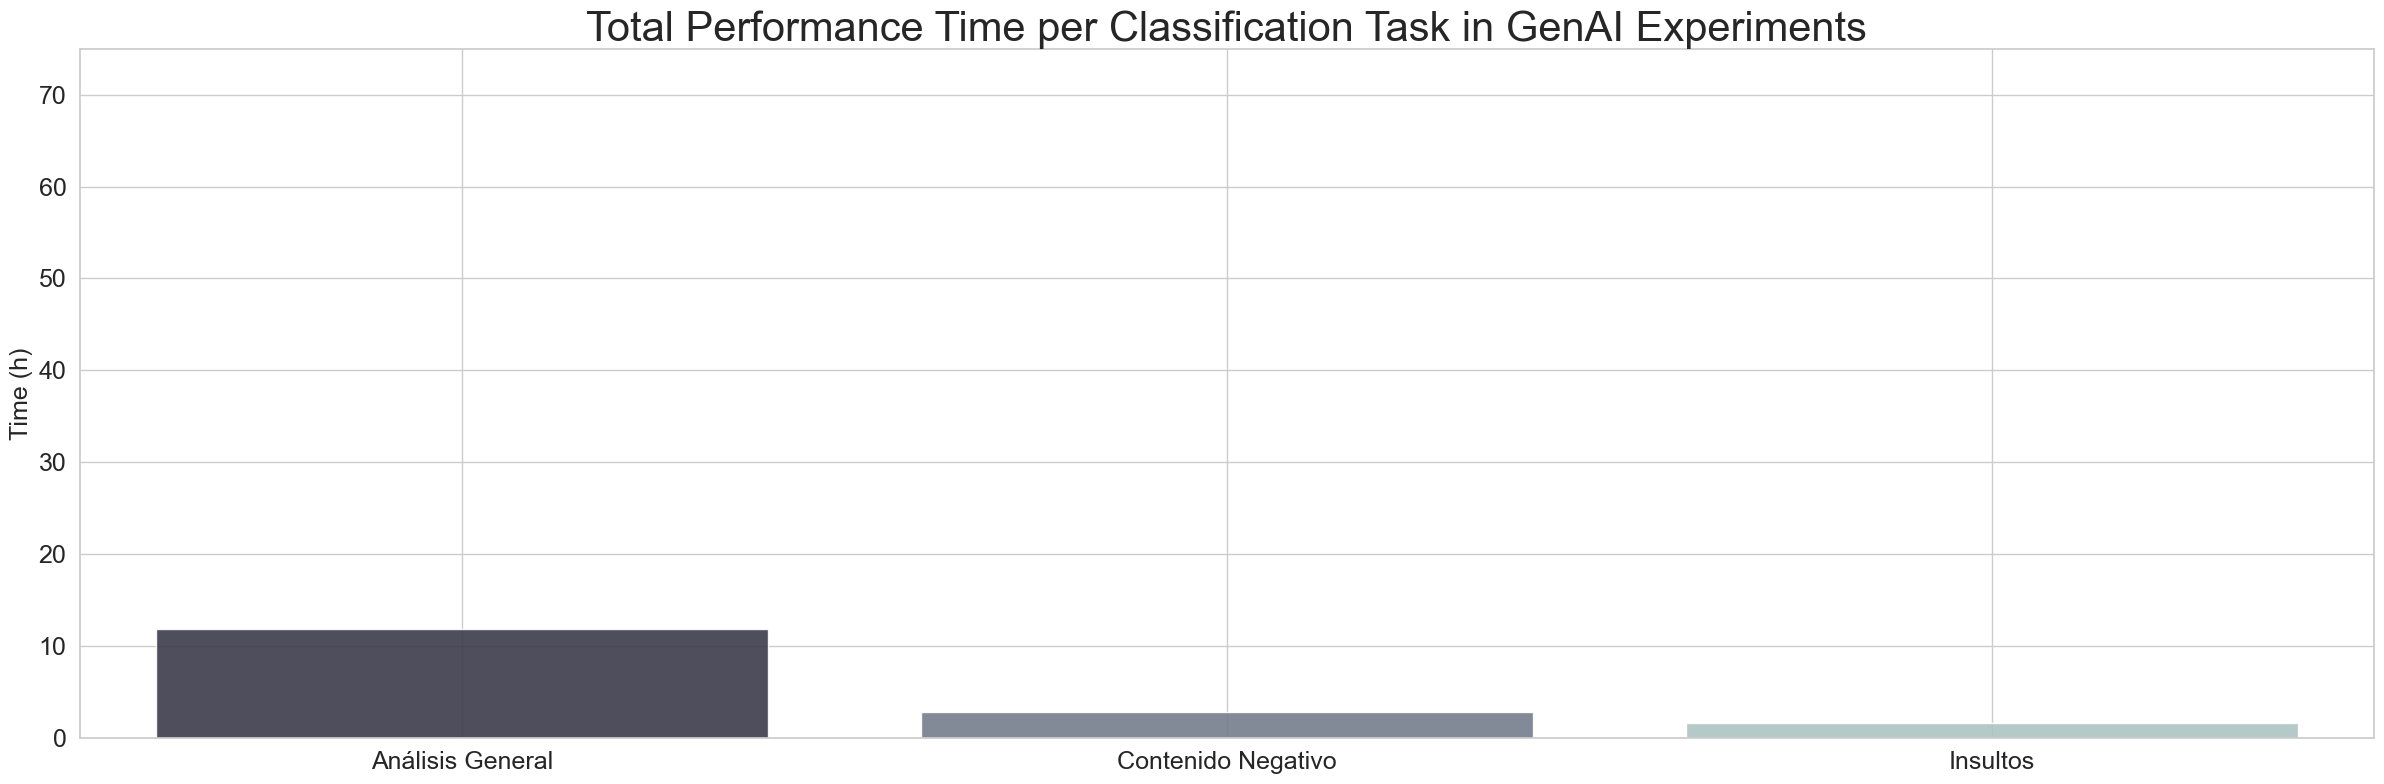

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

# Maximum per limit for the y-axis between ML, DL and GenAI
y_max = 75

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(24, 8))

# Plot for Total Time usando los colores personalizados
sns.barplot(ax=ax, x='Task', y='Total Time (h)', data=df_grouped, palette='bone', alpha=0.9)

# Set plot title and labels
ax.set_title('Total Performance Time per Classification Task in GenAI Experiments', fontsize=30)
ax.set_xlabel('', fontsize=18)
ax.set_ylabel('Time (h)', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylim(0, y_max)


# Adding grid for better readability
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\2503506419.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x='Task', y='Total Time (h)', data=df_grouped, palette=bar_colors, alpha=0.9)


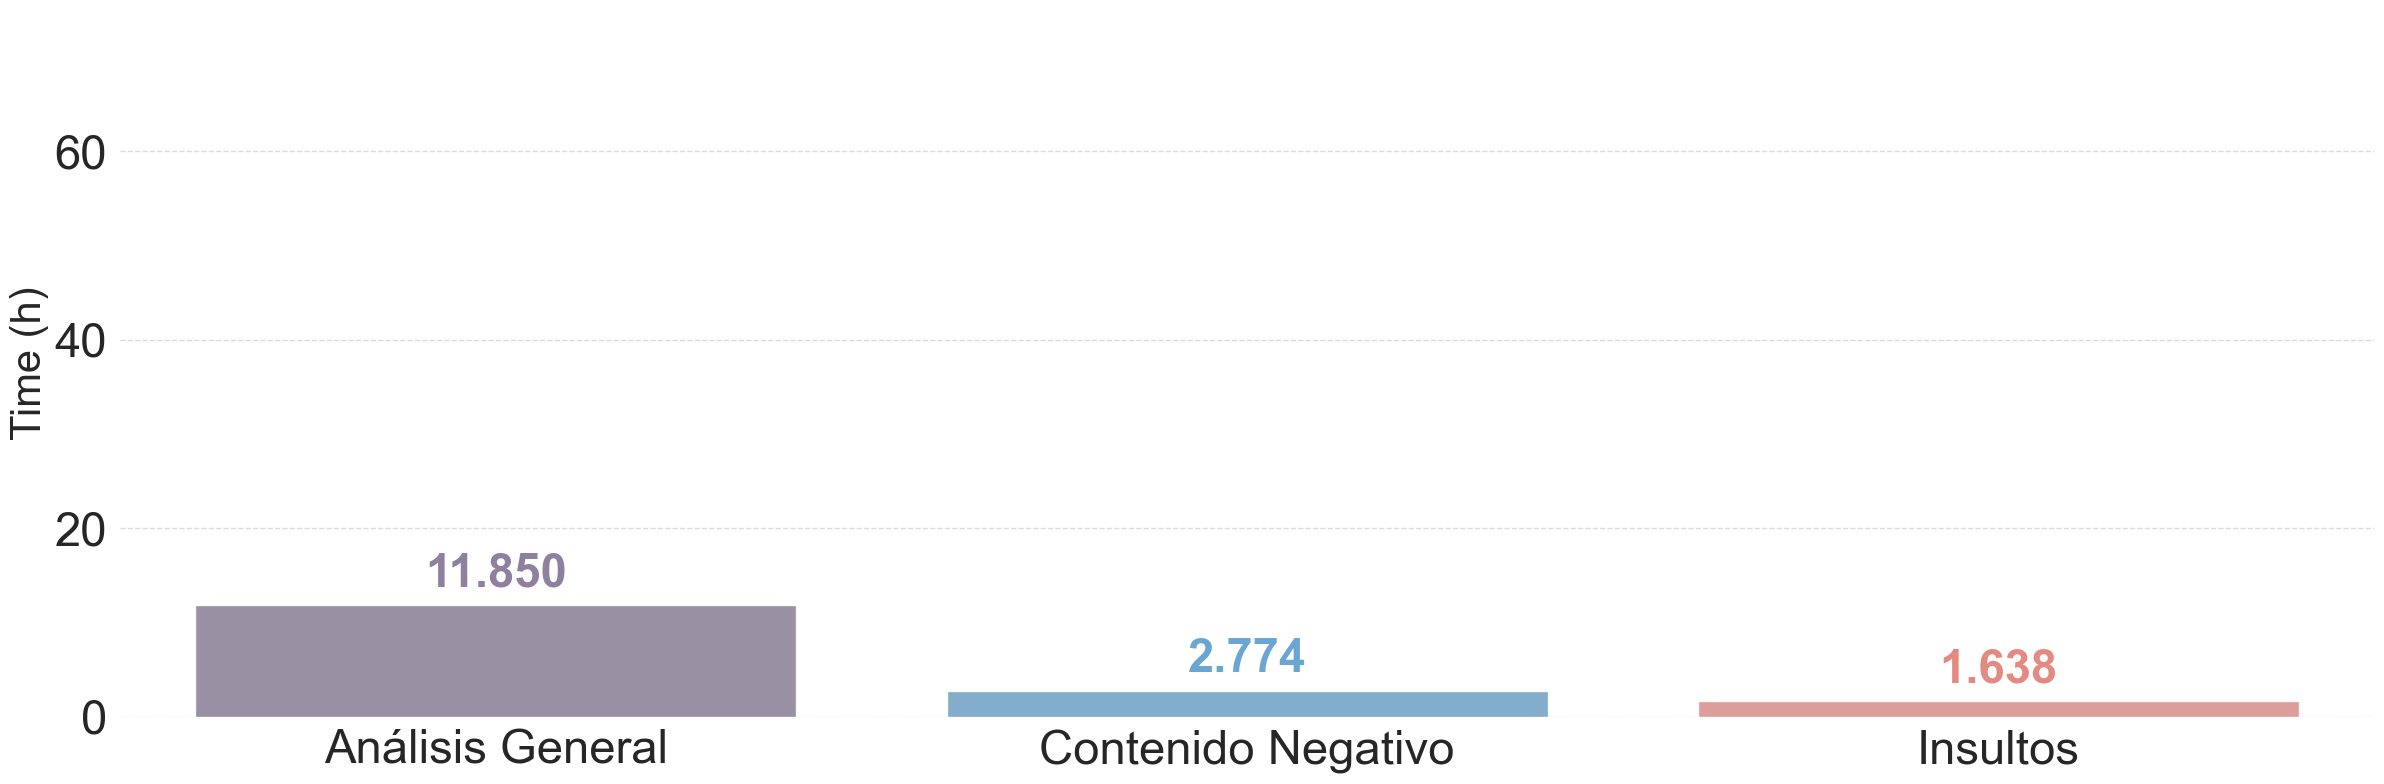

In [62]:
# Set Seaborn style
sns.set(style="whitegrid")

# Maximum per limit for the y-axis between ML, DL and GenAI
y_max = 75

# Define colors for specific tasks
task_colors = {
    'Análisis General': '#8E809E',
    'Contenido Negativo': '#6AA6D4',
    'Insultos': '#E38A83'
}

# Create a list of colors for the bars based on the task
bar_colors = [task_colors.get(task, '#CCCCCC') for task in df_grouped['Task']]  # Default color is light grey if not specified

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(24, 8))

# Plot for Total Time using the customized colors
sns.barplot(ax=ax, x='Task', y='Total Time (h)', data=df_grouped, palette=bar_colors, alpha=0.9)

# Set plot title and labels
# ax.set_title('Total Performance Time per Classification Task in ML Experiments', fontsize=40)
ax.set_xlabel('', fontsize=20)
ax.set_ylabel('Time (h)', fontsize=30)
ax.tick_params(axis='x', labelsize=34)
ax.tick_params(axis='y', labelsize=34)
ax.set_ylim(0, y_max)

# Add value labels on top of the bars in the same color as the bars
for bar, color in zip(ax.patches, bar_colors):
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.3f}',
        ha='center', va='bottom', fontsize=34, fontweight='bold',
        color=color  # Match text color with the bar color
    )

# Add a grid to improve readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines for a clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust layout to avoid clipping of labels and titles
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/GenAI_total_performance_time.pdf", format='pdf')

plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_16980\142423435.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x='Task', y='Mean Time (h)', data=df_grouped, palette='bone', alpha=0.9)


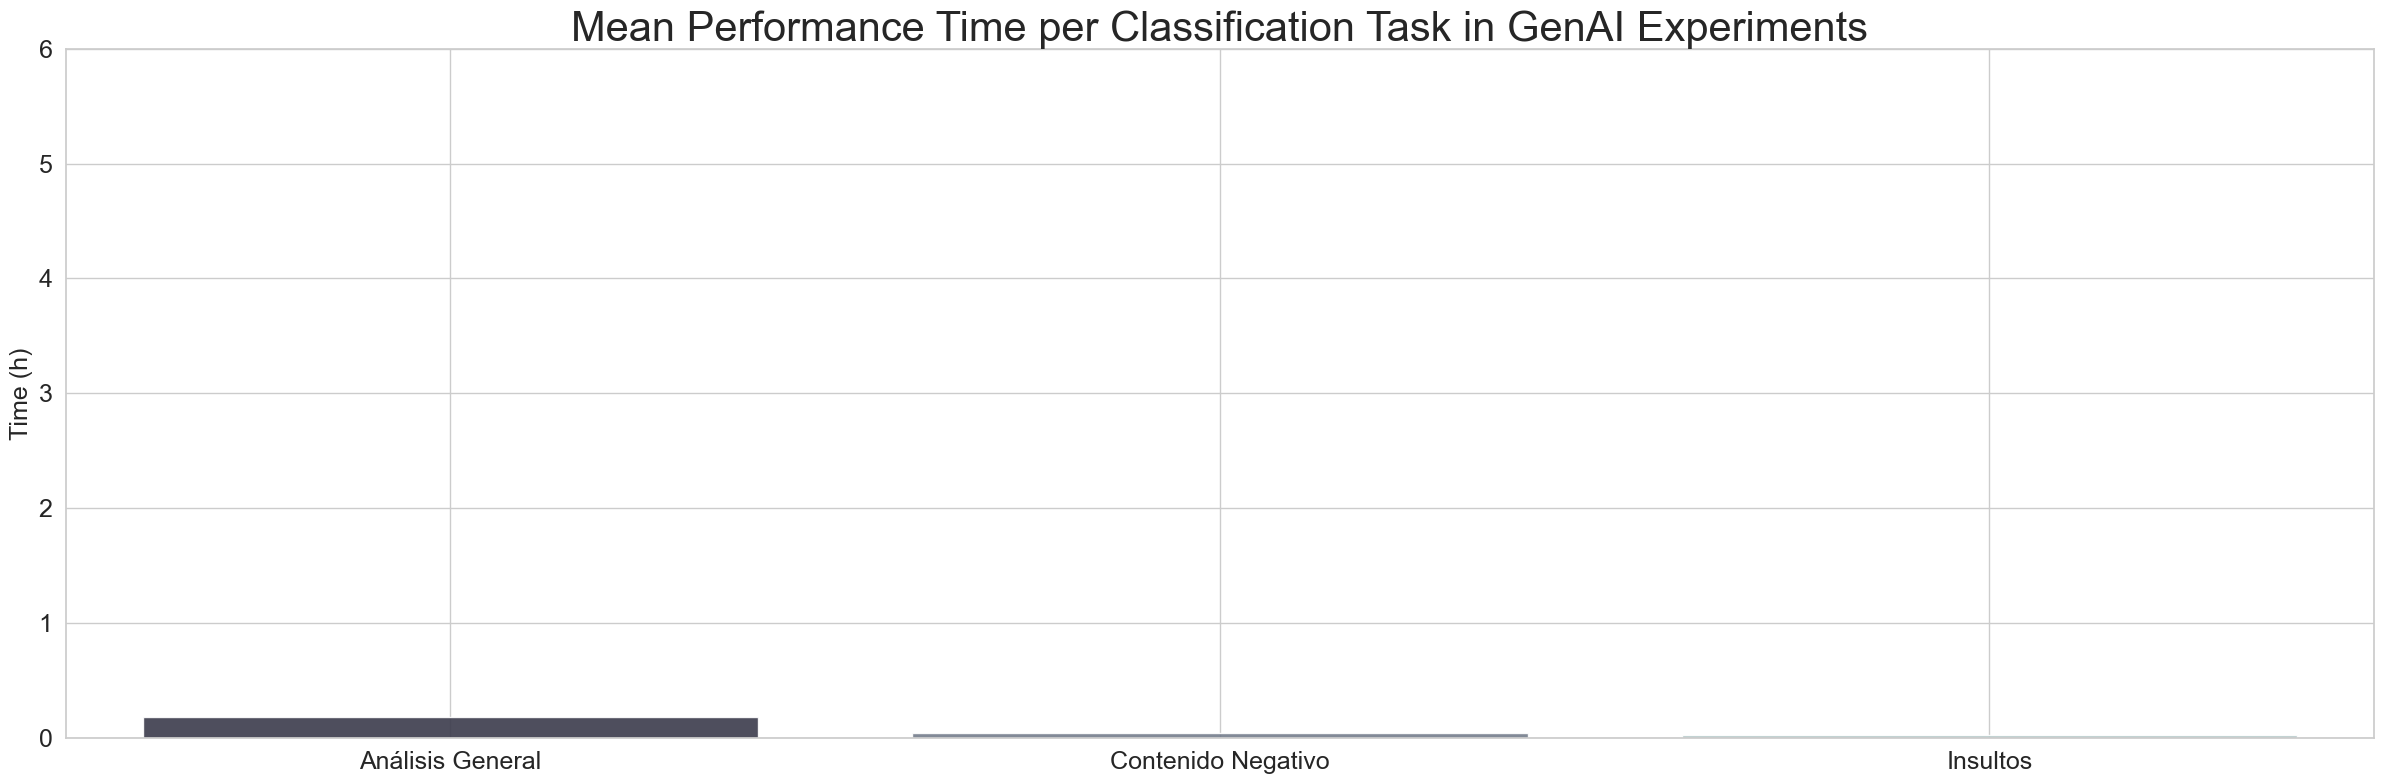

In [55]:
# Set Seaborn style
sns.set(style="whitegrid")

# Maximum per limit for the y-axis between ML, DL and GenAI
y_max = 6

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(24, 8))

# Plot for Total Time usando los colores personalizados
sns.barplot(ax=ax, x='Task', y='Mean Time (h)', data=df_grouped, palette='bone', alpha=0.9)

# Set plot title and labels
ax.set_title('Mean Performance Time per Classification Task in GenAI Experiments', fontsize=30)
ax.set_xlabel('', fontsize=18)
ax.set_ylabel('Time (h)', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylim(0, y_max)


# Adding grid for better readability
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()